# <center>Código/Articulo_La complejidad del sistema geoelectoral mexicano a nivel municipal<center>
## <center>Análisis Exploratorio y Construcción Índices de Complejidad Electoral <center>

<br>

#### <center>Autor: Miguel David Alvarez Hernández (mdalvarezh@gmail.com)<center>

In [1]:
import datetime
now = datetime.datetime.now()
print ("Última versión:")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Última versión:
2021-08-10 22:48:00


# Setup

In [2]:
import pandas as pd  
import numpy as np
import pandas_profiling
from itertools import combinations 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px

In [3]:
#parámetros de las gráficas 3d
elev = 50.0
azim = 10.0

# Importación de datos procesados

In [4]:
#datos procesados
datos = pd.read_csv("C:/Users/miguel.alvarez/Google Drive/PREPRINTS_PONENCIAS/[Articulo]_Complejidad sistema geo-electoral_municipios/Code_Mun/1_Procesamiento/Resultados_Datos-procesados_mun2019.csv", encoding='utf-8')

In [5]:
print(datos.dtypes)
datos

EDO                   int64
NOMBRE_ESTADO        object
MUN                   int64
NOMBRE_MUNICIPIO     object
Coef_Var_PE         float64
Coef_Var_LNE        float64
Var_Prop_PE         float64
Var_Prop_LNE        float64
Autocorr_PE         float64
Autocorr_LNE        float64
Razon_LNE_PE        float64
PE                  float64
LNE                 float64
TC_LNE_2019         float64
NUM_SECC_RUR          int64
Area_Km2            float64
Densidad_LNE        float64
dtype: object


EDO   NOMBRE_ESTADO  MUN              NOMBRE_MUNICIPIO  Coef_Var_PE  \
0       1  AGUASCALIENTES   10     SAN FRANCISCO DE LOS ROMO     0.009708   
1       1  AGUASCALIENTES    8            SAN JOSE DE GRACIA     0.003117   
2       1  AGUASCALIENTES    9                      TEPEZALA     0.003911   
3       1  AGUASCALIENTES   11                      EL LLANO     0.005733   
4       1  AGUASCALIENTES    2                      ASIENTOS     0.005650   
...   ...             ...  ...                           ...          ...   
2453   32       ZACATECAS   45                   TEPECHITLAN     0.002327   
2454   32       ZACATECAS   14  GENERAL FRANCISCO R. MURGUIA     0.004739   
2455   32       ZACATECAS   44                       TABASCO     0.005701   
2456   32       ZACATECAS    9                 CHALCHIHUITES     0.004951   
2457   32       ZACATECAS   11  TRINIDAD GARCIA DE LA CADENA     0.003147   

      Coef_Var_LNE  Var_Prop_PE  Var_Prop_LNE  Autocorr_PE  Autocorr_LNE  \
0         0.008903     0.020041      0.017733     0.988393      0.970914   
1         0.002356     0.005584      0.008887     0.791791      0.951687   
2         0.005070     0.007903      0.011921     0.969294      0.832575   
3         0.004768     0.009983      0.014232     0.938868      0.962703   
4         0.004824     0.009252      0.015397     0.993797      0.837235   
...            ...          ...           ...          ...           ...   
2453      0.001991     0.017748      0.021905     0.992283      0.577314   
2454      0.002967     0.022931      0.026072     0.982714      0.911464   
2455      0.005293     0.032716      0.035416     0.952155      0.928948   
2456      0.003692     0.019649      0.024771     0.655389      0.819352   
2457      0.002873     0.033702      0.041745     0.864769     -0.273110   

      Razon_LNE_PE       PE      LNE  TC_LNE_2019  NUM_SECC_RUR     Area_Km2  \
0         0.989272  35518.0  34917.0     0.037498             3     9.791576   
1         0.991803   7004.0   6914.0     0.000289             4   148.866104   
2         0.990635  15733.0  15545.0     0.005108             6     6.271495   
3         0.991016  15298.0  15067.0    -0.003373             6    10.006312   
4         0.989080  34722.0  34222.0     0.001874            11    23.049424   
...            ...      ...      ...          ...           ...          ...   
2453      0.983523   7061.0   6959.0     0.066677            13   190.978234   
2454      0.986450  17610.0  17372.0     0.082705            32  1190.248462   
2455      0.983221  12689.0  12527.0     0.100307            16   235.714183   
2456      0.982861   8339.0   8222.0     0.075052            10    13.707054   
2457      0.972699   2853.0   2779.0     0.113381             3   175.709403   

      Densidad_LNE  
0      3566.024547  
1        46.444421  
2      2478.675412  
3      1505.749552  
4      1484.722551  
...            ...  
2453     36.438707  
2454     14.595272  
2455     53.144872  
2456    599.837116  
2457     15.815887  

[2458 rows x 17 columns]

In [6]:
#se reordena y eliminan del dataframe las variables que no se usarán
datos_mun = datos.drop(columns=['Coef_Var_PE', 'Var_Prop_PE', 'Autocorr_PE','Area_Km2'])
datos_mun = datos_mun.reindex(columns= ['EDO','NOMBRE_ESTADO','MUN','NOMBRE_MUNICIPIO','NUM_SECC_RUR','LNE','Densidad_LNE','Razon_LNE_PE','TC_LNE_2019','Coef_Var_LNE','Var_Prop_LNE','Autocorr_LNE'])

#verificar si hay valores nulos en datos_mun
datos_mun.isnull().sum()

EDO                 0
NOMBRE_ESTADO       0
MUN                 0
NOMBRE_MUNICIPIO    0
NUM_SECC_RUR        0
LNE                 0
Densidad_LNE        0
Razon_LNE_PE        0
TC_LNE_2019         0
Coef_Var_LNE        0
Var_Prop_LNE        0
Autocorr_LNE        2
dtype: int64

In [7]:
#se eliminan las filas (municipios) con valores vacíos
datos_mun_limpio = datos_mun.dropna()
datos_mun_limpio = datos_mun_limpio.reset_index(drop=True) #para reordenar el índice del nuevo dataframe
datos_mun_limpio.isnull().sum()

EDO                 0
NOMBRE_ESTADO       0
MUN                 0
NOMBRE_MUNICIPIO    0
NUM_SECC_RUR        0
LNE                 0
Densidad_LNE        0
Razon_LNE_PE        0
TC_LNE_2019         0
Coef_Var_LNE        0
Var_Prop_LNE        0
Autocorr_LNE        0
dtype: int64

In [8]:
#se separan los indicadores de los metadatos 

#metadatos
metadatos = datos_mun_limpio[['EDO', 'NOMBRE_ESTADO', 'MUN', 'NOMBRE_MUNICIPIO']]
metadatos.head()

#indicadores (features)
datos_mun_limpio_f = datos_mun_limpio[['NUM_SECC_RUR','LNE', 'Densidad_LNE', 'Razon_LNE_PE', 'TC_LNE_2019', 'Coef_Var_LNE', 'Var_Prop_LNE','Autocorr_LNE']]
datos_mun_limpio_f

NUM_SECC_RUR      LNE  Densidad_LNE  Razon_LNE_PE  TC_LNE_2019  \
0                3  34917.0   3566.024547      0.989272     0.037498   
1                4   6914.0     46.444421      0.991803     0.000289   
2                6  15545.0   2478.675412      0.990635     0.005108   
3                6  15067.0   1505.749552      0.991016    -0.003373   
4               11  34222.0   1484.722551      0.989080     0.001874   
...            ...      ...           ...           ...          ...   
2451            13   6959.0     36.438707      0.983523     0.066677   
2452            32  17372.0     14.595272      0.986450     0.082705   
2453            16  12527.0     53.144872      0.983221     0.100307   
2454            10   8222.0    599.837116      0.982861     0.075052   
2455             3   2779.0     15.815887      0.972699     0.113381   

      Coef_Var_LNE  Var_Prop_LNE  Autocorr_LNE  
0         0.008903      0.017733      0.970914  
1         0.002356      0.008887      0.951687  
2         0.005070      0.011921      0.832575  
3         0.004768      0.014232      0.962703  
4         0.004824      0.015397      0.837235  
...            ...           ...           ...  
2451      0.001991      0.021905      0.577314  
2452      0.002967      0.026072      0.911464  
2453      0.005293      0.035416      0.928948  
2454      0.003692      0.024771      0.819352  
2455      0.002873      0.041745     -0.273110  

[2456 rows x 8 columns]

## Análisis exploratorio de los indicadores base (sin transformar)

In [9]:
#resumen estadístico
datos_mun_limpio_f.describe()

NUM_SECC_RUR           LNE  Densidad_LNE  Razon_LNE_PE  TC_LNE_2019  \
count   2456.000000  2.456000e+03   2456.000000   2456.000000  2456.000000   
mean       7.709691  3.669317e+04    974.304208      0.985810     0.052843   
std       11.297315  1.091515e+05   1751.056534      0.005720     0.037320   
min        0.000000  6.100000e+01      0.595349      0.933182    -0.250000   
25%        1.000000  3.319250e+03     70.061623      0.984148     0.033463   
50%        4.000000  9.673500e+03    396.396505      0.987232     0.056462   
75%       10.000000  2.454125e+04   1250.772062      0.989109     0.074967   
max      149.000000  1.463720e+06  24276.021766      0.997168     0.275049   

       Coef_Var_LNE  Var_Prop_LNE  Autocorr_LNE  
count   2456.000000   2456.000000   2456.000000  
mean       0.004495      0.023633      0.381260  
std        0.004276      0.009543      0.485833  
min        0.000522      0.002555     -0.991201  
25%        0.002466      0.017222      0.000000  
50%        0.003590      0.022695      0.490036  
75%        0.005291      0.028865      0.811099  
max        0.122907      0.084949      0.999849

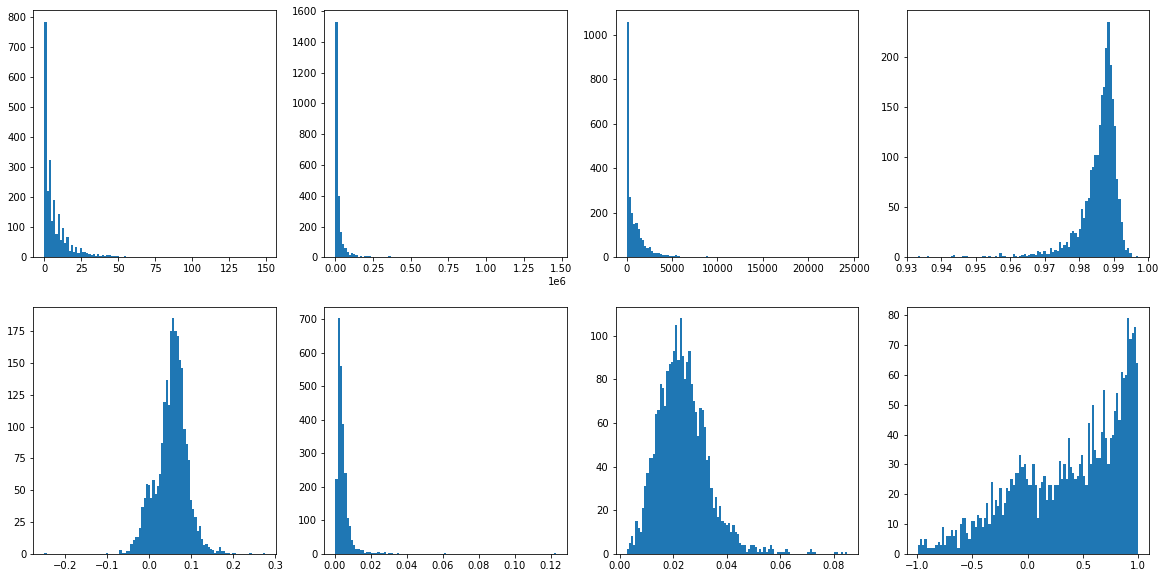

In [10]:
#histogramas de los indicadores base 
#print(sum(datos_mun['LNE'] > 500000))
plt.figure(figsize=(20,10)) 

plt.subplot(241)
H = plt.hist(datos_mun_limpio_f['NUM_SECC_RUR'], bins = 100)
plt.subplot(242)
H = plt.hist(datos_mun_limpio_f['LNE'], bins = 100)
plt.subplot(243)
H = plt.hist(datos_mun_limpio_f['Densidad_LNE'], bins = 100)
plt.subplot(244)
H = plt.hist(datos_mun_limpio_f['Razon_LNE_PE'], bins = 100)
plt.subplot(245)
H = plt.hist(datos_mun_limpio_f['TC_LNE_2019'], bins = 100)
plt.subplot(246)
H = plt.hist(datos_mun_limpio_f['Coef_Var_LNE'], bins = 100)
plt.subplot(247)
H = plt.hist(datos_mun_limpio_f['Var_Prop_LNE'], bins = 100)
plt.subplot(248)
H = plt.hist(datos_mun_limpio_f['Autocorr_LNE'], bins = 100)

<br>

## Gráficas (heatmap y pair-plot) y análisis de correlación (8 indicadores)

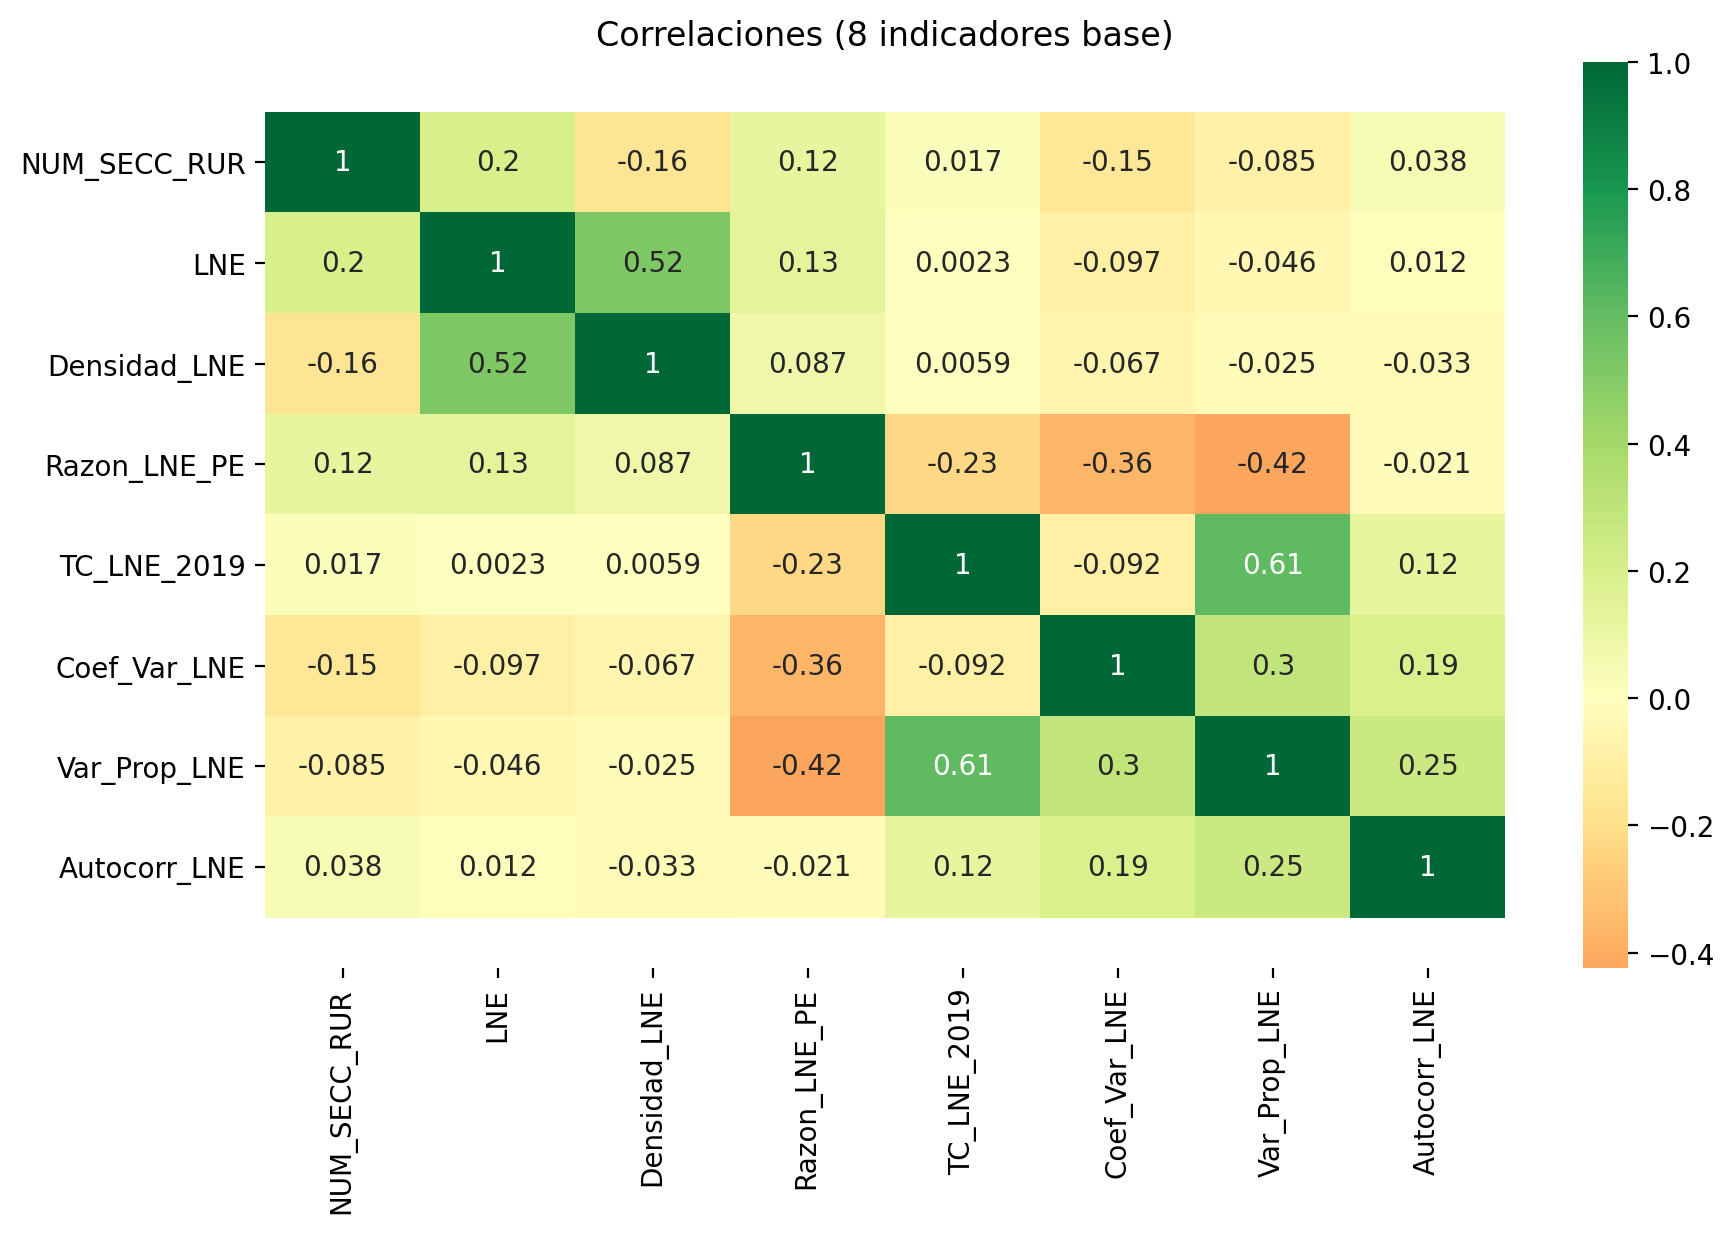

In [11]:
#Plot correlogram
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(datos_mun_limpio_f.corr(), xticklabels=datos_mun_limpio_f.corr().columns, yticklabels=datos_mun_limpio_f.corr().columns, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Correlaciones (8 indicadores base)')

#se guarda la grafica
plt.savefig('Pyplot_heatmap_ind8.png',dpi=600, bbox_inches="tight")
plt.show() 

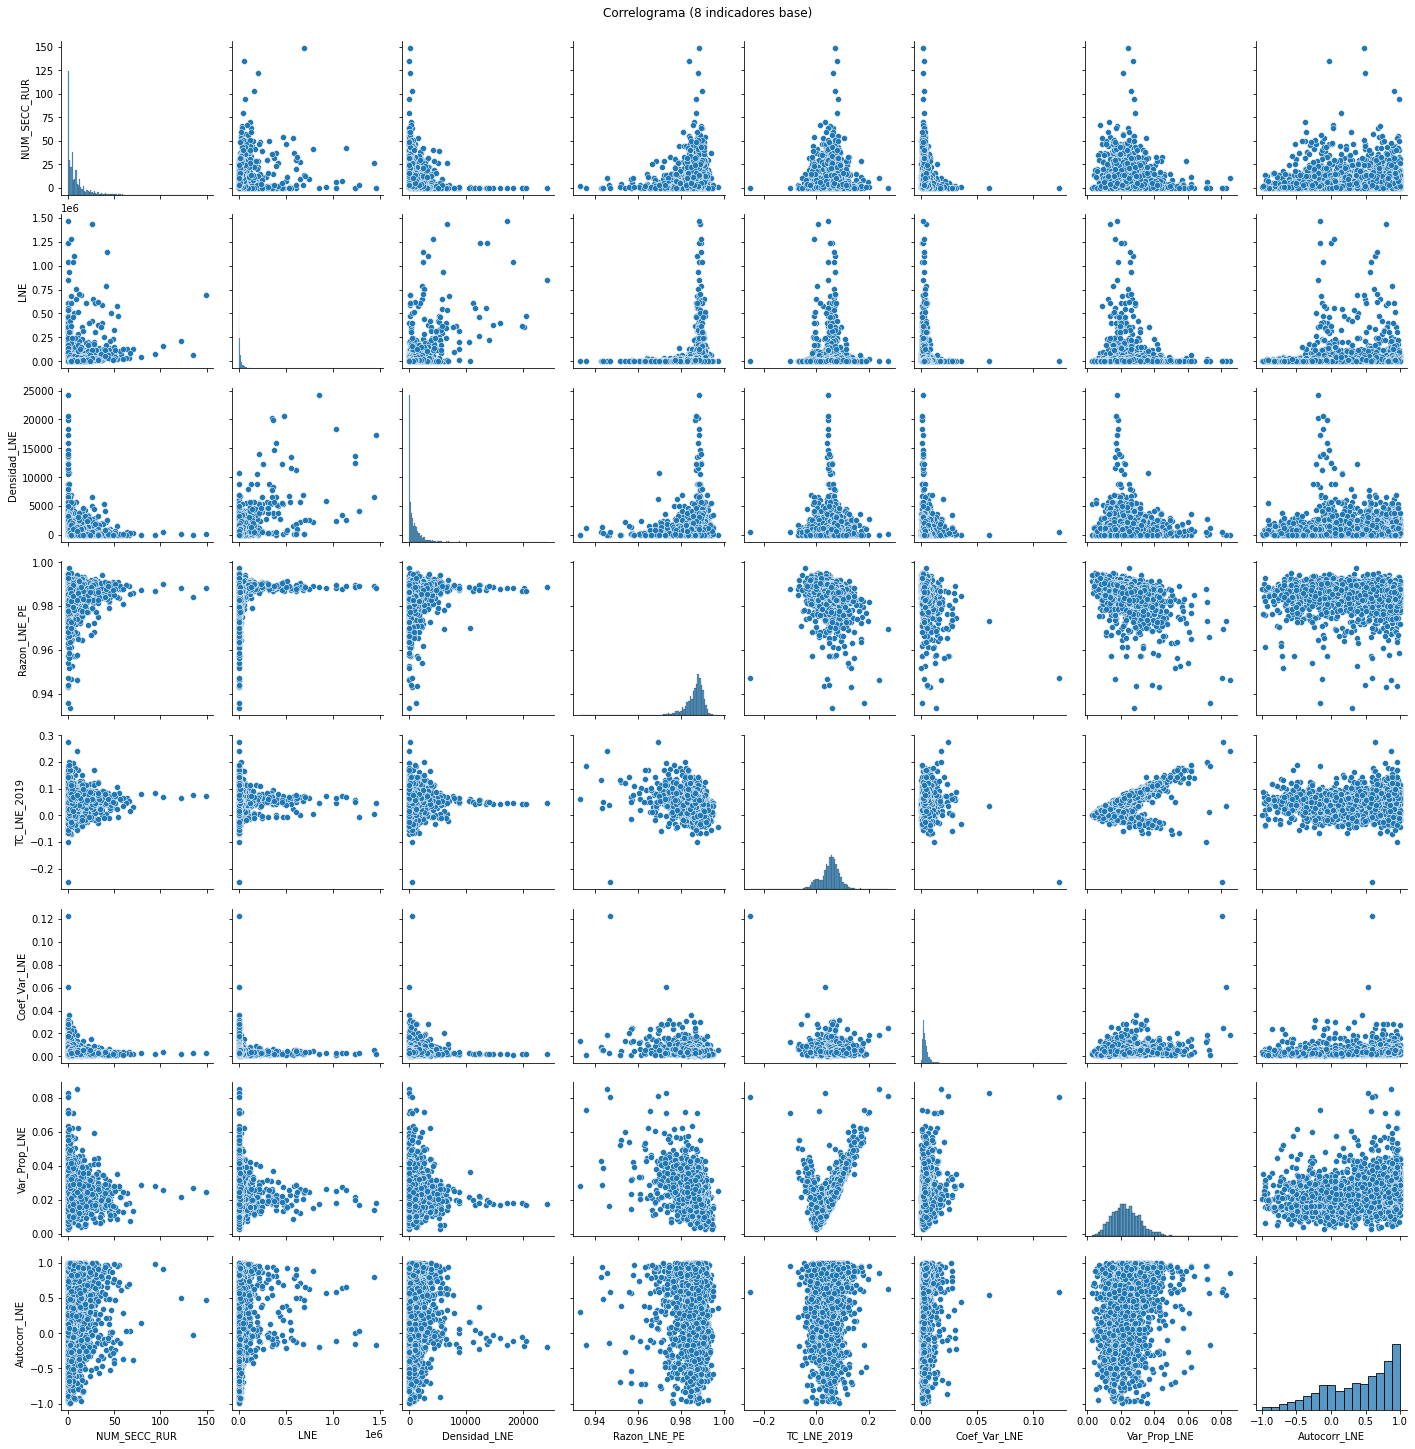

In [12]:
#pair-plot
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
corr1 = sns.pairplot(datos_mun_limpio_f)
corr1.fig.suptitle("Correlograma (8 indicadores base)", y=1.01)
corr1.savefig('Pyplot_correlogram_ind8.png',dpi=600)

<br>

## Gráficas (heatmap y pair-plot) y análisis de correlación (7 indicadores)

In [13]:
datos_mun_limpio_f_ind7 = datos_mun_limpio_f[['NUM_SECC_RUR','LNE', 'Densidad_LNE', 'Razon_LNE_PE', 'TC_LNE_2019', 'Coef_Var_LNE','Autocorr_LNE']]

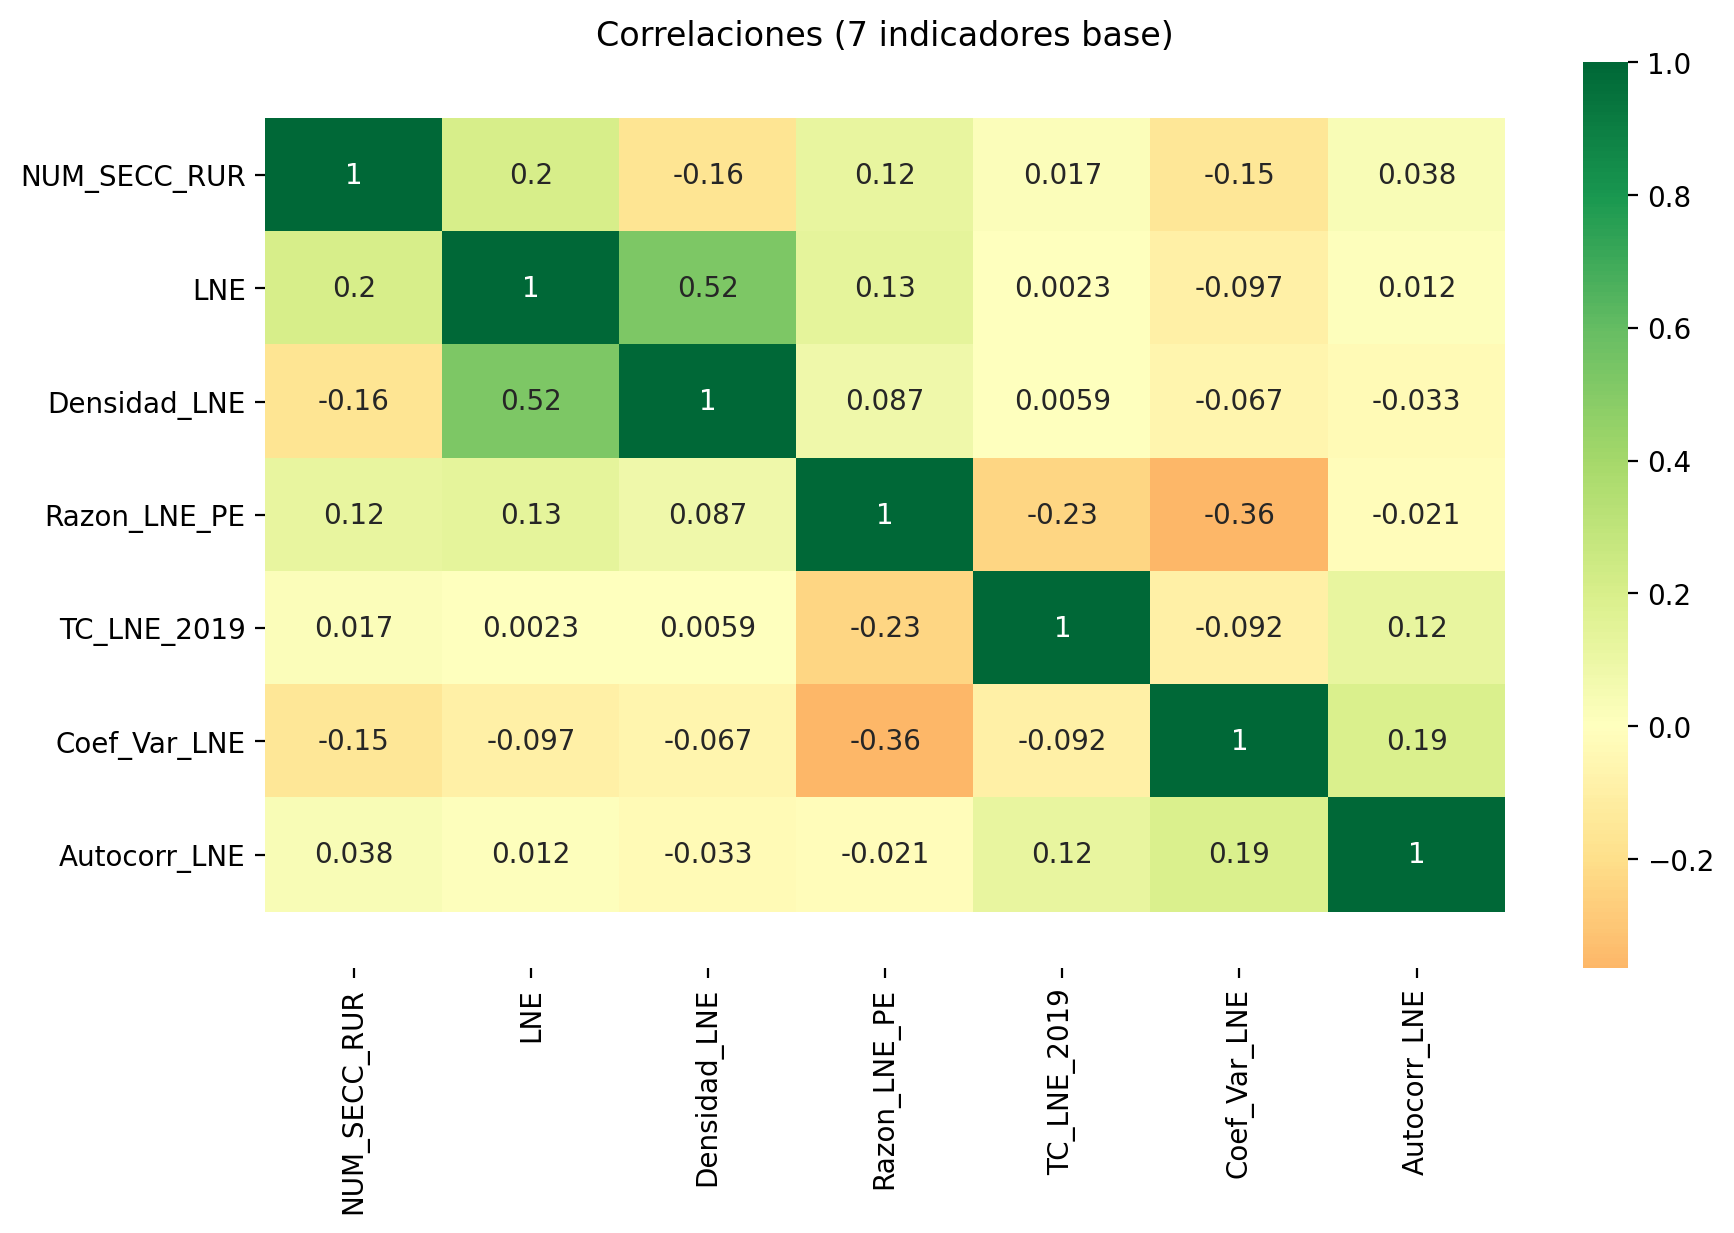

In [14]:
#Plot correlogram
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(datos_mun_limpio_f_ind7.corr(), xticklabels=datos_mun_limpio_f_ind7.corr().columns, yticklabels=datos_mun_limpio_f_ind7.corr().columns, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Correlaciones (7 indicadores base)')

#se guarda la grafica
plt.savefig('Pyplot_heatmap_ind7.png',dpi=600,bbox_inches="tight")
plt.show() 

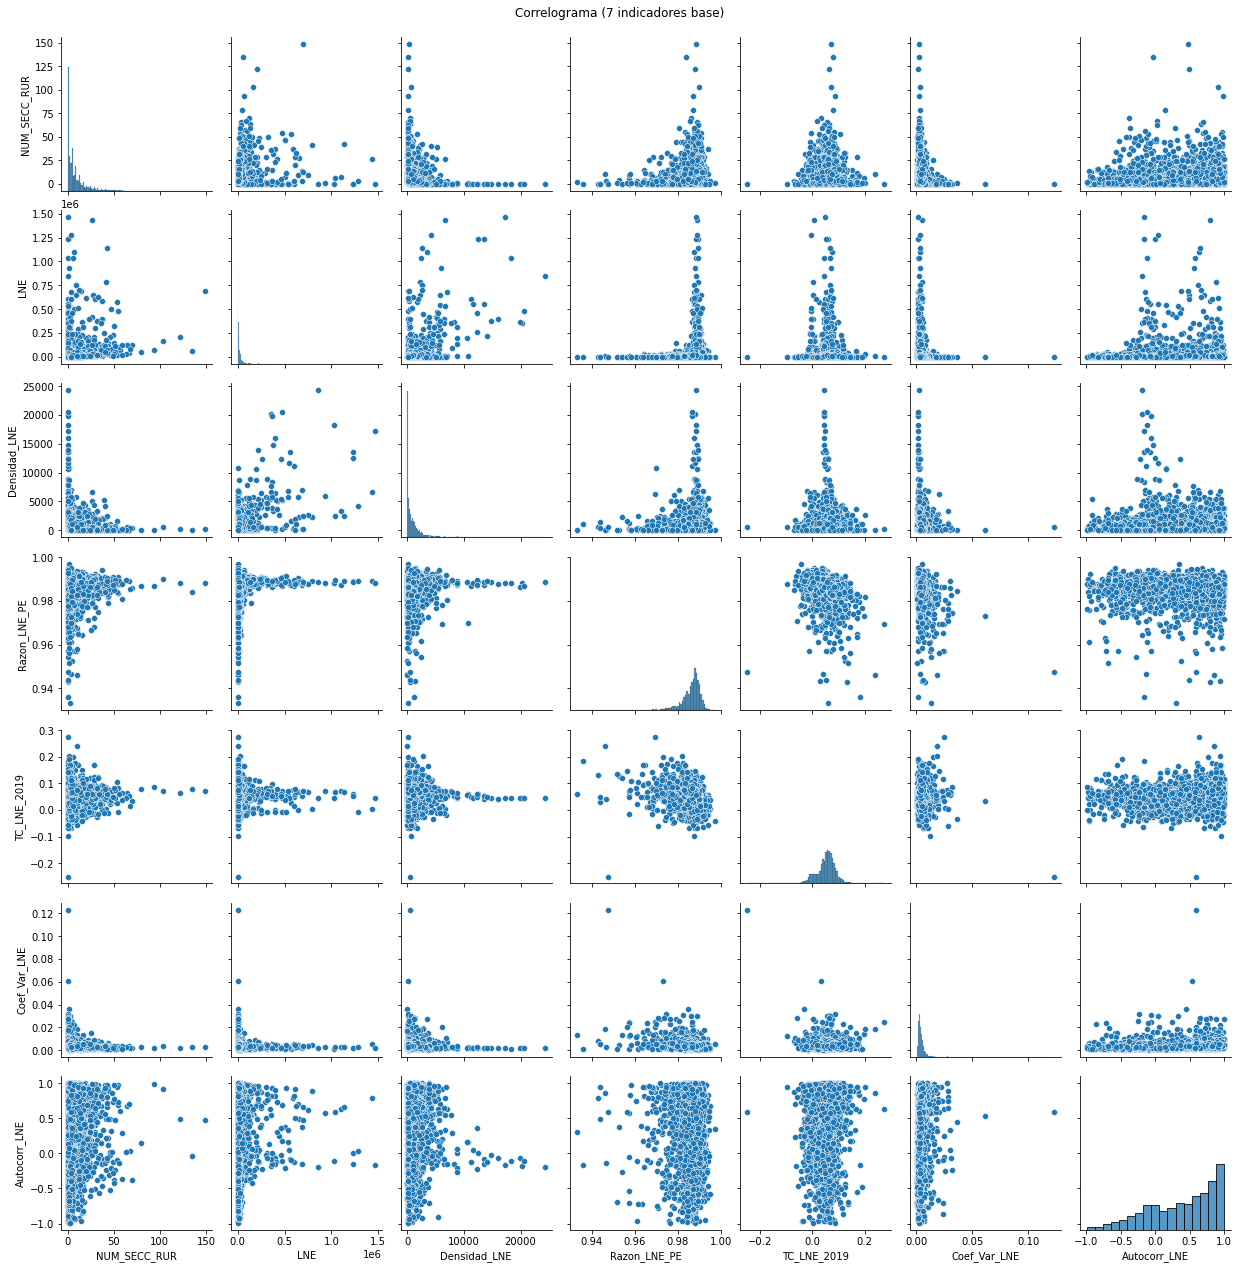

In [15]:
#pair-plot
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
corr2_tf = sns.pairplot(datos_mun_limpio_f_ind7)
corr2_tf.fig.suptitle("Correlograma (7 indicadores base)", y=1.01)
corr2_tf.savefig('Pyplot_correlogram_ind7.png',dpi=600)

<br>

## Análisis exploratorio de los indicadores base (8 indicadores con transformación log en LNE y Densidad_LNE)

In [16]:
#se transforman algunos indicadores para analizar escenarios
datos_mun_limpio_f_tf = datos_mun_limpio_f.copy()

#np-log de LNE, Densidad
datos_mun_limpio_f_tf['LNE'] = np.log(datos_mun_limpio_f_tf['LNE'])
datos_mun_limpio_f_tf['Densidad_LNE'] = np.log(datos_mun_limpio_f_tf['Densidad_LNE'])
#datos_mun_limpio_f_tf['NUM_SECC_RUR'] = np.log(datos_mun_limpio_f_tf['NUM_SECC_RUR']+1)

#renombramos algunas columnas
datos_mun_limpio_f_tf=datos_mun_limpio_f_tf.rename(columns={"LNE": "log(LNE)", "Densidad_LNE": "log(Densidad_LNE)"})

#resumen estadístico
datos_mun_limpio_f_tf.describe()

NUM_SECC_RUR     log(LNE)  log(Densidad_LNE)  Razon_LNE_PE  \
count   2456.000000  2456.000000        2456.000000   2456.000000   
mean       7.709691     9.166359           5.601455      0.985810   
std       11.297315     1.559443           1.932190      0.005720   
min        0.000000     4.110874          -0.518608      0.933182   
25%        1.000000     8.107491           4.249375      0.984148   
50%        4.000000     9.177145           5.982415      0.987232   
75%       10.000000    10.108110           7.131516      0.989109   
max      149.000000    14.196492          10.097244      0.997168   

       TC_LNE_2019  Coef_Var_LNE  Var_Prop_LNE  Autocorr_LNE  
count  2456.000000   2456.000000   2456.000000   2456.000000  
mean      0.052843      0.004495      0.023633      0.381260  
std       0.037320      0.004276      0.009543      0.485833  
min      -0.250000      0.000522      0.002555     -0.991201  
25%       0.033463      0.002466      0.017222      0.000000  
50%       0.056462      0.003590      0.022695      0.490036  
75%       0.074967      0.005291      0.028865      0.811099  
max       0.275049      0.122907      0.084949      0.999849

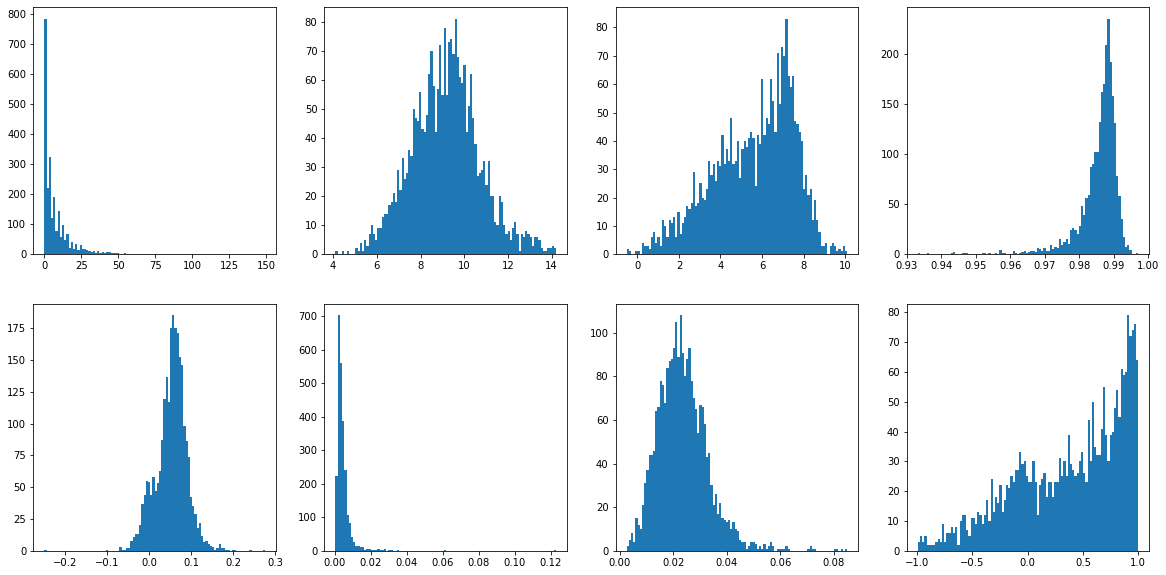

In [17]:
#histogramas de los indicadores base 
#print(sum(datos_mun['log(LNE')] > 500000))
plt.figure(figsize=(20,10)) 

plt.subplot(241)
H = plt.hist(datos_mun_limpio_f_tf['NUM_SECC_RUR'], bins = 100)
plt.subplot(242)
H = plt.hist(datos_mun_limpio_f_tf['log(LNE)'], bins = 100)
plt.subplot(243)
H = plt.hist(datos_mun_limpio_f_tf['log(Densidad_LNE)'], bins = 100)
plt.subplot(244)
H = plt.hist(datos_mun_limpio_f_tf['Razon_LNE_PE'], bins = 100)
plt.subplot(245)
H = plt.hist(datos_mun_limpio_f_tf['TC_LNE_2019'], bins = 100)
plt.subplot(246)
H = plt.hist(datos_mun_limpio_f_tf['Coef_Var_LNE'], bins = 100)
plt.subplot(247)
H = plt.hist(datos_mun_limpio_f_tf['Var_Prop_LNE'], bins = 100)
plt.subplot(248)
H = plt.hist(datos_mun_limpio_f_tf['Autocorr_LNE'], bins = 100)

<br>

## Gráficas (heatmap y pair-plot) y análisis de correlación (8 indicadores con transformación log)

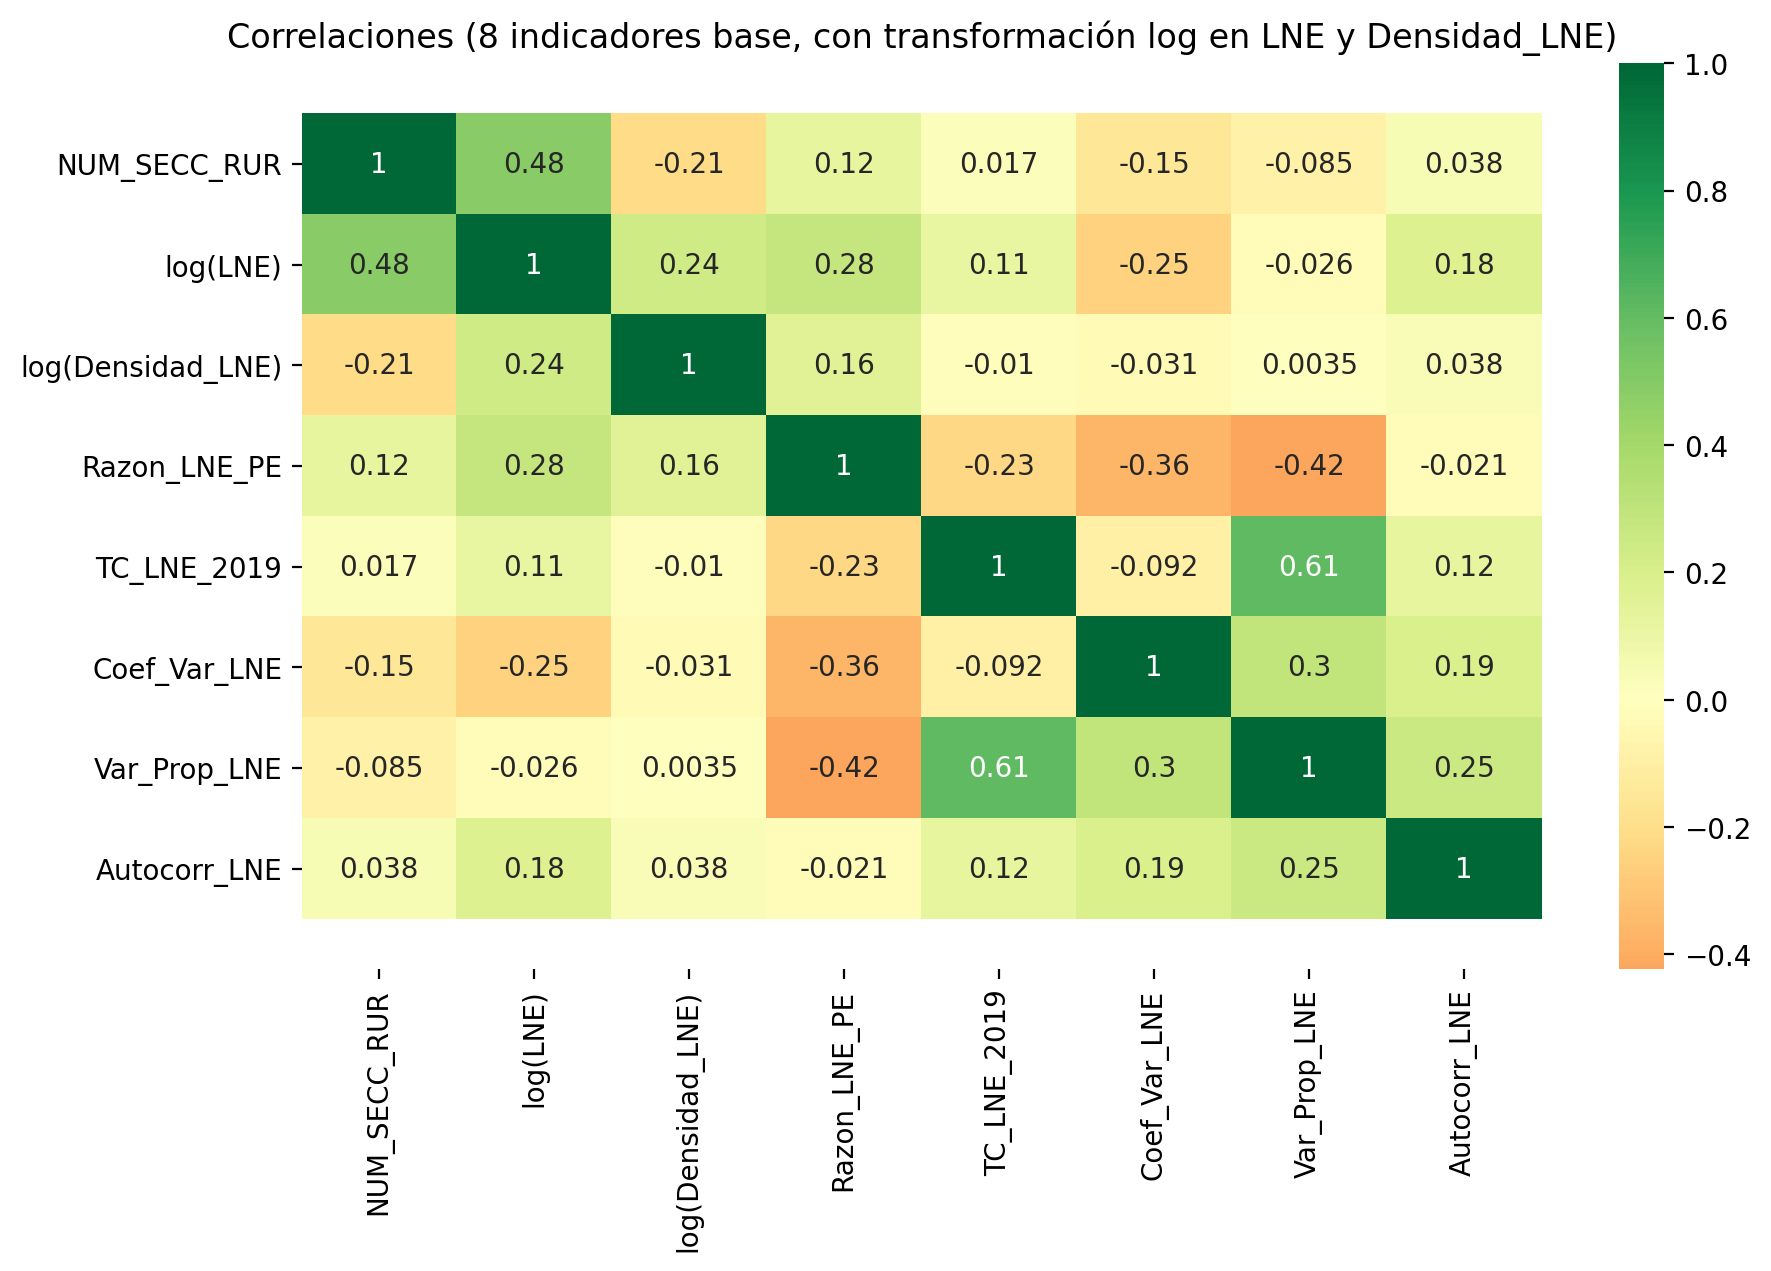

In [18]:
#Plot correlogram
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(datos_mun_limpio_f_tf.corr(), xticklabels=datos_mun_limpio_f_tf.corr().columns, yticklabels=datos_mun_limpio_f_tf.corr().columns, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Correlaciones (8 indicadores base, con transformación log en LNE y Densidad_LNE)')

#se guarda la grafica
plt.savefig('Pyplot_heatmap_ind8_tf.png',dpi=600,bbox_inches="tight")
plt.show() 

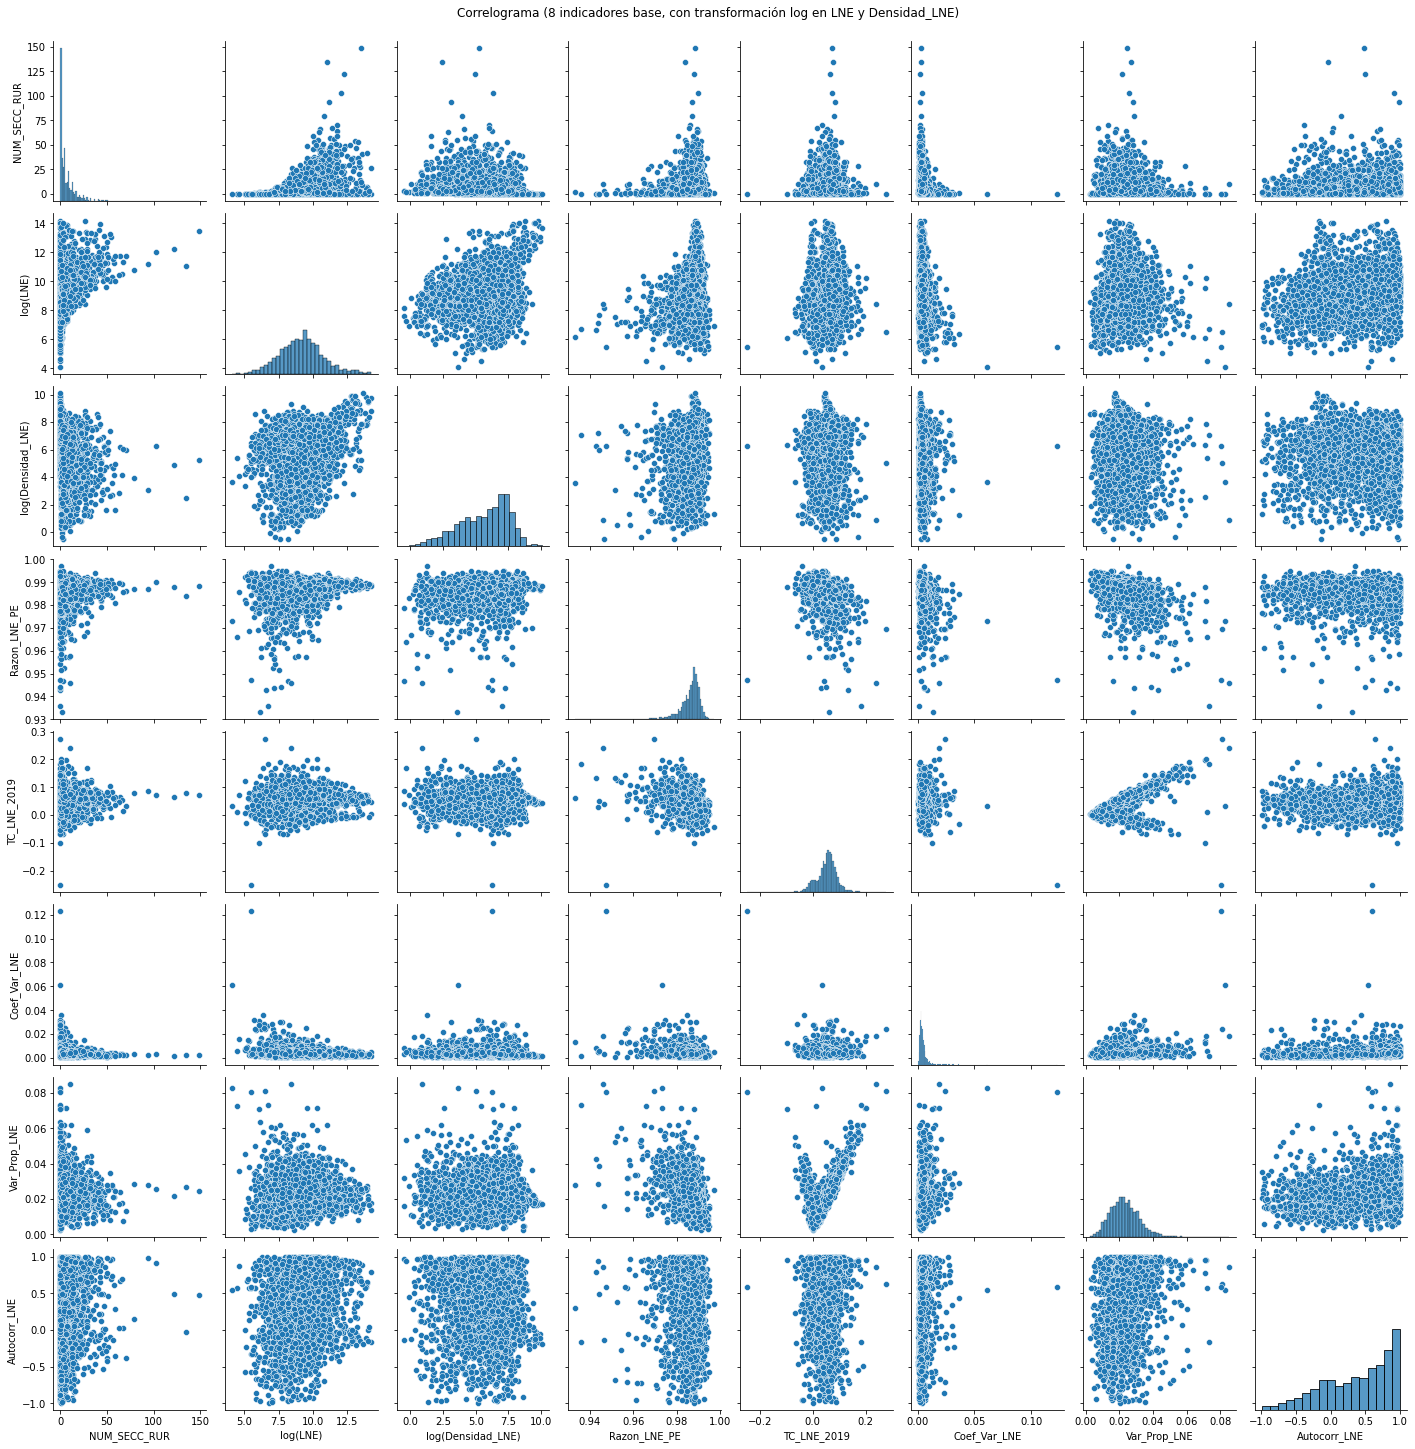

In [19]:
#pair-plot
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
corr1_tf = sns.pairplot(datos_mun_limpio_f_tf)
corr1_tf.fig.suptitle("Correlograma (8 indicadores base, con transformación log en LNE y Densidad_LNE)", y=1.01)
corr1_tf.savefig('Pyplot_correlogram_ind8_tf.png',dpi=600)

<br>

## Gráficas (heatmap y pair-plot) y análisis de correlación (7 indicadores con transformación log)

In [20]:
datos_mun_limpio_f_tf_ind7 = datos_mun_limpio_f_tf[['NUM_SECC_RUR','log(LNE)', 'log(Densidad_LNE)', 'Razon_LNE_PE', 'TC_LNE_2019', 'Coef_Var_LNE','Autocorr_LNE']]

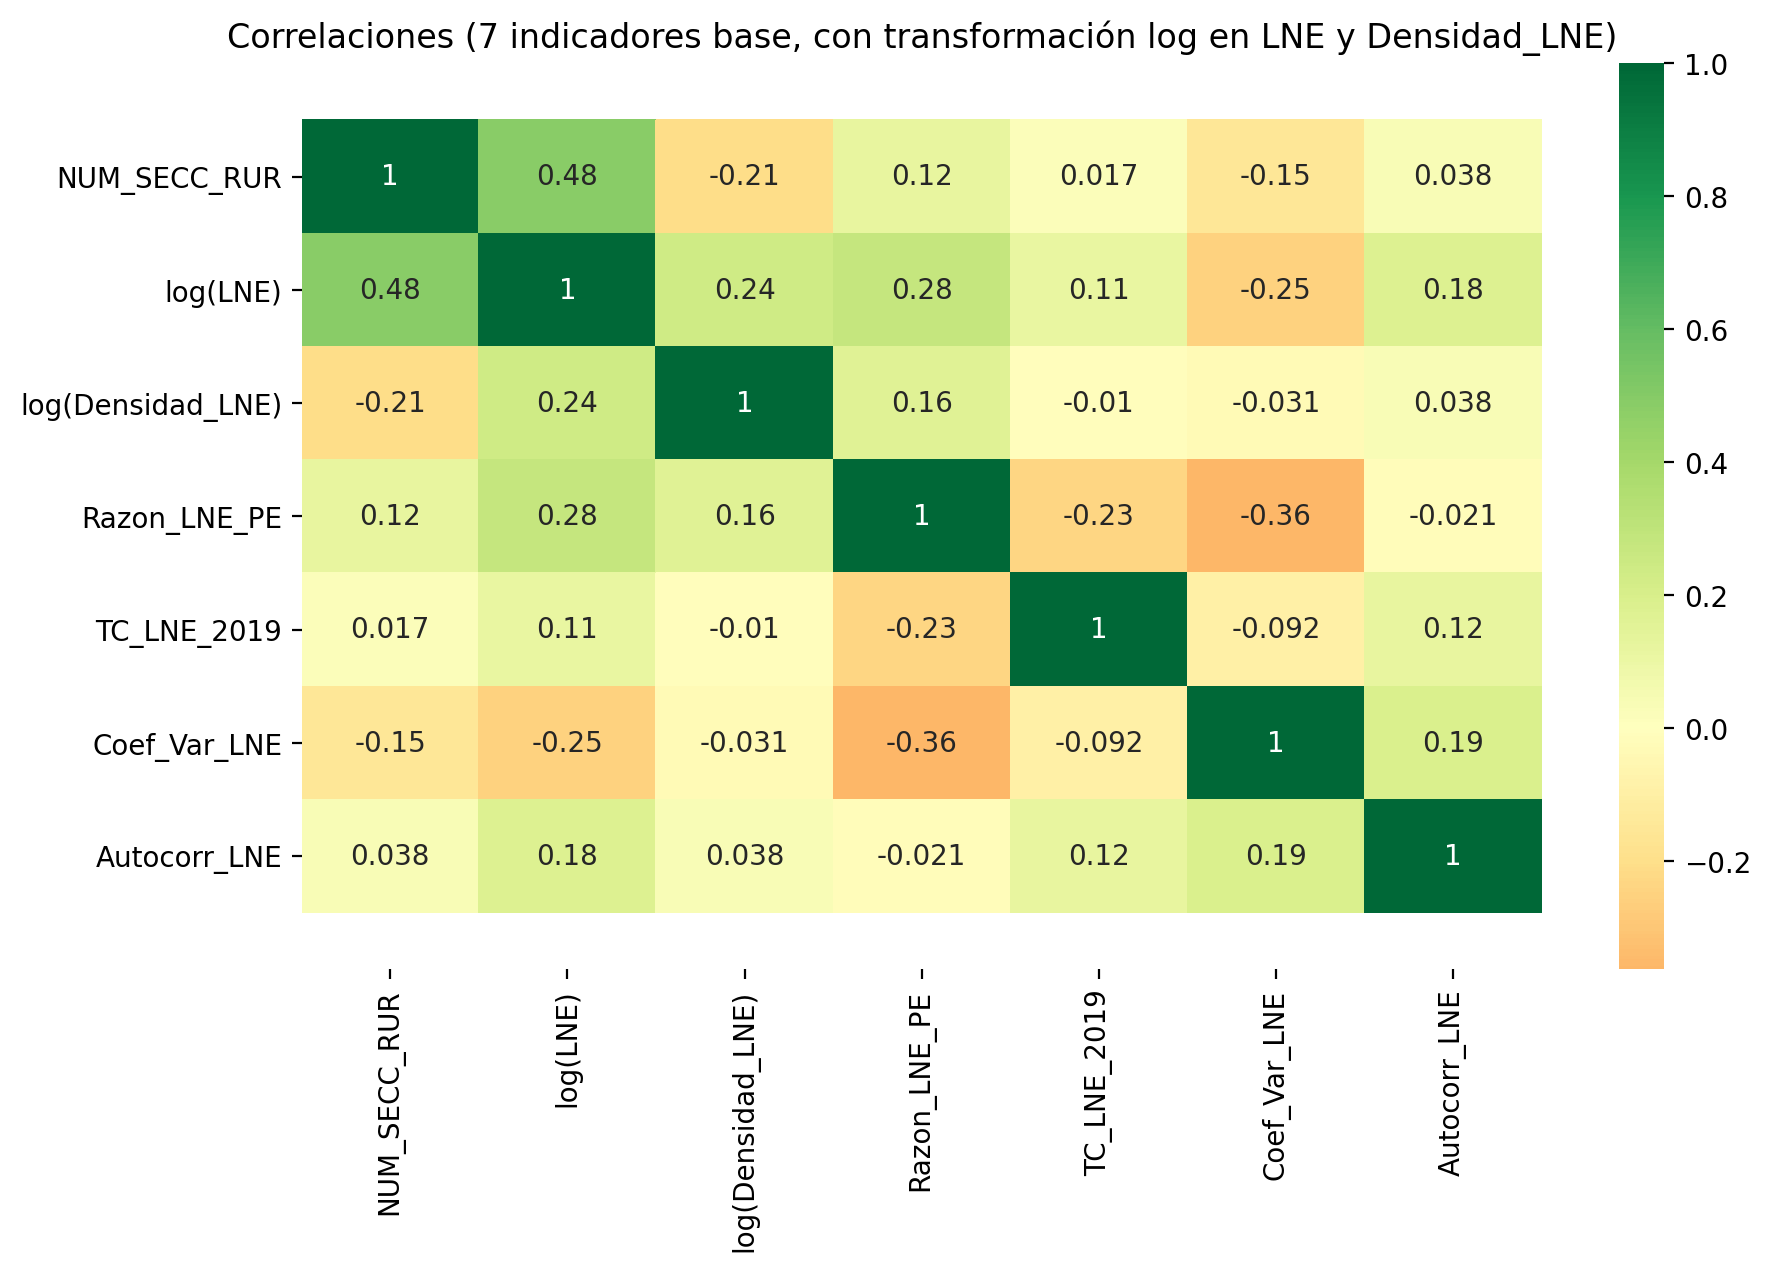

In [21]:
#Plot correlogram
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(datos_mun_limpio_f_tf_ind7.corr(), xticklabels=datos_mun_limpio_f_tf_ind7.corr().columns, yticklabels=datos_mun_limpio_f_tf_ind7.corr().columns, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Correlaciones (7 indicadores base, con transformación log en LNE y Densidad_LNE)')

#se guarda la grafica
plt.savefig('Pyplot_heatmap_ind7_tf.png',dpi=600,bbox_inches="tight")
plt.show() 

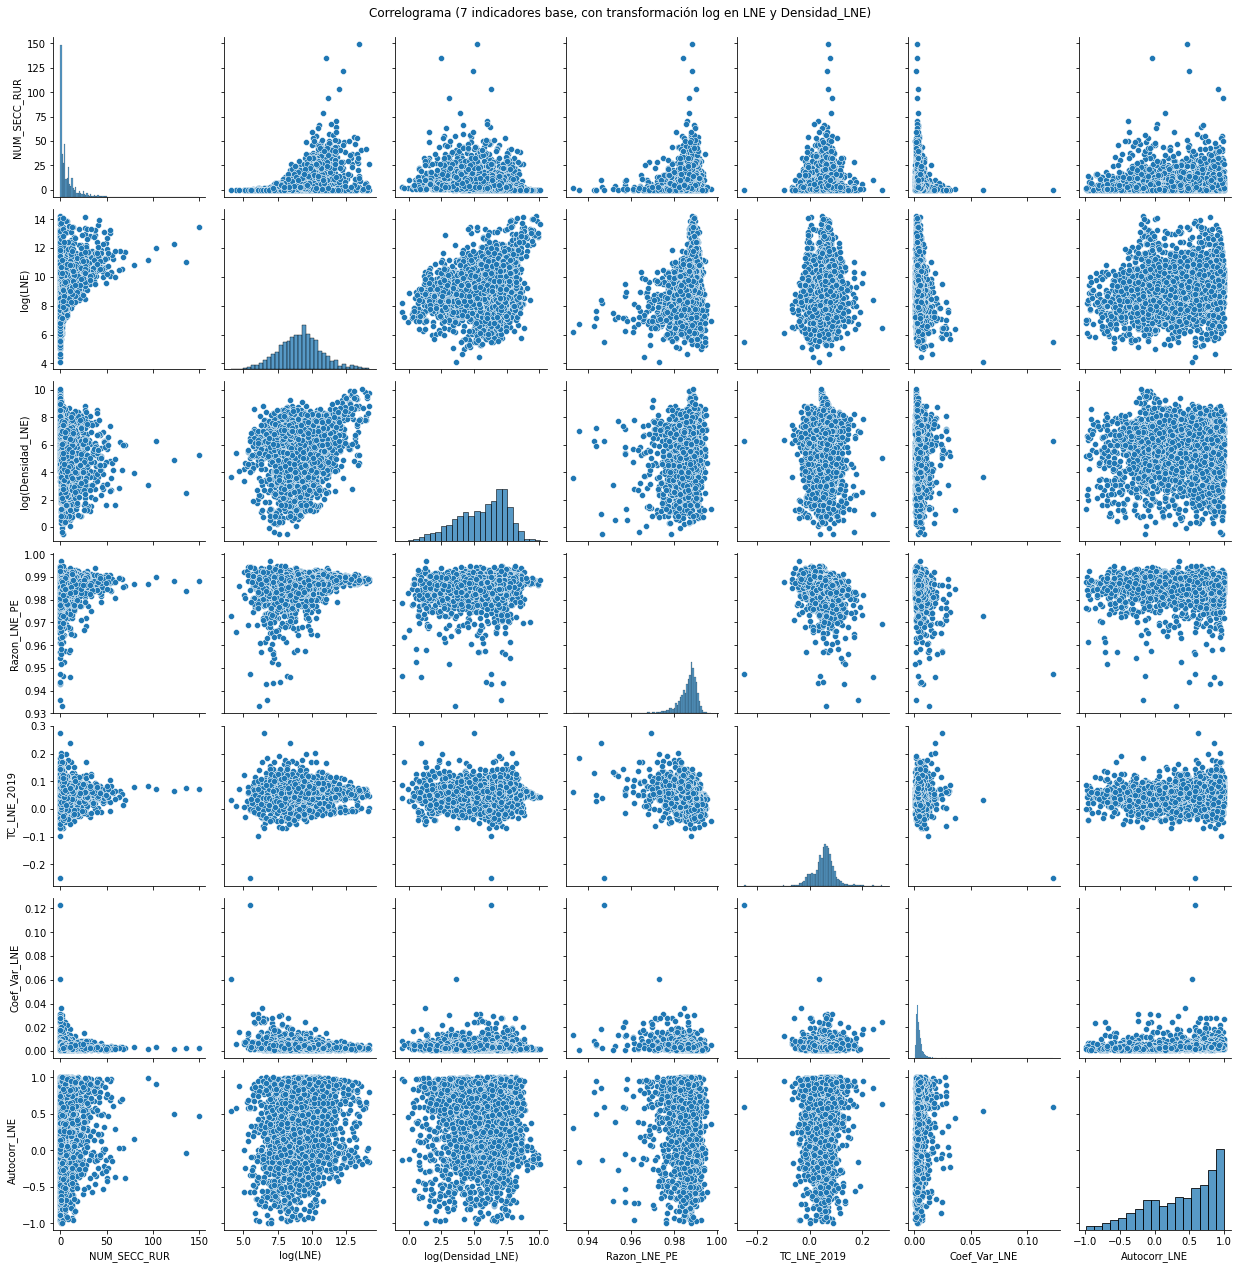

In [22]:
#pair-plot
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
corr2_tf = sns.pairplot(datos_mun_limpio_f_tf_ind7)
corr2_tf.fig.suptitle("Correlograma (7 indicadores base, con transformación log en LNE y Densidad_LNE)", y=1.01)
corr2_tf.savefig('Pyplot_correlogram_ind7_tf.png',dpi=600)

<br>

# Análisis de Componentes Principales (PCA)

### Preprocesamiento de datos

In [23]:
from sklearn.preprocessing import StandardScaler

#Se crean listas para separar los tipos/escenarios de datos

#seleccionamos 7 indicadores
ind7 = ['NUM_SECC_RUR','LNE', 'Densidad_LNE', 'Razon_LNE_PE', 'TC_LNE_2019', 'Coef_Var_LNE', 'Autocorr_LNE']

#seleccionamos 7 indicadores (con log)
ind7_tf = ['NUM_SECC_RUR','log(LNE)', 'log(Densidad_LNE)', 'Razon_LNE_PE', 'TC_LNE_2019', 'Coef_Var_LNE', 'Autocorr_LNE']

#seleccionamos 8 indicadores
ind8 = ['NUM_SECC_RUR','LNE', 'Densidad_LNE', 'Razon_LNE_PE', 'TC_LNE_2019', 'Coef_Var_LNE', 'Var_Prop_LNE', 'Autocorr_LNE']

#seleccionamos 8 indicadores (con log)
ind8_tf = ['NUM_SECC_RUR','log(LNE)', 'log(Densidad_LNE)', 'Razon_LNE_PE', 'TC_LNE_2019', 'Coef_Var_LNE', 'Var_Prop_LNE', 'Autocorr_LNE']

#etiquetas
labels = ['EDO', 'NOMBRE_ESTADO', 'MUN', 'NOMBRE_MUNICIPIO']


#seleccionamos los valores de solo 7 indicadores (sin Var_Prop_LNE)
x = datos_mun_limpio_f.loc[:, ind7].values

#seleccionamos los valores de solo 7 indicadores (sin Var_Prop_LNE y con log)
x_1 = datos_mun_limpio_f_tf.loc[:, ind7_tf].values

#seleccionamos los valores de los 8 indicadores originales
x_2 = datos_mun_limpio_f.loc[:, ind8].values

#seleccionamos los valores de los 8 indicadores con transformacion log en LNE y Densidad
x_3 = datos_mun_limpio_f_tf.loc[:, ind8_tf].values

#seleccionamos las labels (metadatos)
y = metadatos.loc[:,labels].values

print(x.shape)
print(x_1.shape)
print(x_2.shape)
print(x_3.shape)
print(y.shape)

(2456, 7)
(2456, 7)
(2456, 8)
(2456, 8)
(2456, 4)


In [24]:
#para verificar que no haya valores nulos o infinitos en ind7
print(np.any(np.isnan(x)))
print(np.all(np.isfinite(x)))

#para verificar que no haya valores nulos o infinitos en ind7_tf
print(np.any(np.isnan(x_1)))
print(np.all(np.isfinite(x_1)))

#para verificar que no haya valores nulos o infinitos en ind8
print(np.any(np.isnan(x_2)))
print(np.all(np.isfinite(x_2)))

#para verificar que no haya valores nulos o infinitos en ind8_tf
print(np.any(np.isnan(x_3)))
print(np.all(np.isfinite(x_3)))

False
True
False
True
False
True
False
True


In [25]:
#Estandarizamos los valores de ind7 (normalización)
x = StandardScaler().fit_transform(x)
print(x.shape)

#Estandarizamos los valores de ind7_tf (normalización)
x_1 = StandardScaler().fit_transform(x_1)
print(x_1.shape)

#Estandarizamos los valores de ind8 (normalización)
x_2 = StandardScaler().fit_transform(x_2)
print(x_2.shape)

#Estandarizamos los valores de ind8_tf (normalización)
x_3 = StandardScaler().fit_transform(x_3)
print(x_3.shape)

(2456, 7)
(2456, 7)
(2456, 8)
(2456, 8)


<br>

## PCA con 7 indicadores

In [26]:
from sklearn.decomposition import PCA

#calculo de PCA (con las 7 componentes), y obtención de los valores CP para cada municipio
pca_7cp = PCA(n_components=7)
pca_ind7 = pca_7cp.fit_transform(x)

#razones de varianza explicada por cada CP 
print('Razón de varianza explicada por cada CP (n_components=7): %s'
      % str(pca_7cp.explained_variance_ratio_))

#dataframe con los valores de los 7 CP por municipio
df_pca_ind7 = pd.DataFrame(data = pca_ind7
             , columns = ['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7'])
df_pca_ind7

Razón de varianza explicada por cada CP (n_components=7): [0.24360469 0.192777   0.16684114 0.14944869 0.12723224 0.06753295
 0.05256328]


CP1       CP2       CP3       CP4       CP5       CP6       CP7
0    -0.290827  1.304370 -0.470542  1.249692 -0.985389  0.343395 -0.883019
1    -0.215022 -0.976397 -0.423919  1.386989 -1.260267 -0.625396  0.304296
2    -0.597435  0.071978 -0.716279  1.371428 -0.870282 -0.309656 -0.647832
3    -0.382682 -0.278937 -0.606074  1.675445 -0.996878 -0.462573 -0.289389
4    -0.428400 -0.232114 -0.320612  1.533638 -0.432850 -0.508456 -0.335265
...        ...       ...       ...       ...       ...       ...       ...
2451  0.336526 -0.414118  0.879856 -0.236011 -0.054547 -0.515434  0.024942
2452 -0.052455 -0.693651  2.394801  0.574858  0.201790 -0.068696 -0.577988
2453  0.815847  0.275372  1.779525  0.018950 -0.257829  0.094995 -0.099322
2454  0.562309  0.233027  0.954854 -0.056961 -0.390447 -0.419723 -0.098396
2455  1.391414  0.517387  0.405960 -2.500965  1.204864 -0.454846  0.366341

[2456 rows x 7 columns]

In [27]:
#obtención de los pesos por cada variable
pca_pesos_ind7 = pca_7cp.components_
print(pca_pesos_ind7)

#transformación a un dataframe:
df_pca_pesos_ind7 = pd.DataFrame(pca_pesos_ind7, columns=ind7)
principal_components_pesos = pd.DataFrame(['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7'])
df_pca_pesos_ind7.insert(0, 'Componentes Principales', principal_components_pesos)

#se guarda el último dataframe en un csv
df_pca_pesos_ind7.to_csv(r'Resultados_Mun_PCA_pesos_ind7.csv', index = None)

df_pca_pesos_ind7=df_pca_pesos_ind7.set_index('Componentes Principales')
df_pca_pesos_ind7

[[-0.21170503 -0.55085492 -0.4652781  -0.46318748  0.11282181  0.4300933
   0.15167227]
 [-0.28763411  0.40968353  0.55206786 -0.39929218  0.25268208  0.39265581
   0.25920269]
 [ 0.60482668  0.13569797 -0.21108812 -0.08115543  0.5821943  -0.15528845
   0.44895617]
 [ 0.28162339  0.13998009 -0.08128719  0.23331698 -0.60163818  0.45566732
   0.52004636]
 [ 0.52575477  0.2531604  -0.07551216 -0.45700865 -0.1724365   0.26200532
  -0.58868634]
 [ 0.01324508  0.01216482 -0.05443388  0.59673253  0.43904333  0.59720019
  -0.30202105]
 [-0.38823581  0.65304803 -0.64722982 -0.00731252  0.0033026  -0.06163687
  -0.00559551]]


NUM_SECC_RUR       LNE  Densidad_LNE  Razon_LNE_PE  \
Componentes Principales                                                       
CP1                         -0.211705 -0.550855     -0.465278     -0.463187   
CP2                         -0.287634  0.409684      0.552068     -0.399292   
CP3                          0.604827  0.135698     -0.211088     -0.081155   
CP4                          0.281623  0.139980     -0.081287      0.233317   
CP5                          0.525755  0.253160     -0.075512     -0.457009   
CP6                          0.013245  0.012165     -0.054434      0.596733   
CP7                         -0.388236  0.653048     -0.647230     -0.007313   

                         TC_LNE_2019  Coef_Var_LNE  Autocorr_LNE  
Componentes Principales                                           
CP1                         0.112822      0.430093      0.151672  
CP2                         0.252682      0.392656      0.259203  
CP3                         0.582194     -0.155288      0.448956  
CP4                        -0.601638      0.455667      0.520046  
CP5                        -0.172437      0.262005     -0.588686  
CP6                         0.439043      0.597200     -0.302021  
CP7                         0.003303     -0.061637     -0.005596

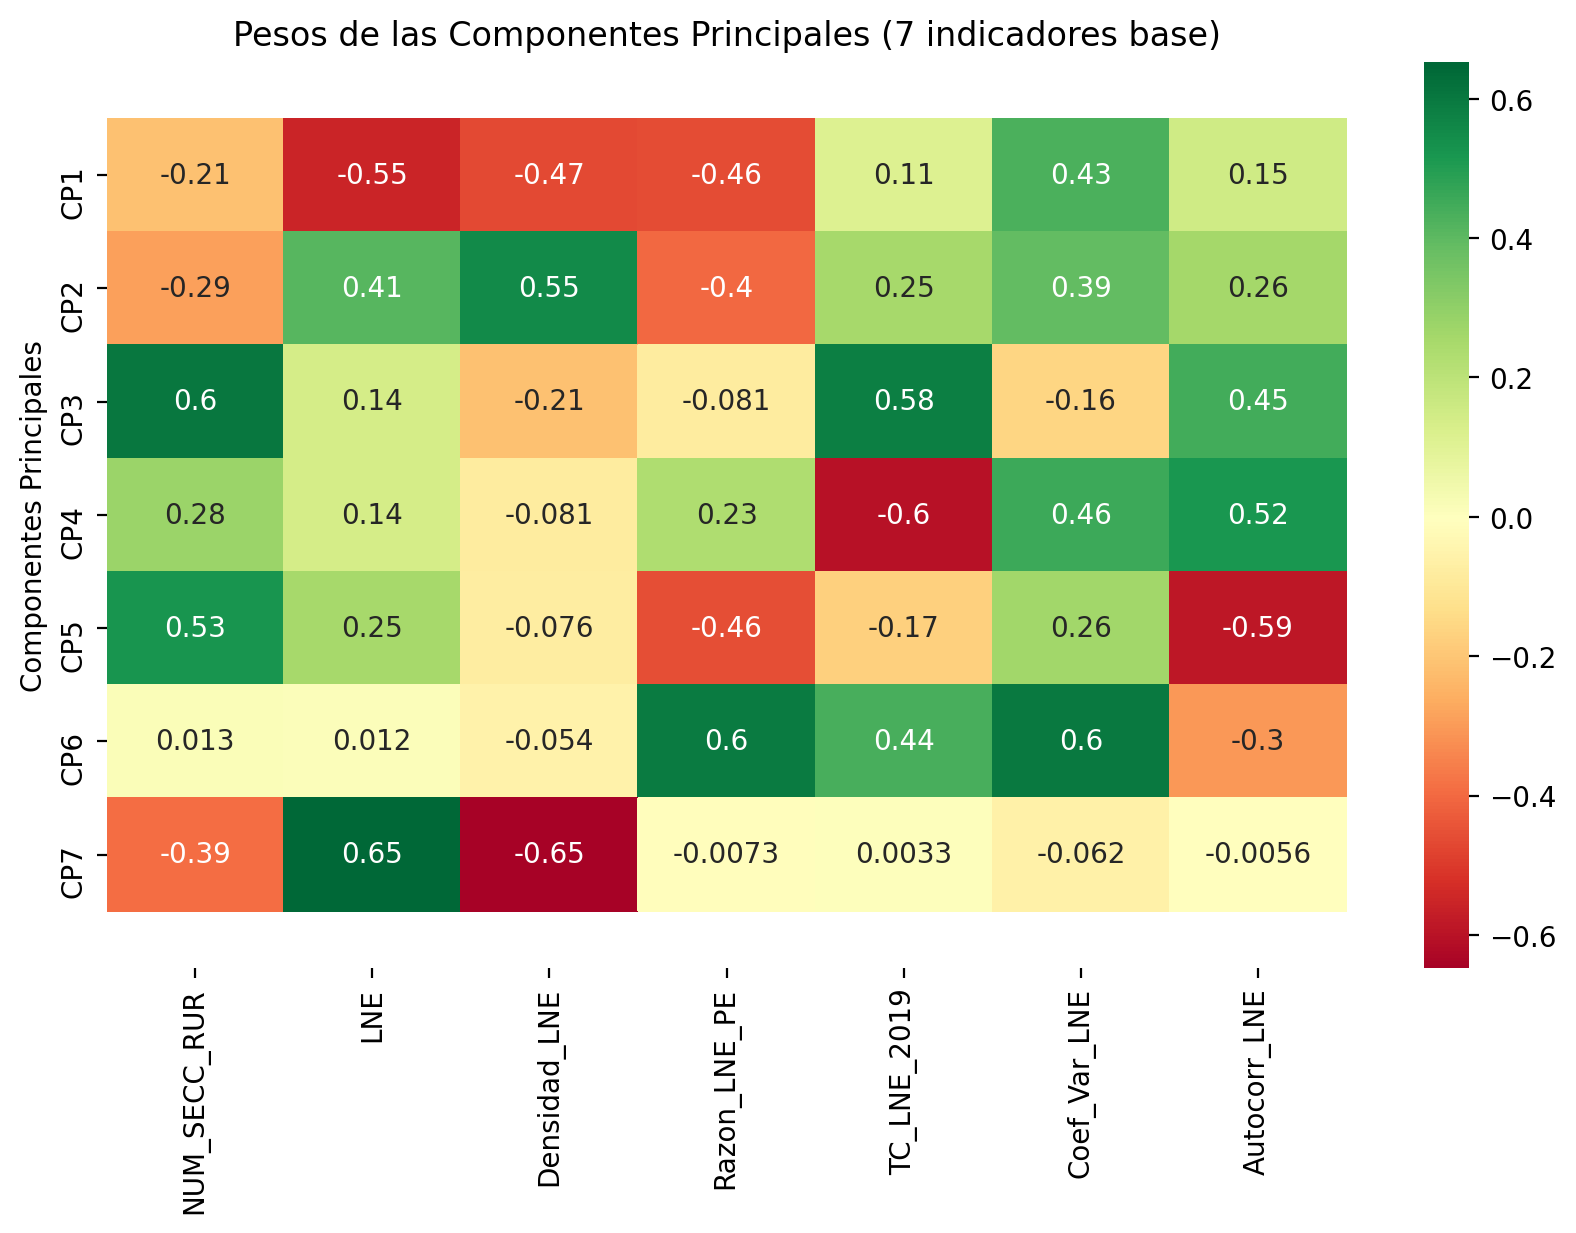

In [28]:
plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(df_pca_pesos_ind7, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Pesos de las Componentes Principales (7 indicadores base)')

plt.savefig('Pyplot_PCA_heatmap_ind7.png',dpi=600,bbox_inches="tight")
plt.show() 

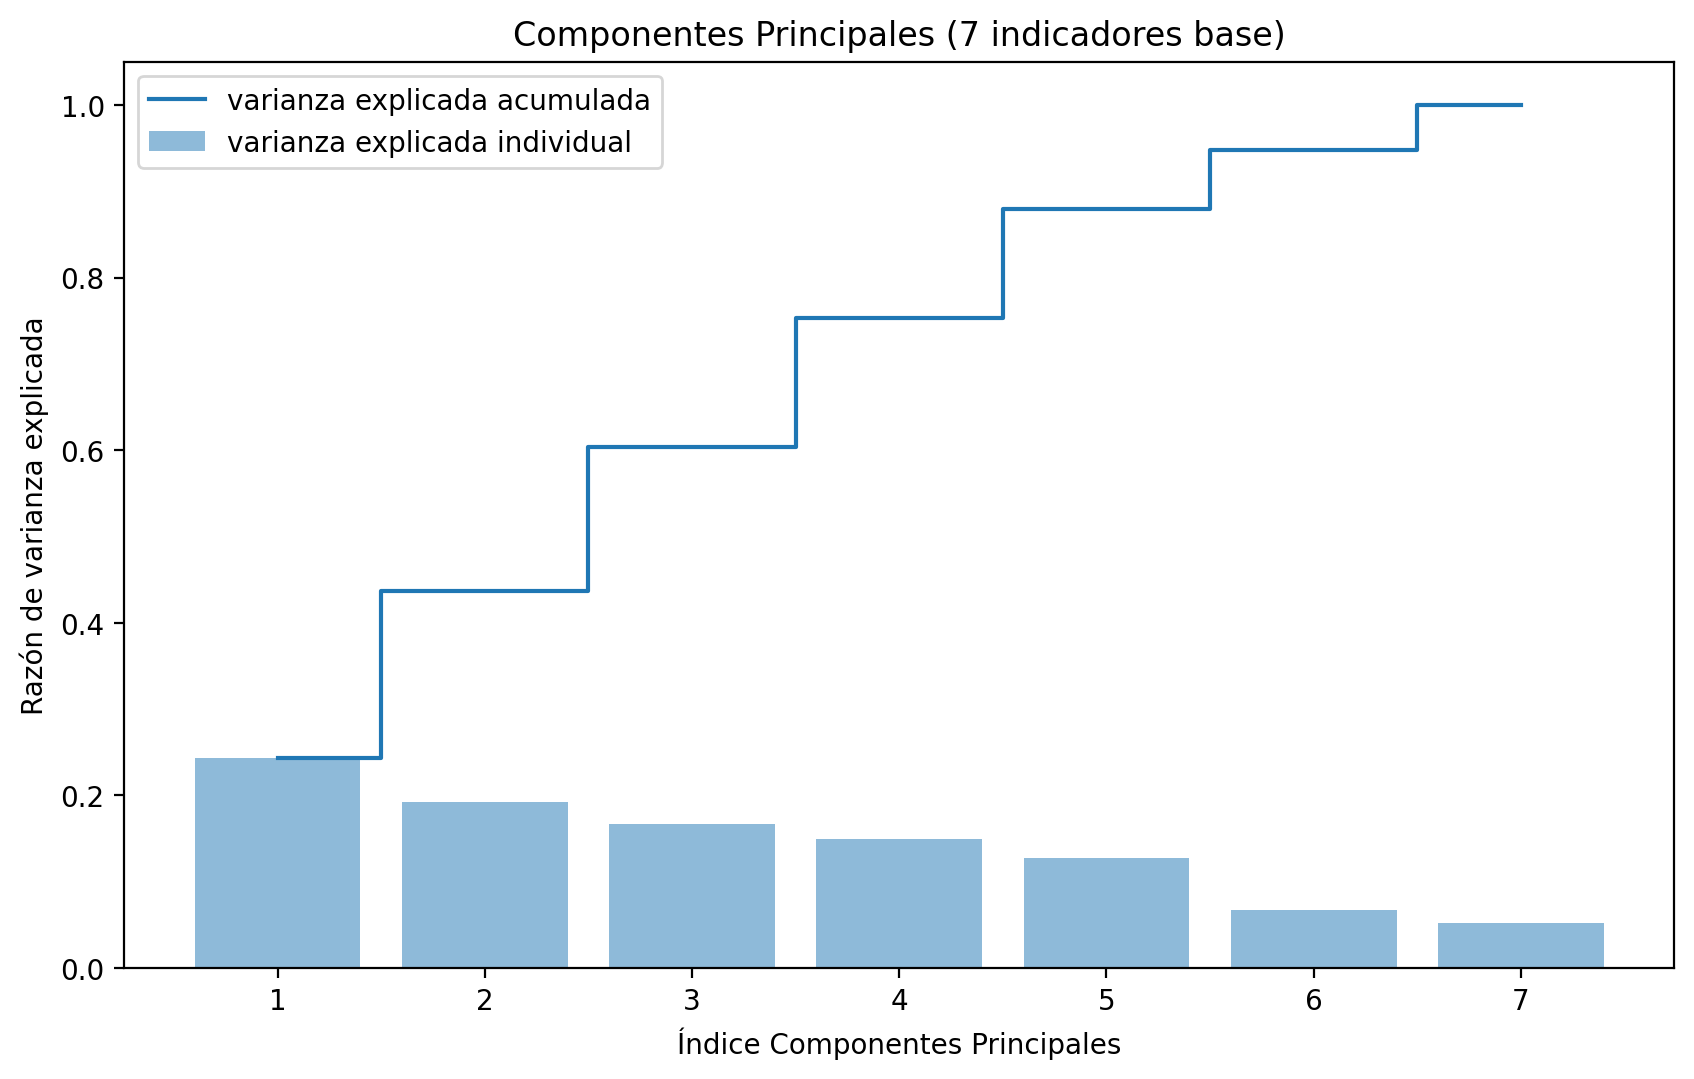

In [29]:

#calculo de la matriz de covarianza y sus correspondientes eigenvalores y eigenvectores
cov_mat = np.cov(x.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# calculate of individual and cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.figure(figsize=(10,6), dpi= 200)
plt.bar(range(1,8), var_exp, alpha=0.5,
        align='center', label='varianza explicada individual')
plt.step(range(1,8), cum_var_exp, where='mid',
         label='varianza explicada acumulada')
plt.ylabel('Razón de varianza explicada')
plt.xlabel('Índice Componentes Principales')
plt.legend(loc='best')
plt.title('Componentes Principales (7 indicadores base)')

plt.savefig('Pyplot_PCA_variance_ind7.png',dpi=600)
plt.show()

In [30]:
#concatenamos los resultados con los metadatos
df_pca_results_ind7 = pd.concat([metadatos[labels], df_pca_ind7], axis = 1)
df_pca_results_ind7.head()
#salvar resultados PCA
df_pca_results_ind7.to_csv(r'Resultados_Mun_PCA_ind7.csv', index = None)

### Proyección de los municipios en el espacio de Componentes Principales (7 indicadores)
Gráfica en el espacio CP1, CP2

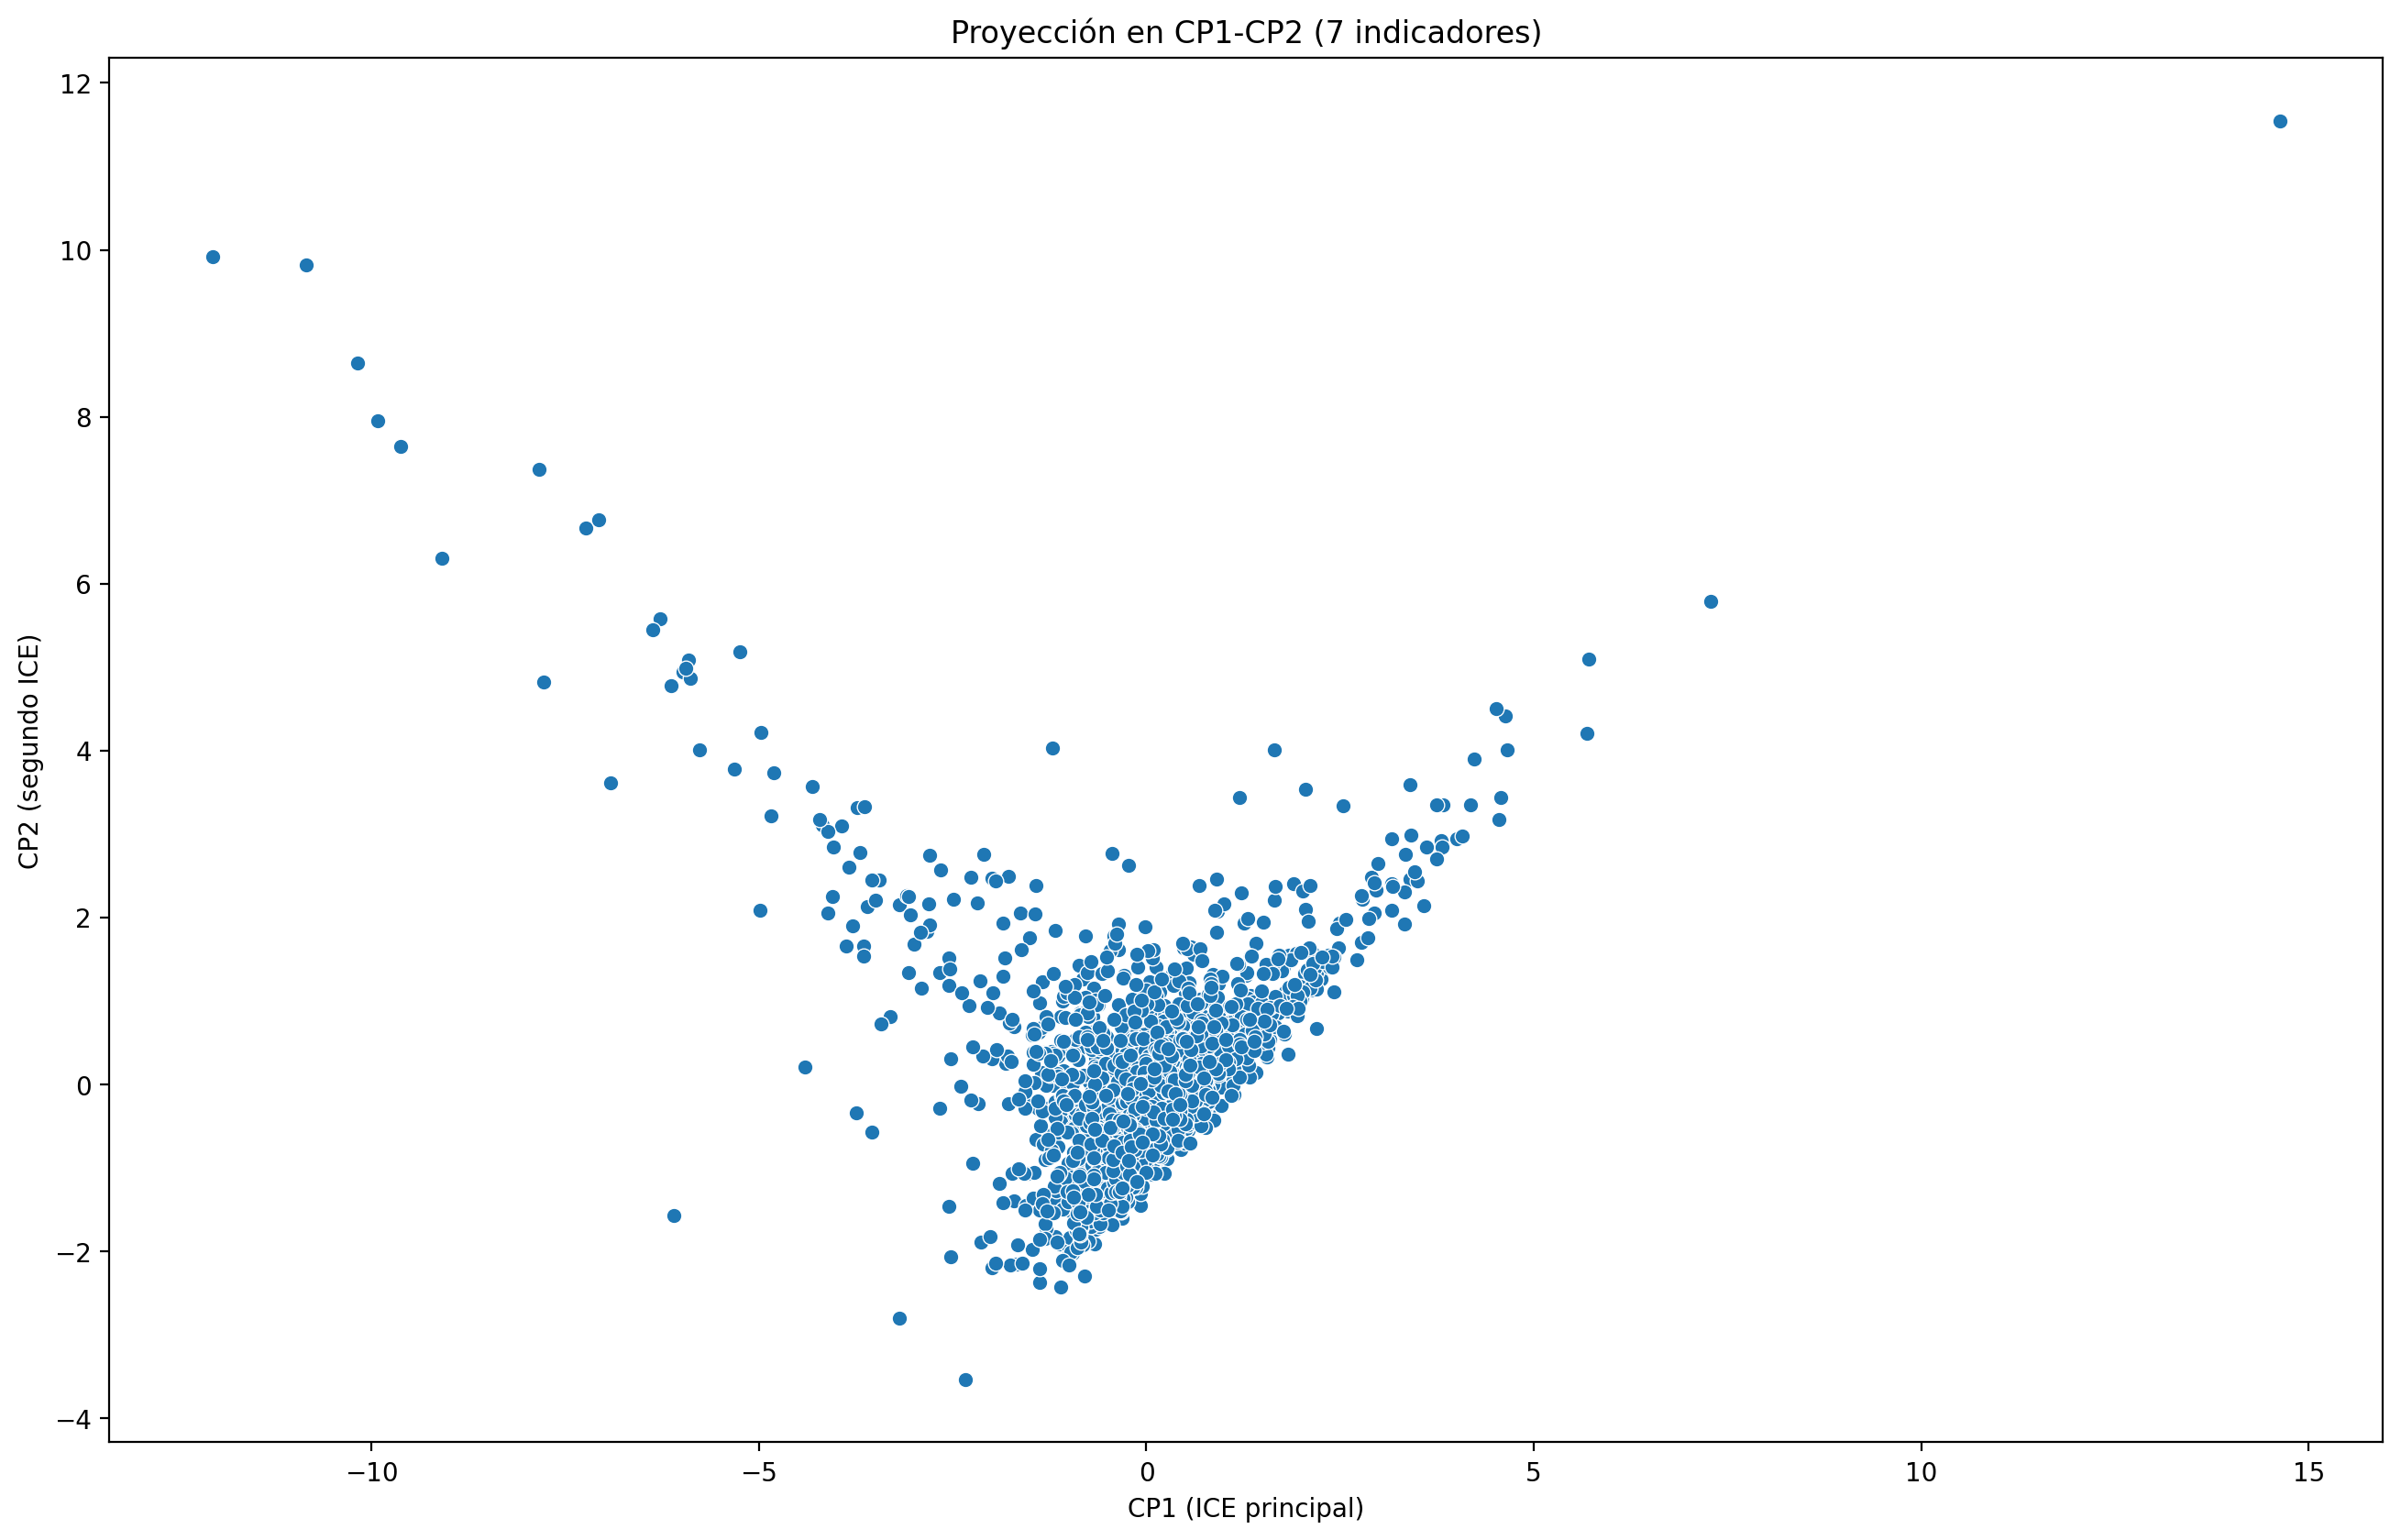

In [31]:
#Scatter plot (seaborn)  PC1 vs PC2
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python)

plt.figure(figsize=(16, 10), dpi= 200, facecolor='w', edgecolor='k')
sns.scatterplot(x="CP1", y="CP2", 
                data=df_pca_results_ind7)
# Set x-axis label
plt.xlabel('CP1 (ICE principal)')
# Set y-axis label
plt.ylabel('CP2 (segundo ICE)')
plt.title('Proyección en CP1-CP2 (7 indicadores)')

plt.savefig('Pyplot_PCA_projection_ind7.png',dpi=600)

Gráfica en el espacio CP1, CP2, CP3

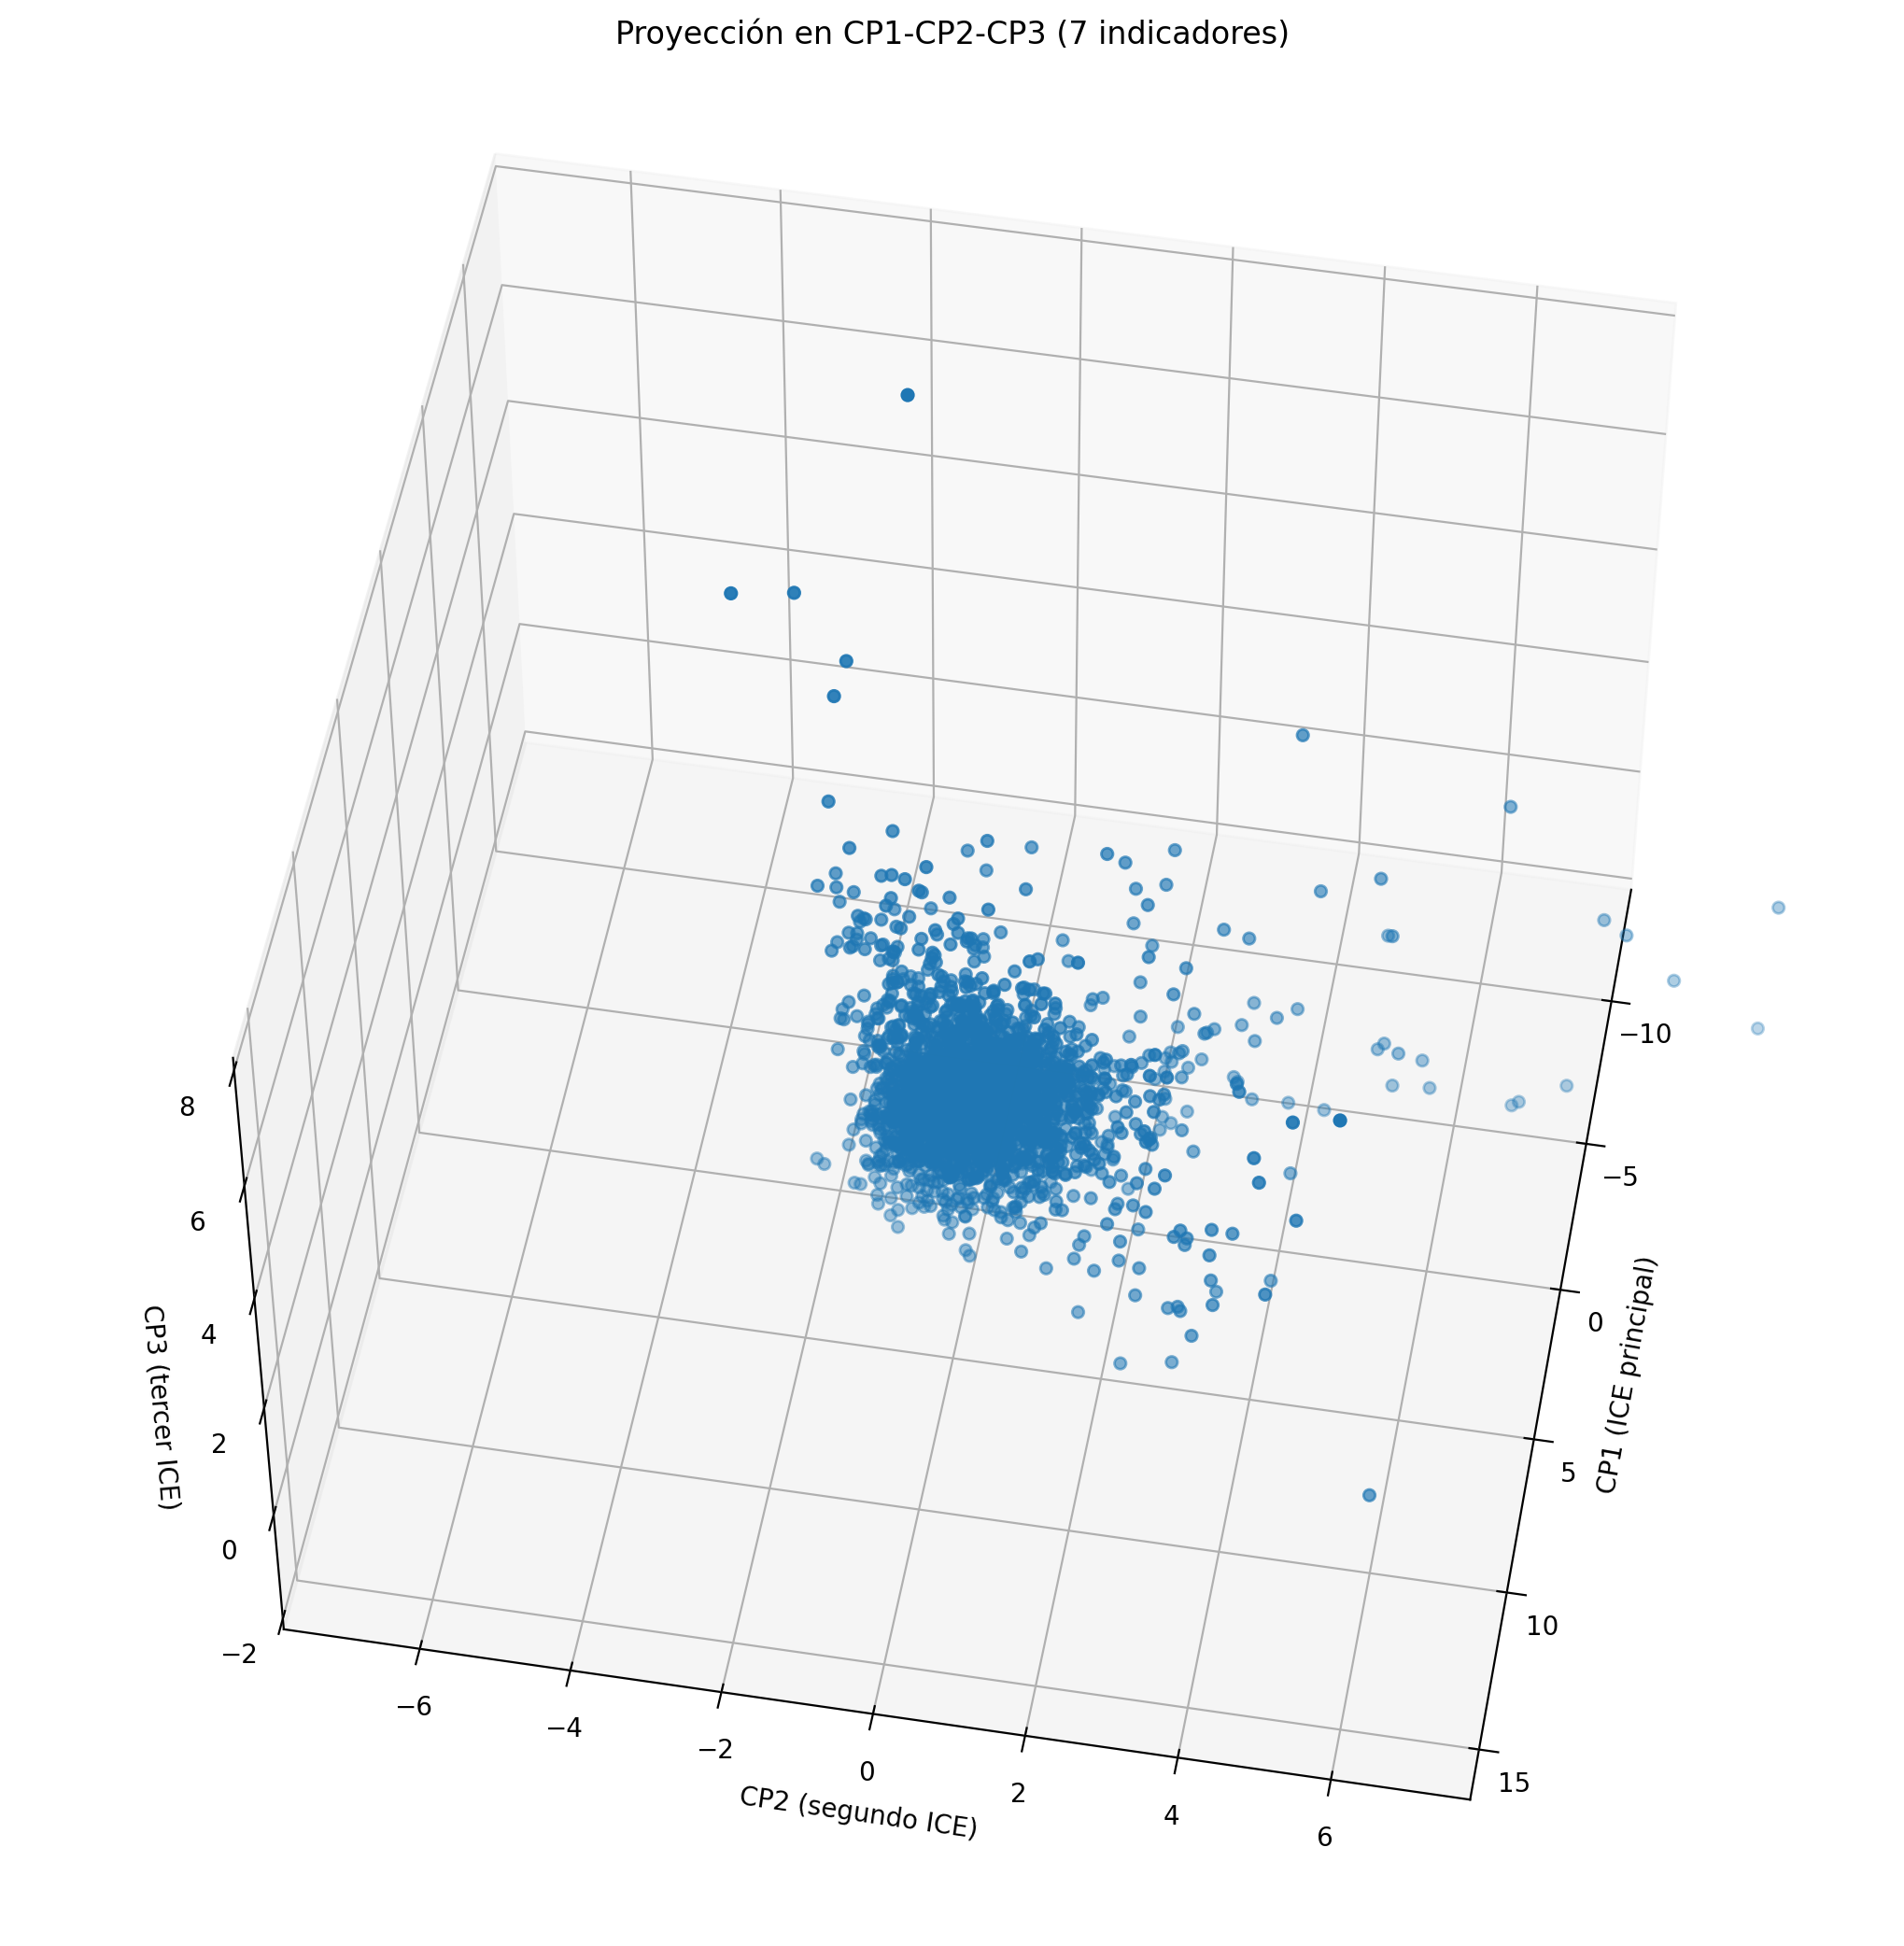

In [32]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

fig = pyplot.figure(figsize=(16, 10), dpi=200, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
ax.scatter(df_pca_results_ind7['CP1'], df_pca_results_ind7['CP2'], df_pca_results_ind7['CP3'],s=20)
# ax.set_xlim3d(-10, 40)
ax.set_ylim3d(-7.5,7.5)
ax.set_zlim3d(-2,8)
ax.set_xlabel('CP1 (ICE principal)')
ax.set_ylabel('CP2 (segundo ICE)')
ax.set_zlabel('CP3 (tercer ICE)')
ax.view_init(elev, azim)
ax.set_title('Proyección en CP1-CP2-CP3 (7 indicadores)')

plt.savefig('Pyplot_PCA_3dprojection_ind7.png',dpi=600)
pyplot.show()

Gráfica 3d animada

In [33]:
# import plotly.express as px

# fig = px.scatter_3d(df_pca_results_ind7, 
#                     x='CP1', 
#                     y='CP2', 
#                     z='CP3')
# fig.update_layout(scene = dict(
#                     xaxis_title='CP1 (ICE principal)',
#                     yaxis_title='CP2 (segundo ICE)',
#                     zaxis_title='CP3 (tercer ICE)'),
#                  legend_orientation="h")
# fig.show()

<br>

## PCA con 7 indicadores (con transformación log en LNE y Densidad_LNE)

In [34]:
from sklearn.decomposition import PCA

#calculo de PCA (con las 7 componentes), y obtención de los valores CP para cada municipio
pca_7cp_tf = PCA(n_components=7)
pca_ind7_tf = pca_7cp_tf.fit_transform(x_1)

#razones de varianza explicada por cada CP 
print('Razón de varianza explicada por cada CP (n_components=7): %s'
      % str(pca_7cp_tf.explained_variance_ratio_))

#dataframe con los valores de los 7 CP por municipio
df_pca_ind7_tf = pd.DataFrame(data = pca_ind7_tf
             , columns = ['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7'])
df_pca_ind7_tf

Razón de varianza explicada por cada CP (n_components=7): [0.26509148 0.19086047 0.17121537 0.14902264 0.10925105 0.06679438
 0.04776462]


CP1       CP2       CP3       CP4       CP5       CP6       CP7
0    -0.396410  0.312748 -2.048180  1.063489  0.078595  0.293304 -0.206136
1    -0.336869 -0.664905  0.162953  1.413451 -1.675786 -0.495803 -0.249283
2    -0.672740 -0.640397 -1.416536  1.263932 -0.198634 -0.328894  0.221223
3    -0.690225 -0.621053 -1.306983  1.537761 -0.493104 -0.477162  0.162276
4    -1.020550 -0.249653 -1.057101  1.437208  0.076285 -0.562137  0.010152
...        ...       ...       ...       ...       ...       ...       ...
2451 -0.006583  0.697062  1.006117 -0.208517 -0.644477 -0.413032  0.121898
2452 -1.190893  1.945870  1.626221  0.473396 -0.729028  0.118182  0.640717
2453 -0.043935  1.929301  0.450838 -0.174874 -0.617898  0.180208  0.190153
2454  0.019917  0.912624 -0.502408 -0.307996 -0.239740 -0.425384  0.519526
2455  1.853758  0.849605  1.837795 -2.162265  0.481361 -0.420460 -0.437201

[2456 rows x 7 columns]

In [35]:
#obtención de los pesos por cada variable
pca_pesos_ind7_tf = pca_7cp_tf.components_
print(pca_pesos_ind7_tf)

#transformación a un dataframe:
df_pca_pesos_ind7_tf = pd.DataFrame(pca_pesos_ind7_tf, columns=ind7_tf)
principal_components_pesos = pd.DataFrame(['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7'])
df_pca_pesos_ind7_tf.insert(0, 'Componentes Principales', principal_components_pesos)

#se guarda el último dataframe en un csv
df_pca_pesos_ind7_tf.to_csv(r'Resultados_Mun_PCA_pesos_ind7_tf.csv', index = None)

df_pca_pesos_ind7_tf=df_pca_pesos_ind7_tf.set_index('Componentes Principales')
df_pca_pesos_ind7_tf

[[-0.44275466 -0.59105854 -0.16528089 -0.47430925 -0.00792863  0.44801561
  -0.03937294]
 [ 0.33353624  0.2790298  -0.17703029 -0.40330421  0.51704425  0.26121896
   0.53040723]
 [ 0.43561269 -0.14813439 -0.76289326 -0.10441756 -0.04037676 -0.19243062
  -0.3958899 ]
 [ 0.26110862  0.05579707 -0.15353108  0.17997667 -0.71706383  0.48386507
   0.35276003]
 [ 0.31784632  0.28348714  0.40934933 -0.42113383 -0.11535435  0.33961536
  -0.58740358]
 [ 0.03941721 -0.05738102 -0.08329783  0.62336946  0.44332363  0.57705481
  -0.2647595 ]
 [ 0.57637294 -0.68123235  0.4015709   0.05602352  0.08336117 -0.10752153
   0.14425303]]


NUM_SECC_RUR  log(LNE)  log(Densidad_LNE)  \
Componentes Principales                                              
CP1                         -0.442755 -0.591059          -0.165281   
CP2                          0.333536  0.279030          -0.177030   
CP3                          0.435613 -0.148134          -0.762893   
CP4                          0.261109  0.055797          -0.153531   
CP5                          0.317846  0.283487           0.409349   
CP6                          0.039417 -0.057381          -0.083298   
CP7                          0.576373 -0.681232           0.401571   

                         Razon_LNE_PE  TC_LNE_2019  Coef_Var_LNE  Autocorr_LNE  
Componentes Principales                                                         
CP1                         -0.474309    -0.007929      0.448016     -0.039373  
CP2                         -0.403304     0.517044      0.261219      0.530407  
CP3                         -0.104418    -0.040377     -0.192431     -0.395890  
CP4                          0.179977    -0.717064      0.483865      0.352760  
CP5                         -0.421134    -0.115354      0.339615     -0.587404  
CP6                          0.623369     0.443324      0.577055     -0.264759  
CP7                          0.056024     0.083361     -0.107522      0.144253

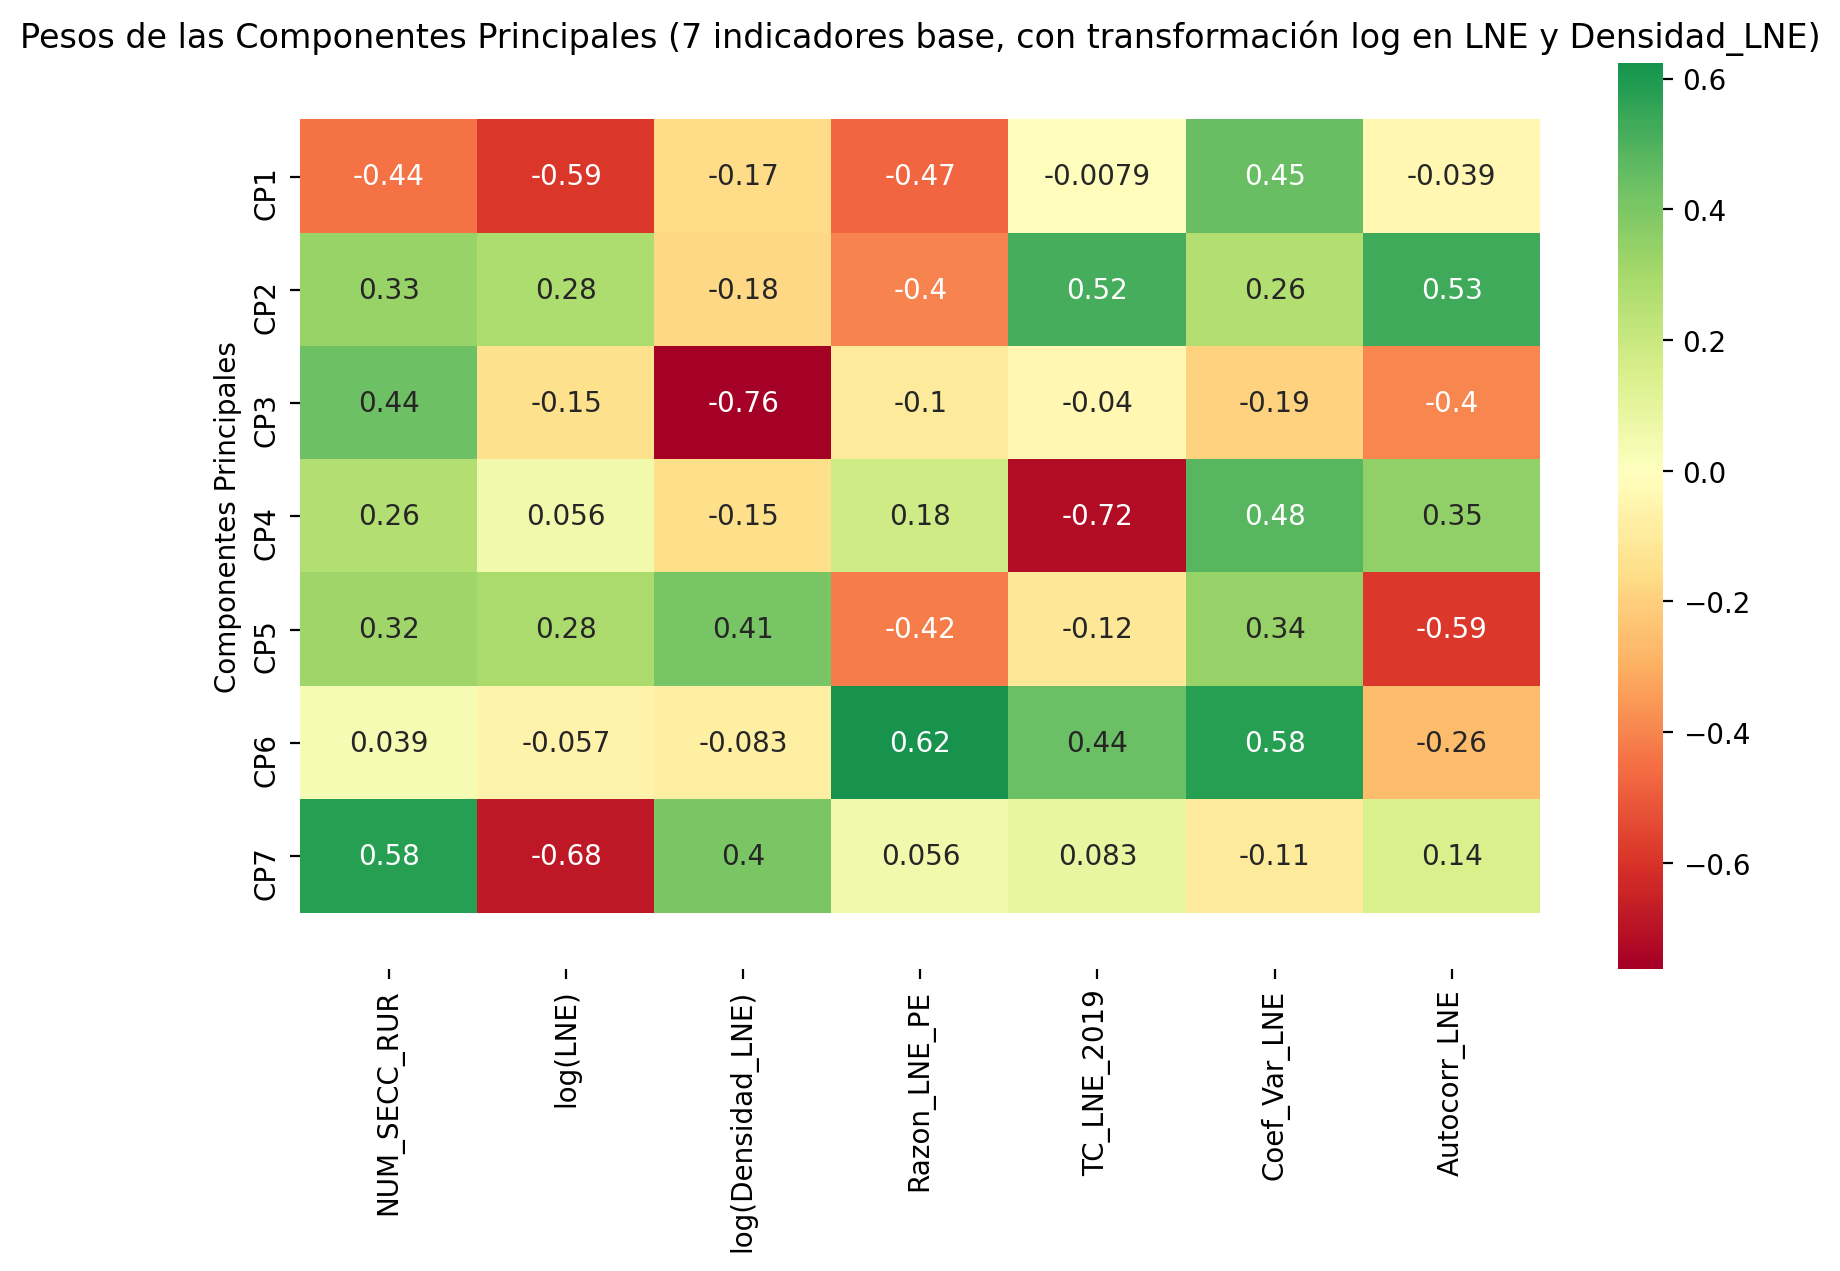

In [36]:
plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(df_pca_pesos_ind7_tf, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Pesos de las Componentes Principales (7 indicadores base, con transformación log en LNE y Densidad_LNE)')

plt.savefig('Pyplot_PCA_heatmap_ind7_tf.png',dpi=600,bbox_inches="tight")
plt.show() 

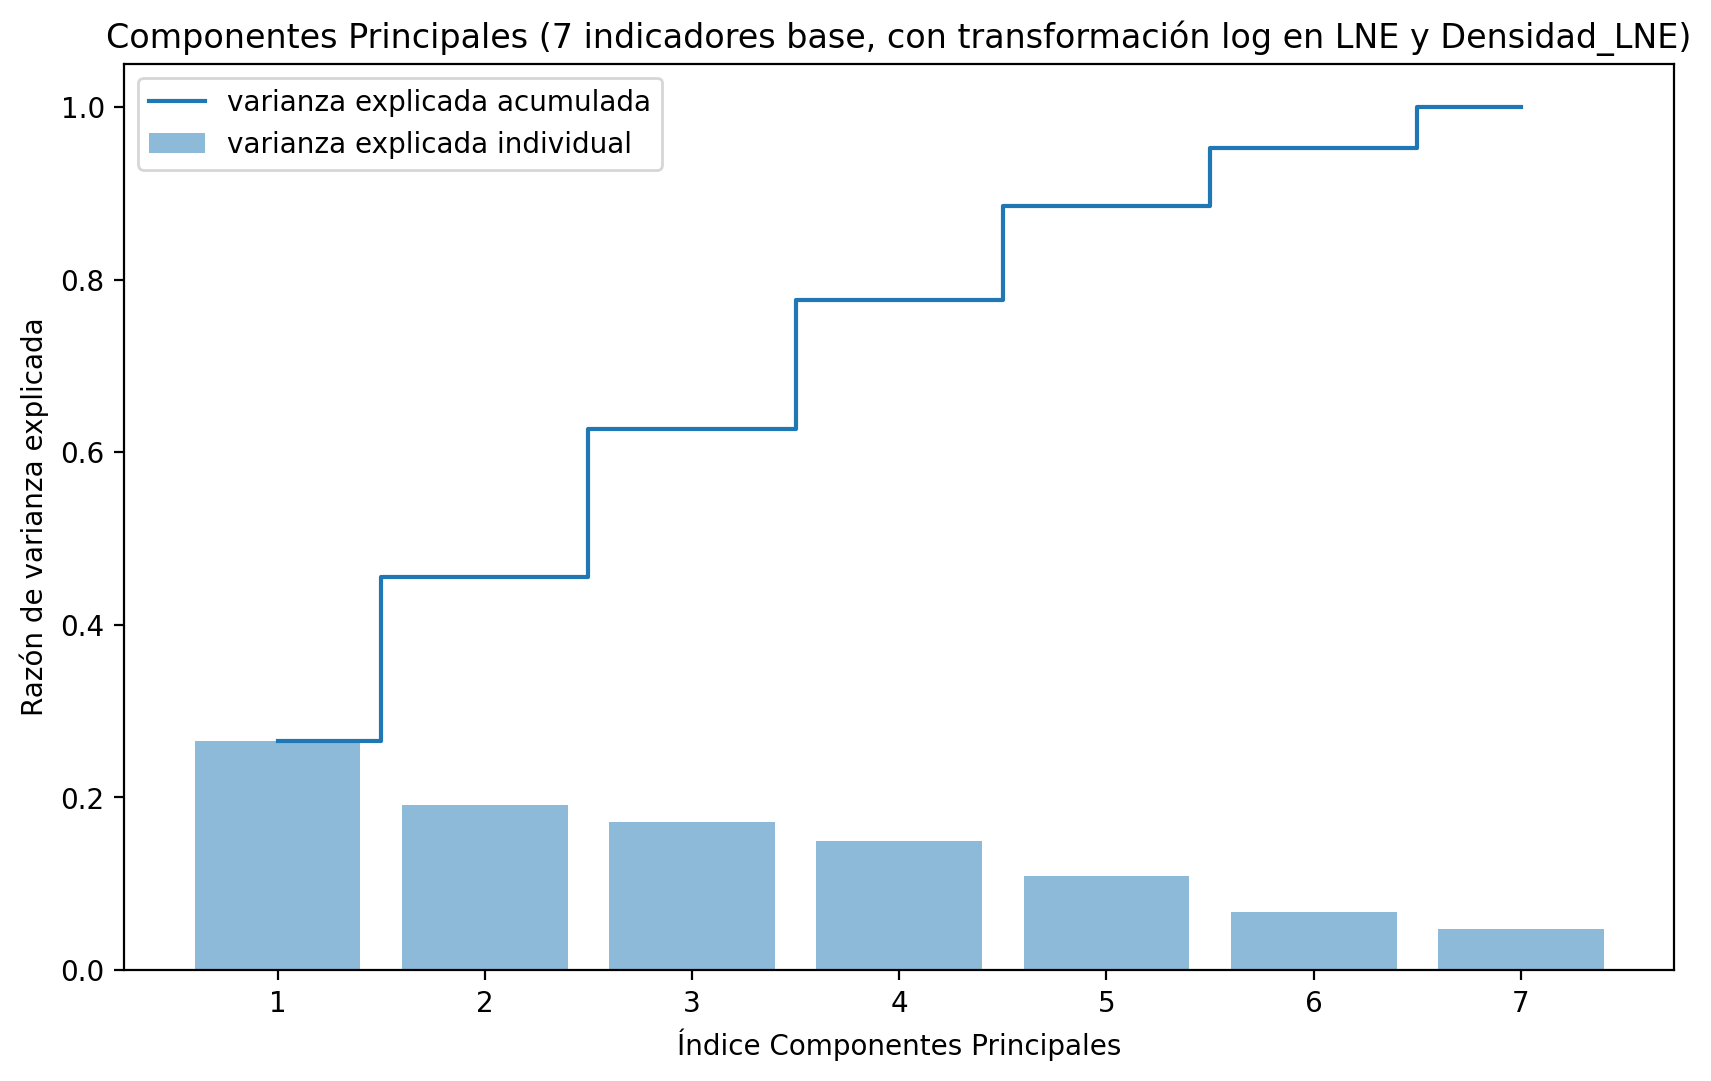

In [37]:

#calculo de la matriz de covarianza y sus correspondientes eigenvalores y eigenvectores
cov_mat = np.cov(x_1.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# calculate of individual and cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.figure(figsize=(10,6), dpi= 200)
plt.bar(range(1,8), var_exp, alpha=0.5,
        align='center', label='varianza explicada individual')
plt.step(range(1,8), cum_var_exp, where='mid',
         label='varianza explicada acumulada')
plt.ylabel('Razón de varianza explicada')
plt.xlabel('Índice Componentes Principales')
plt.legend(loc='best')
plt.title('Componentes Principales (7 indicadores base, con transformación log en LNE y Densidad_LNE)')

plt.savefig('Pyplot_PCA_variance_ind7_tf.png',dpi=600)
plt.show()

In [38]:
#concatenamos los resultados con los metadatos
df_pca_results_ind7_tf = pd.concat([metadatos[labels], df_pca_ind7_tf], axis = 1)
df_pca_results_ind7_tf.head()
#salvar resultados PCA
df_pca_results_ind7_tf.to_csv(r'Resultados_Mun_PCA_ind7_tf.csv', index = None)

### Proyección de los municipios en el espacio de Componentes Principales (7 indicadores con transformación log)
Gráfica en el espacio CP1, CP2

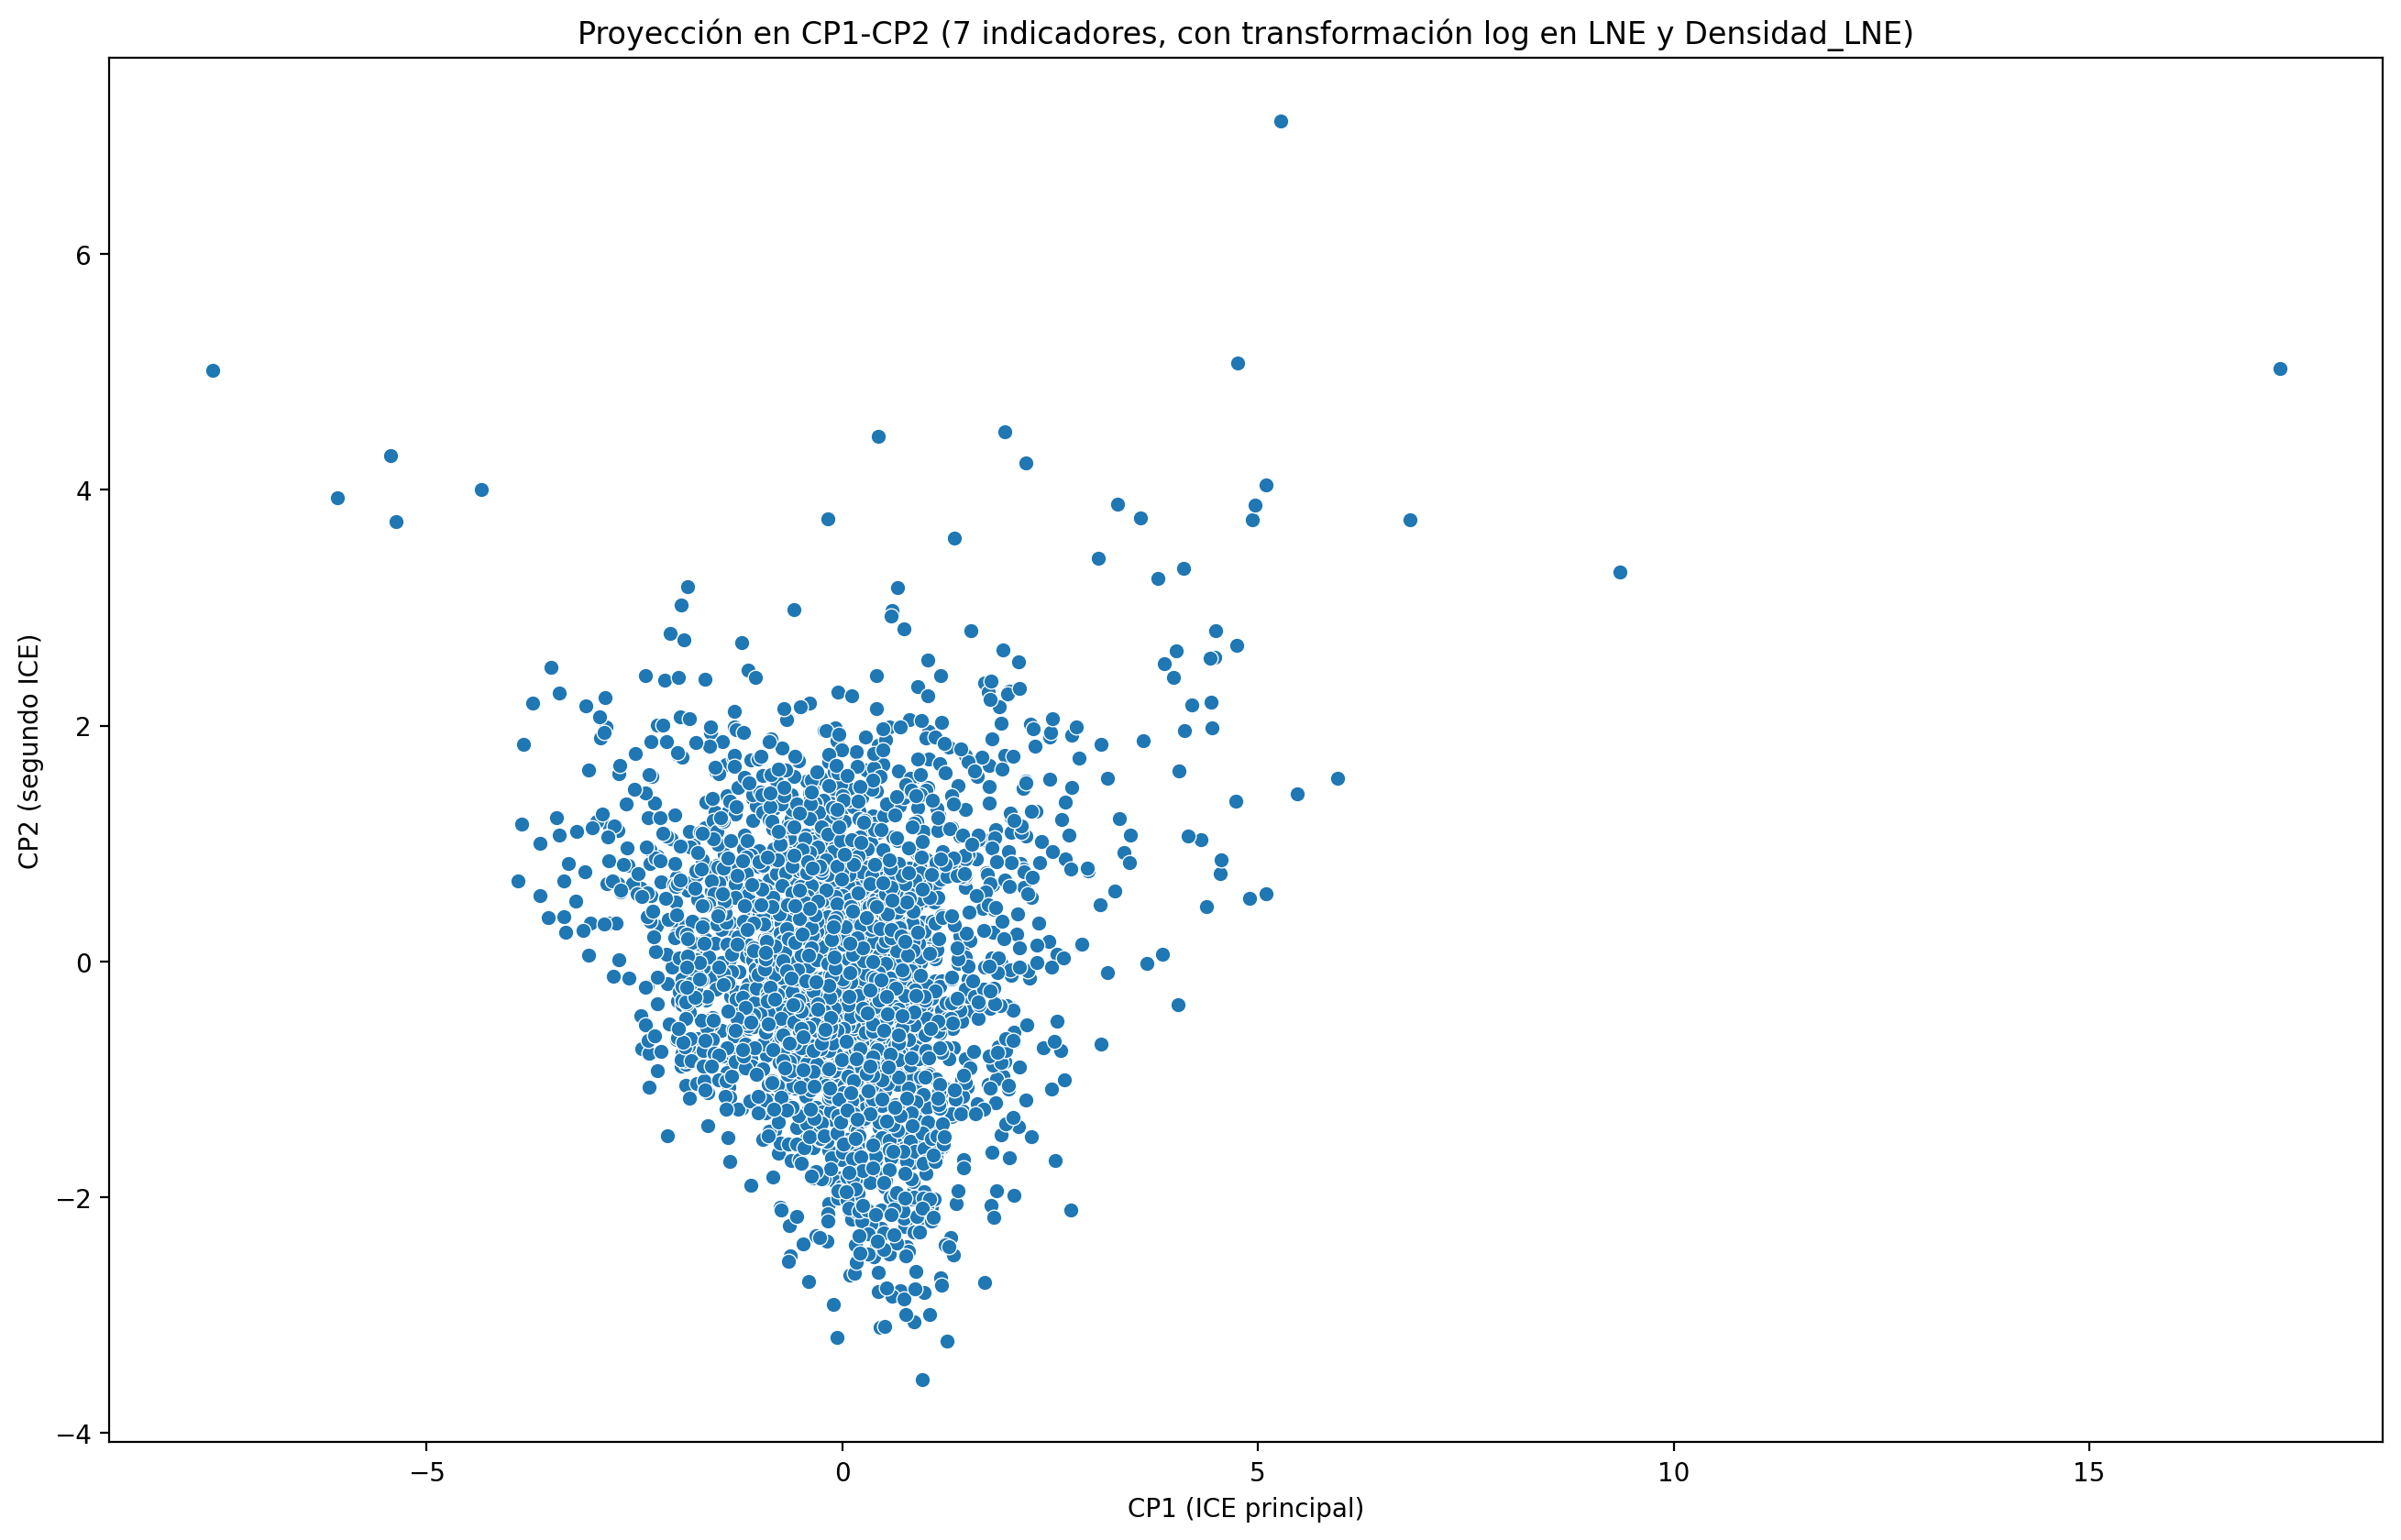

In [39]:
#Scatter plot (seaborn)  PC1 vs PC2
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python)

plt.figure(figsize=(16, 10), dpi= 200, facecolor='w', edgecolor='k')
sns.scatterplot(x="CP1", y="CP2", 
                data=df_pca_results_ind7_tf)
# Set x-axis label
plt.xlabel('CP1 (ICE principal)')
# Set y-axis label
plt.ylabel('CP2 (segundo ICE)')
plt.title('Proyección en CP1-CP2 (7 indicadores, con transformación log en LNE y Densidad_LNE)')

plt.savefig('Pyplot_PCA_projection_ind7_tf.png',dpi=600)

Gráfica en el espacio CP1, CP2, CP3

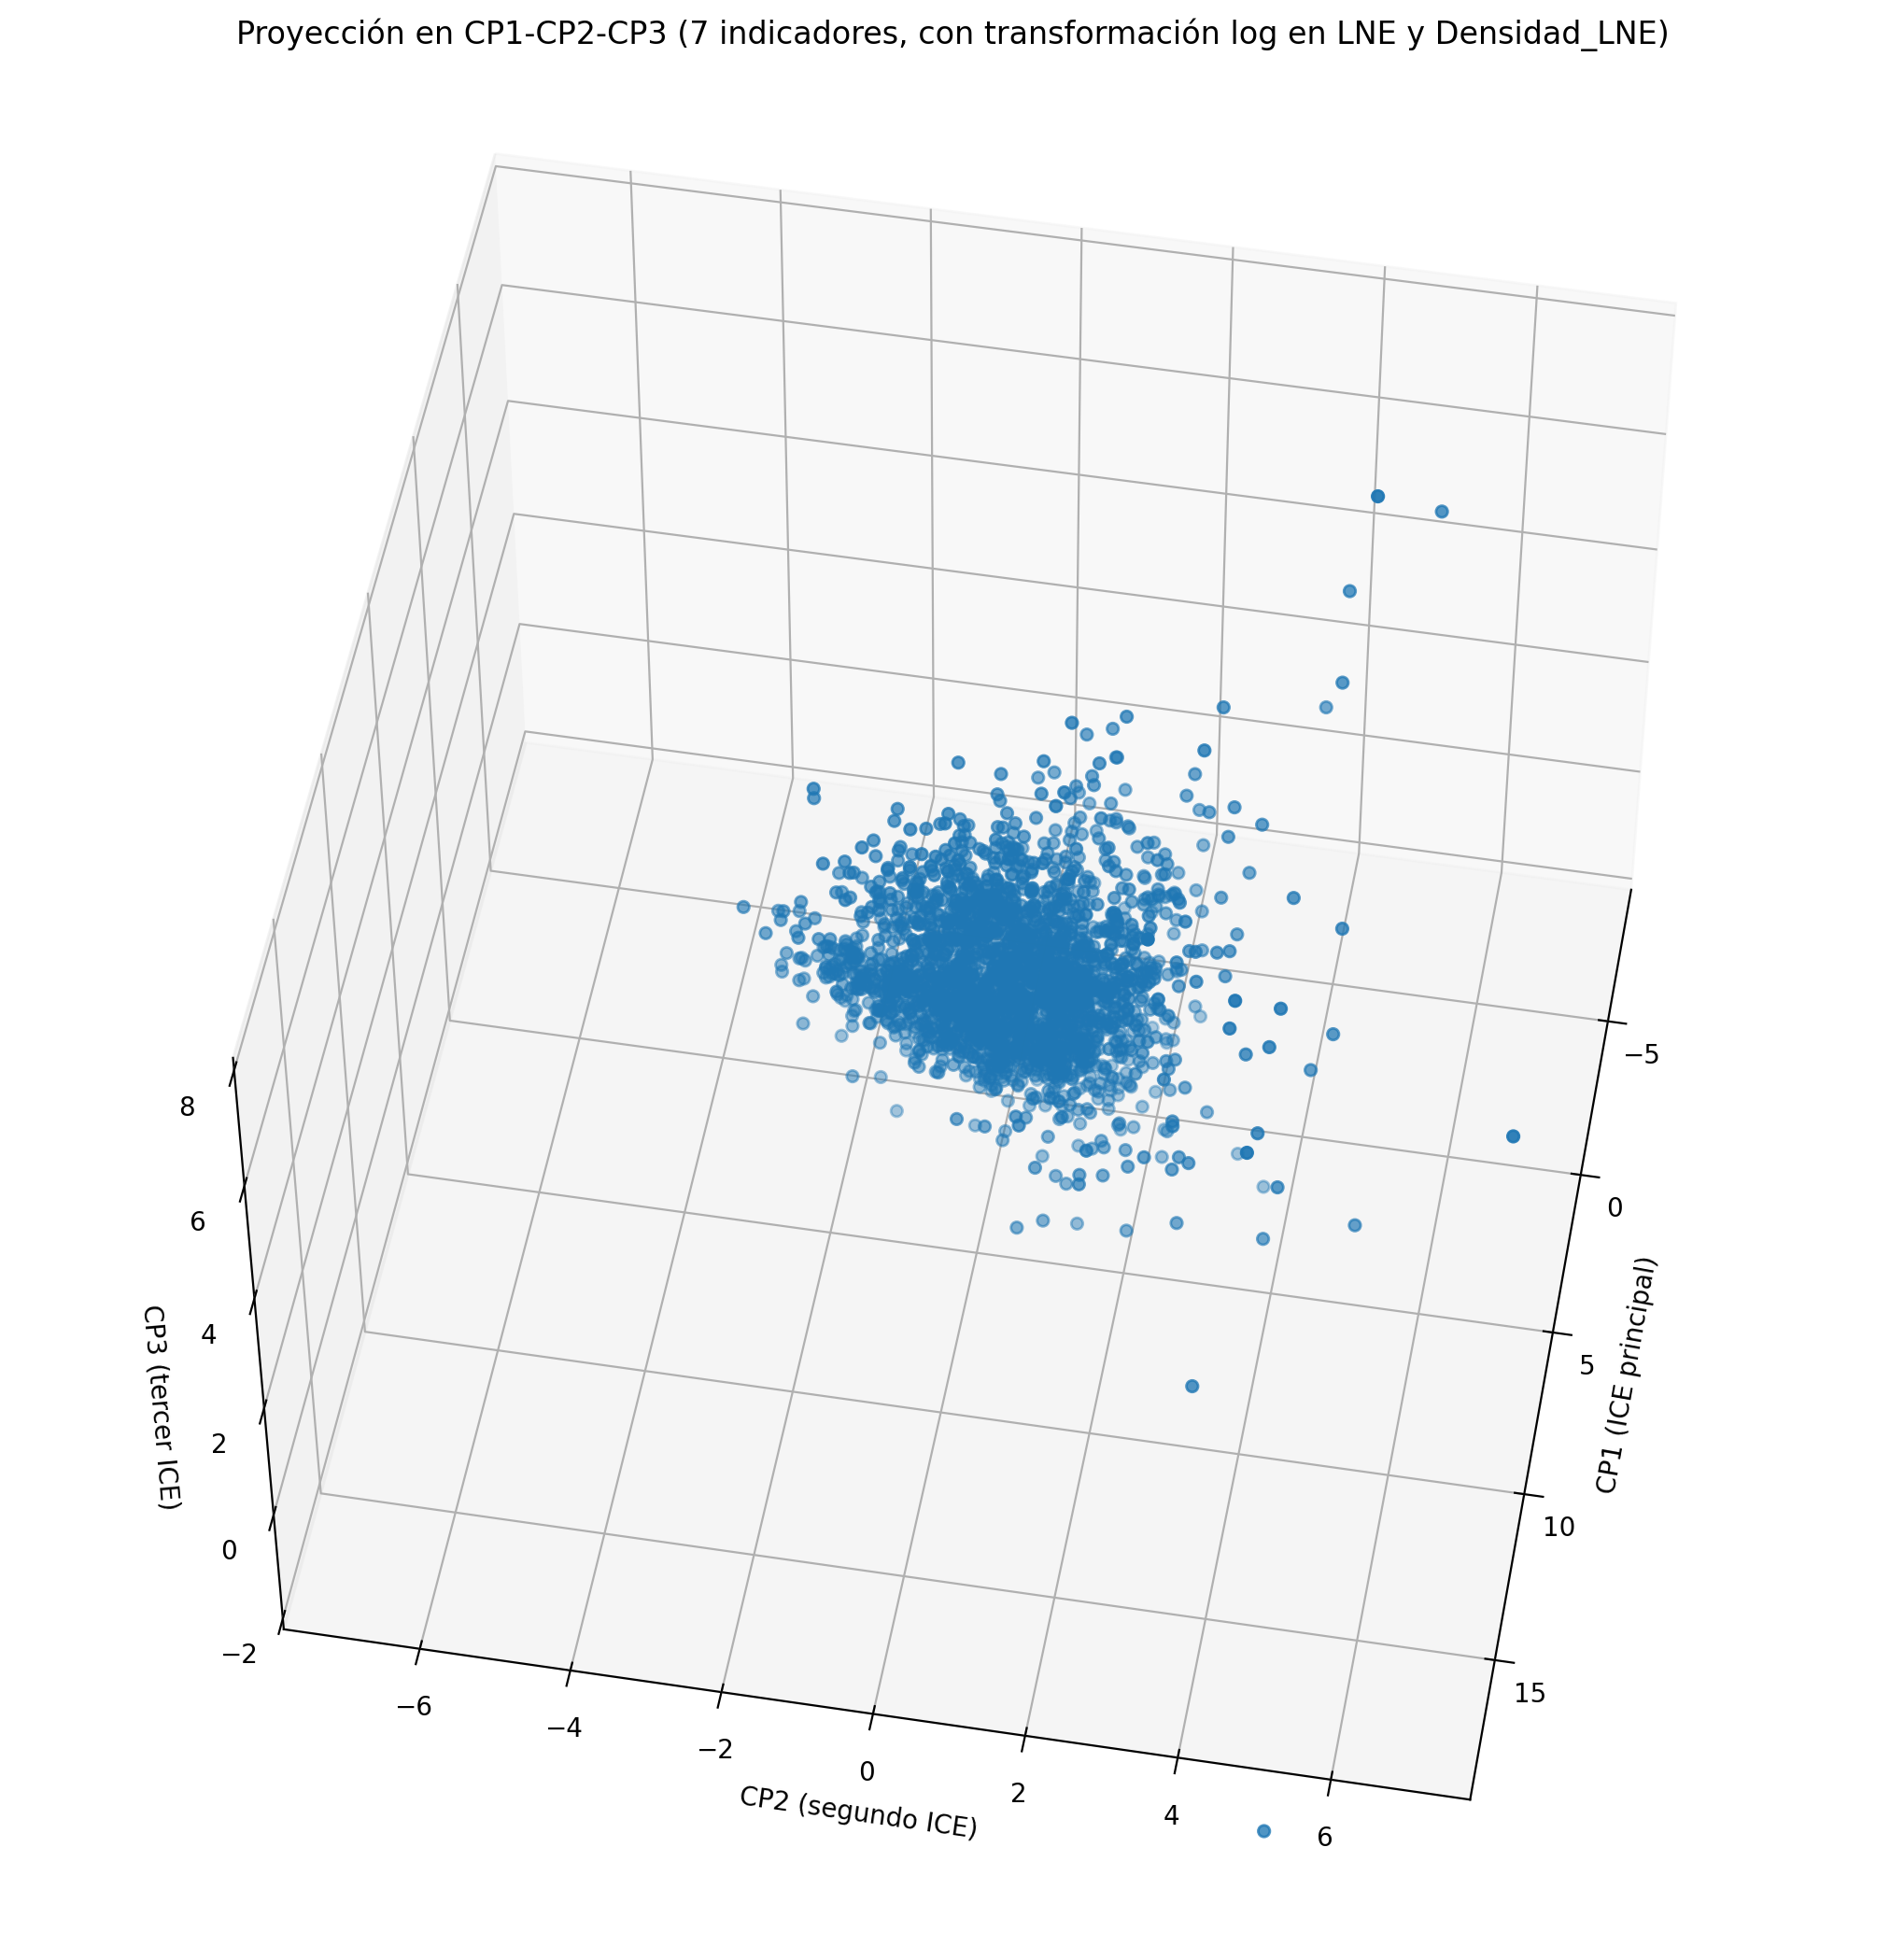

In [40]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

fig = pyplot.figure(figsize=(16, 10), dpi=200, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
ax.scatter(df_pca_results_ind7_tf['CP1'], df_pca_results_ind7_tf['CP2'], df_pca_results_ind7_tf['CP3'],s=20)
# ax.set_xlim3d(-10, 40)
ax.set_ylim3d(-7.5,7.5)
ax.set_zlim3d(-2,8)
ax.set_xlabel('CP1 (ICE principal)')
ax.set_ylabel('CP2 (segundo ICE)')
ax.set_zlabel('CP3 (tercer ICE)')
ax.view_init(elev, azim)
ax.set_title('Proyección en CP1-CP2-CP3 (7 indicadores, con transformación log en LNE y Densidad_LNE)')

plt.savefig('Pyplot_PCA_3dprojection_ind7_tf.png',dpi=600)
pyplot.show()

Gráfica 3d animada

In [41]:
# import plotly.express as px

# fig = px.scatter_3d(df_pca_results_ind7_tf, 
#                     x='CP1', 
#                     y='CP2', 
#                     z='CP3')
# fig.update_layout(scene = dict(
#                     xaxis_title='CP1 (ICE principal)',
#                     yaxis_title='CP2 (segundo ICE)',
#                     zaxis_title='CP3 (tercer ICE)'),
#                  legend_orientation="h")
# fig.show()

## PCA con 8 indicadores

In [42]:
from sklearn.decomposition import PCA

#calculo de PCA con 3 componentes, y obtención de los valores de CP para cada municipio
pca_8cp = PCA(n_components=8)
pca_ind8 = pca_8cp.fit_transform(x_2)

#razones de varianza explicada por cada CP 
print('Razón de varianza explicada por cada CP (n_components=8): %s'
      % str(pca_8cp.explained_variance_ratio_))

#dataframe con los valores de los CP por municipio
df_pca_ind8 = pd.DataFrame(data = pca_ind8
             , columns = ['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7', 'CP8'])
df_pca_ind8

Razón de varianza explicada por cada CP (n_components=8): [0.26527784 0.1917719  0.15409245 0.13305691 0.11143672 0.06389931
 0.0460018  0.03446307]


CP1       CP2       CP3       CP4       CP5       CP6       CP7  \
0    -0.306307  0.641296  1.305943  1.217484 -1.001390  0.142371 -0.900100   
1    -1.675593 -1.108986  0.189075  1.144486 -1.307539 -0.605453  0.310046   
2    -1.425317 -0.179880  0.901846  1.137386 -0.915867 -0.308916 -0.646283   
3    -1.285529 -0.498084  0.668174  1.404191 -1.059356 -0.322365 -0.278045   
4    -1.152818 -0.326636  0.429678  1.359363 -0.483811 -0.384586 -0.323647   
...        ...       ...       ...       ...       ...       ...       ...   
2451  0.193275 -0.288935 -0.891932  0.023231 -0.014780 -0.679602  0.024107   
2452  0.365229  0.214111 -2.244147  1.140430  0.239556 -0.222998 -0.583232   
2453  1.806057  0.390591 -1.330152  0.528377 -0.208540 -0.027851 -0.103375   
2454  0.764741  0.050060 -0.586152  0.282393 -0.341826 -0.647047 -0.103143   
2455  2.589595  0.199123 -0.470100 -2.203005  1.293152 -0.461935  0.378340   

           CP8  
0    -0.542311  
1    -0.091210  
2    -0.115038  
3     0.197121  
4     0.202303  
...        ...  
2451 -0.192633  
2452 -0.175970  
2453 -0.032406  
2454 -0.284921  
2455  0.413631  

[2456 rows x 8 columns]

In [43]:
#obtención de los pesos por cada variable
pca_pesos_ind8 = pca_8cp.components_
print(pca_pesos_ind8)

#transformación a un dataframe:
df_pca_pesos_ind8 = pd.DataFrame(pca_pesos_ind8, columns=ind8)
principal_components_pesos = pd.DataFrame(['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7', 'CP8'])
df_pca_pesos_ind8.insert(0, 'Componentes Principales', principal_components_pesos)

#se guarda el último dataframe en un csv
df_pca_pesos_ind8.to_csv(r'Resultados_Mun_PCA_pesos_ind8.csv', index = None)

df_pca_pesos_ind8=df_pca_pesos_ind8.set_index('Componentes Principales')
df_pca_pesos_ind8

[[-0.14440579 -0.20533281 -0.15157056 -0.47596612  0.40794226  0.36088903
   0.57610717  0.24271542]
 [ 0.07955961  0.65012685  0.61851028  0.03180189  0.3194134  -0.11866788
   0.23667921  0.12375372]
 [-0.6183416   0.06703125  0.39683755 -0.19523917 -0.42002763  0.45888247
  -0.12774451 -0.11936129]
 [ 0.40257414  0.19789376 -0.09312374  0.10041144 -0.36391798  0.45444498
  -0.075091    0.65986547]
 [ 0.52553132  0.25499169 -0.0718703  -0.48712455 -0.12677956  0.25258667
  -0.02301504 -0.57960127]
 [ 0.02512235  0.01103934 -0.06921065  0.69619842  0.1511279   0.51247691
   0.29518959 -0.37034515]
 [-0.38743794  0.65228019 -0.64645978 -0.01114778 -0.0179466  -0.07562108
   0.0180718  -0.00454565]
 [ 0.0385034  -0.03010502  0.02129833  0.04623064 -0.61924463 -0.32623999
   0.70861342 -0.05468875]]


NUM_SECC_RUR       LNE  Densidad_LNE  Razon_LNE_PE  \
Componentes Principales                                                       
CP1                         -0.144406 -0.205333     -0.151571     -0.475966   
CP2                          0.079560  0.650127      0.618510      0.031802   
CP3                         -0.618342  0.067031      0.396838     -0.195239   
CP4                          0.402574  0.197894     -0.093124      0.100411   
CP5                          0.525531  0.254992     -0.071870     -0.487125   
CP6                          0.025122  0.011039     -0.069211      0.696198   
CP7                         -0.387438  0.652280     -0.646460     -0.011148   
CP8                          0.038503 -0.030105      0.021298      0.046231   

                         TC_LNE_2019  Coef_Var_LNE  Var_Prop_LNE  Autocorr_LNE  
Componentes Principales                                                         
CP1                         0.407942      0.360889      0.576107      0.242715  
CP2                         0.319413     -0.118668      0.236679      0.123754  
CP3                        -0.420028      0.458882     -0.127745     -0.119361  
CP4                        -0.363918      0.454445     -0.075091      0.659865  
CP5                        -0.126780      0.252587     -0.023015     -0.579601  
CP6                         0.151128      0.512477      0.295190     -0.370345  
CP7                        -0.017947     -0.075621      0.018072     -0.004546  
CP8                        -0.619245     -0.326240      0.708613     -0.054689

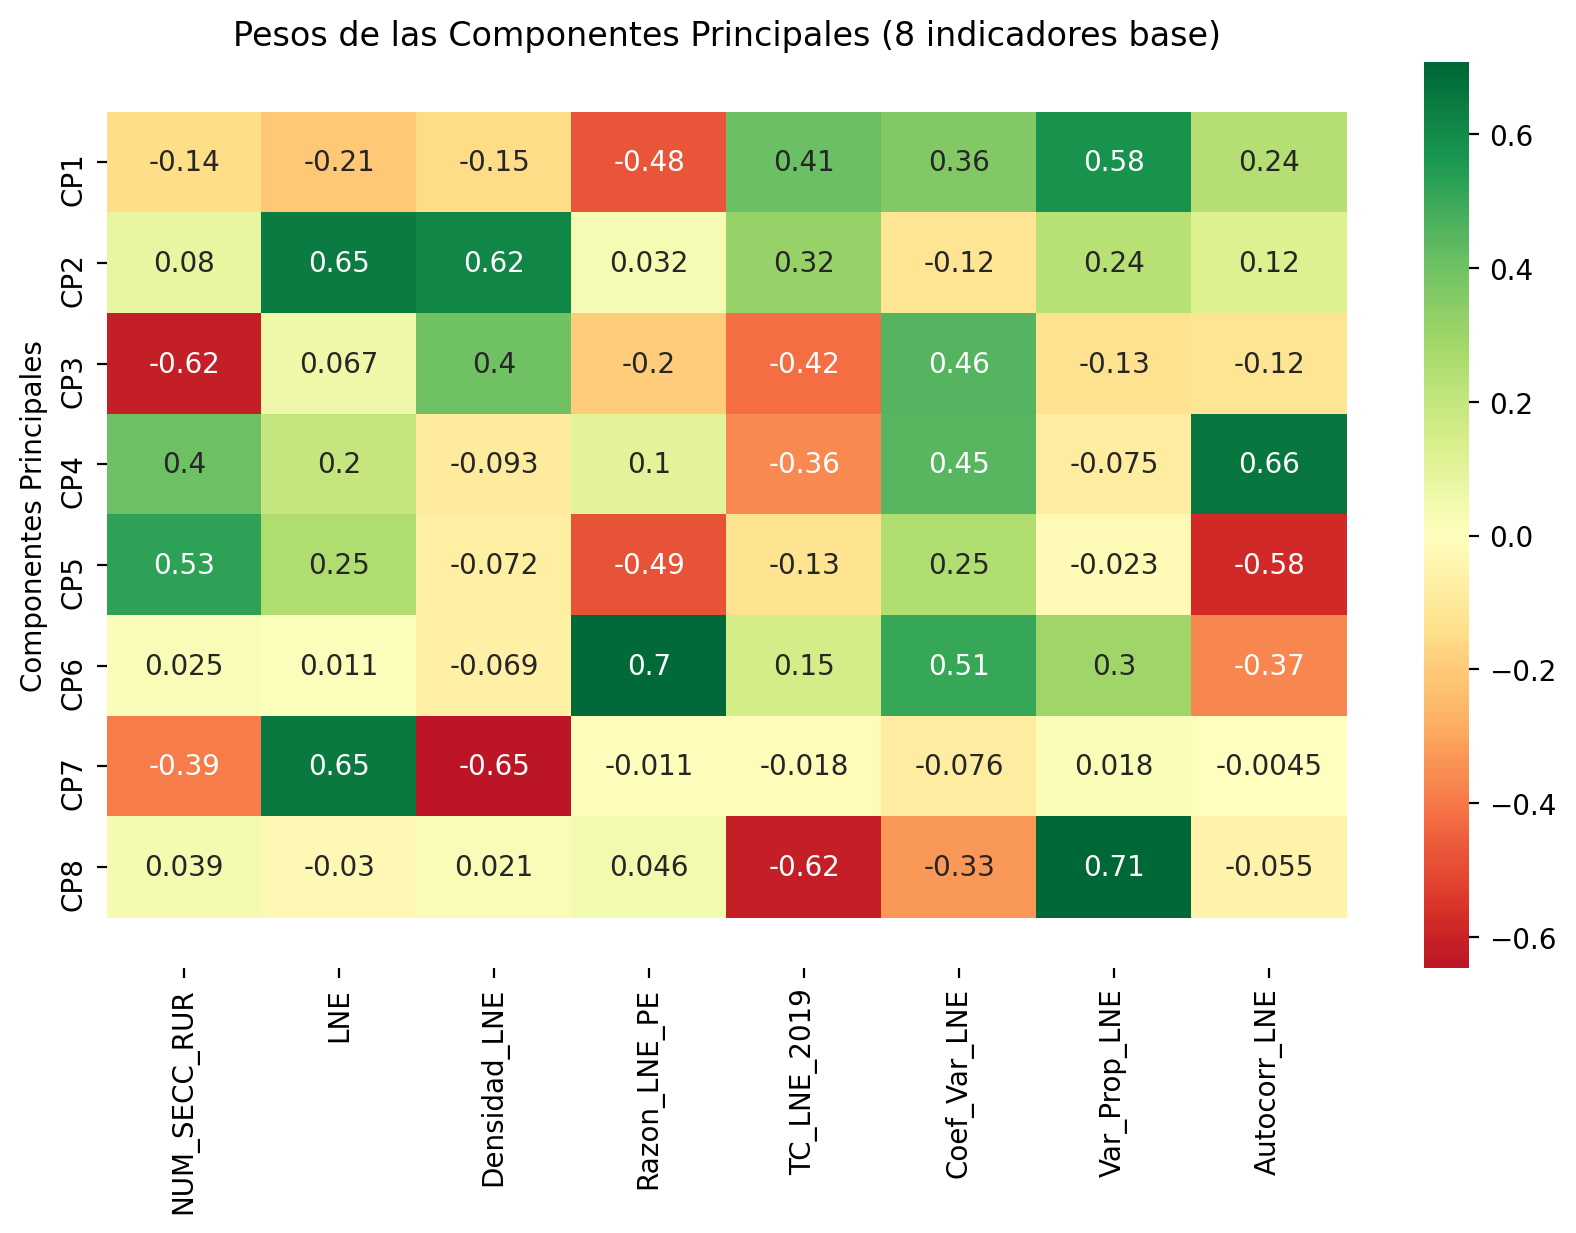

In [44]:
plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(df_pca_pesos_ind8, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Pesos de las Componentes Principales (8 indicadores base)')

plt.savefig('Pyplot_PCA_heatmap_ind8.png',dpi=600,bbox_inches="tight")
plt.show() 

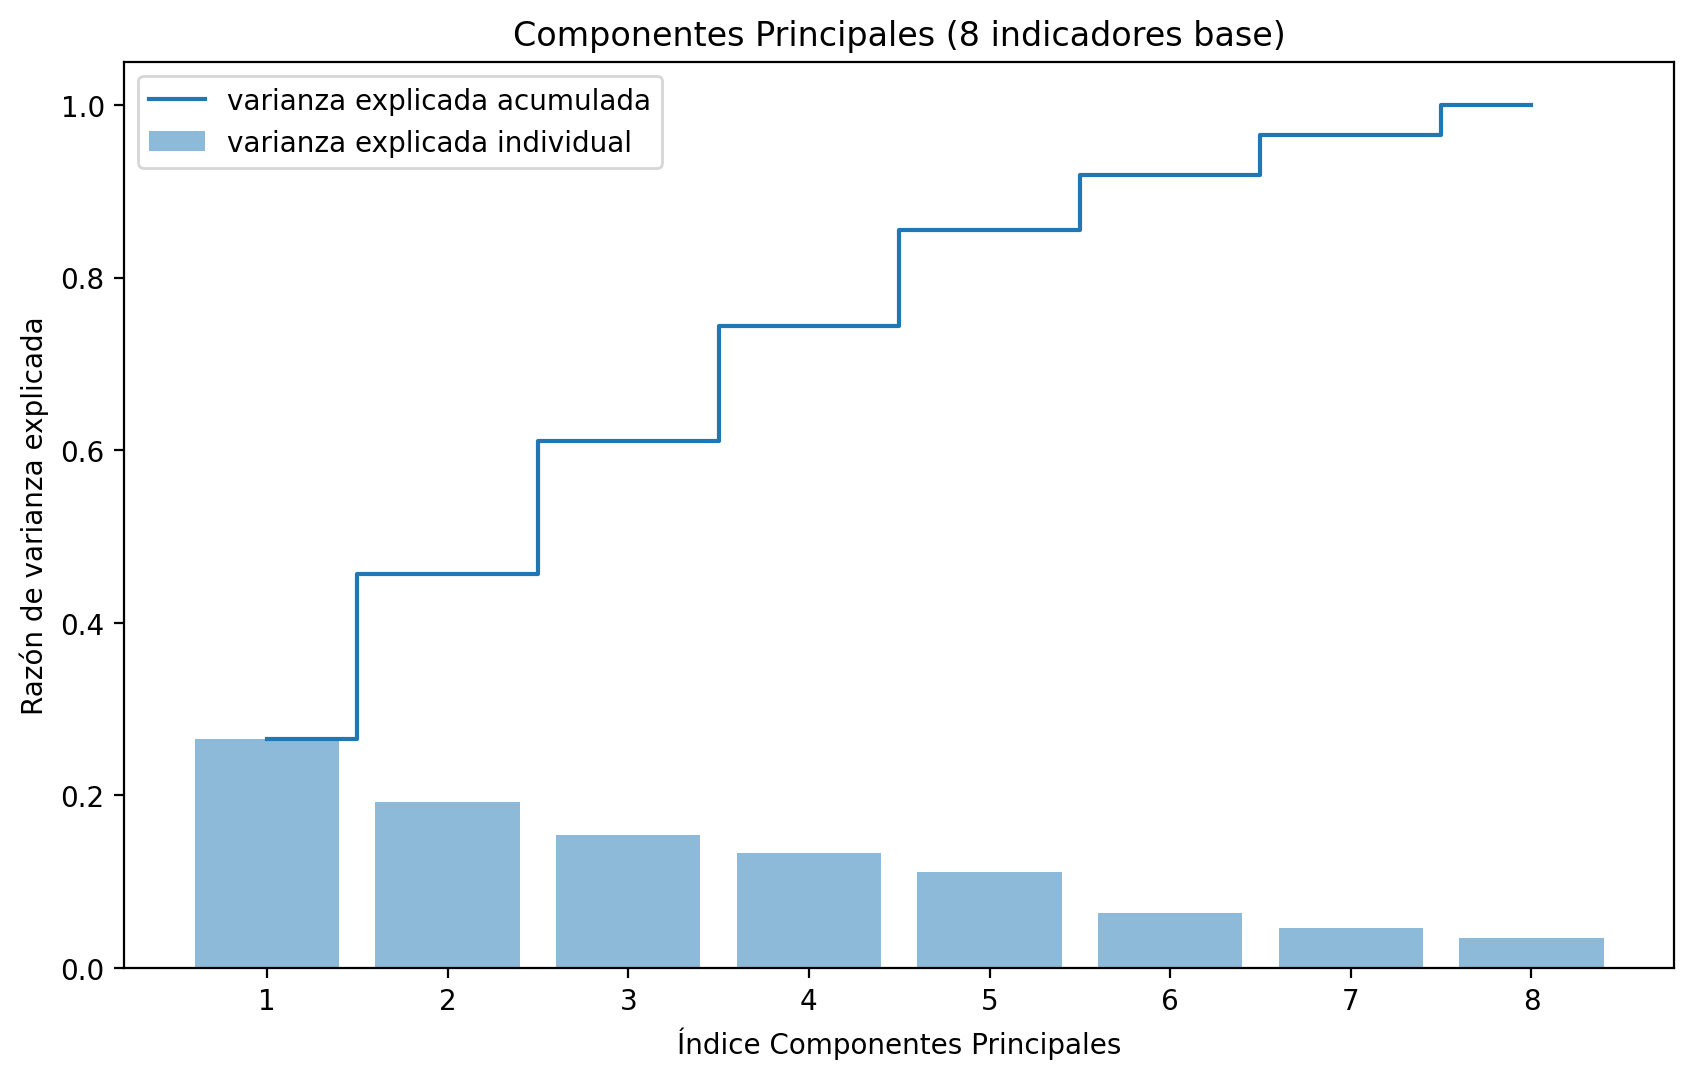

In [45]:

#calculo de la matriz de covarianza y sus correspondientes eigenvalores y eigenvectores
cov_mat = np.cov(x_2.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# calculate of individual and cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.figure(figsize=(10,6), dpi= 200)
plt.bar(range(1,9), var_exp, alpha=0.5,
        align='center', label='varianza explicada individual')
plt.step(range(1,9), cum_var_exp, where='mid',
         label='varianza explicada acumulada')
plt.ylabel('Razón de varianza explicada')
plt.xlabel('Índice Componentes Principales')
plt.legend(loc='best')
plt.title('Componentes Principales (8 indicadores base)')

plt.savefig('Pyplot_PCA_variance_ind8.png',dpi=600)
plt.show()

In [46]:
#concatenamos los resultados con los metadatos
df_pca_results_ind8 = pd.concat([metadatos[labels], df_pca_ind8], axis = 1)
df_pca_results_ind8.head()
#salvar resultados PCA
df_pca_results_ind8.to_csv(r'Resultados_Mun_PCA_ind8.csv', index = None)

### Proyección de los municipios en el espacio de Componentes Principales (8 indicadores)
Gráfica en el espacio CP1, CP2

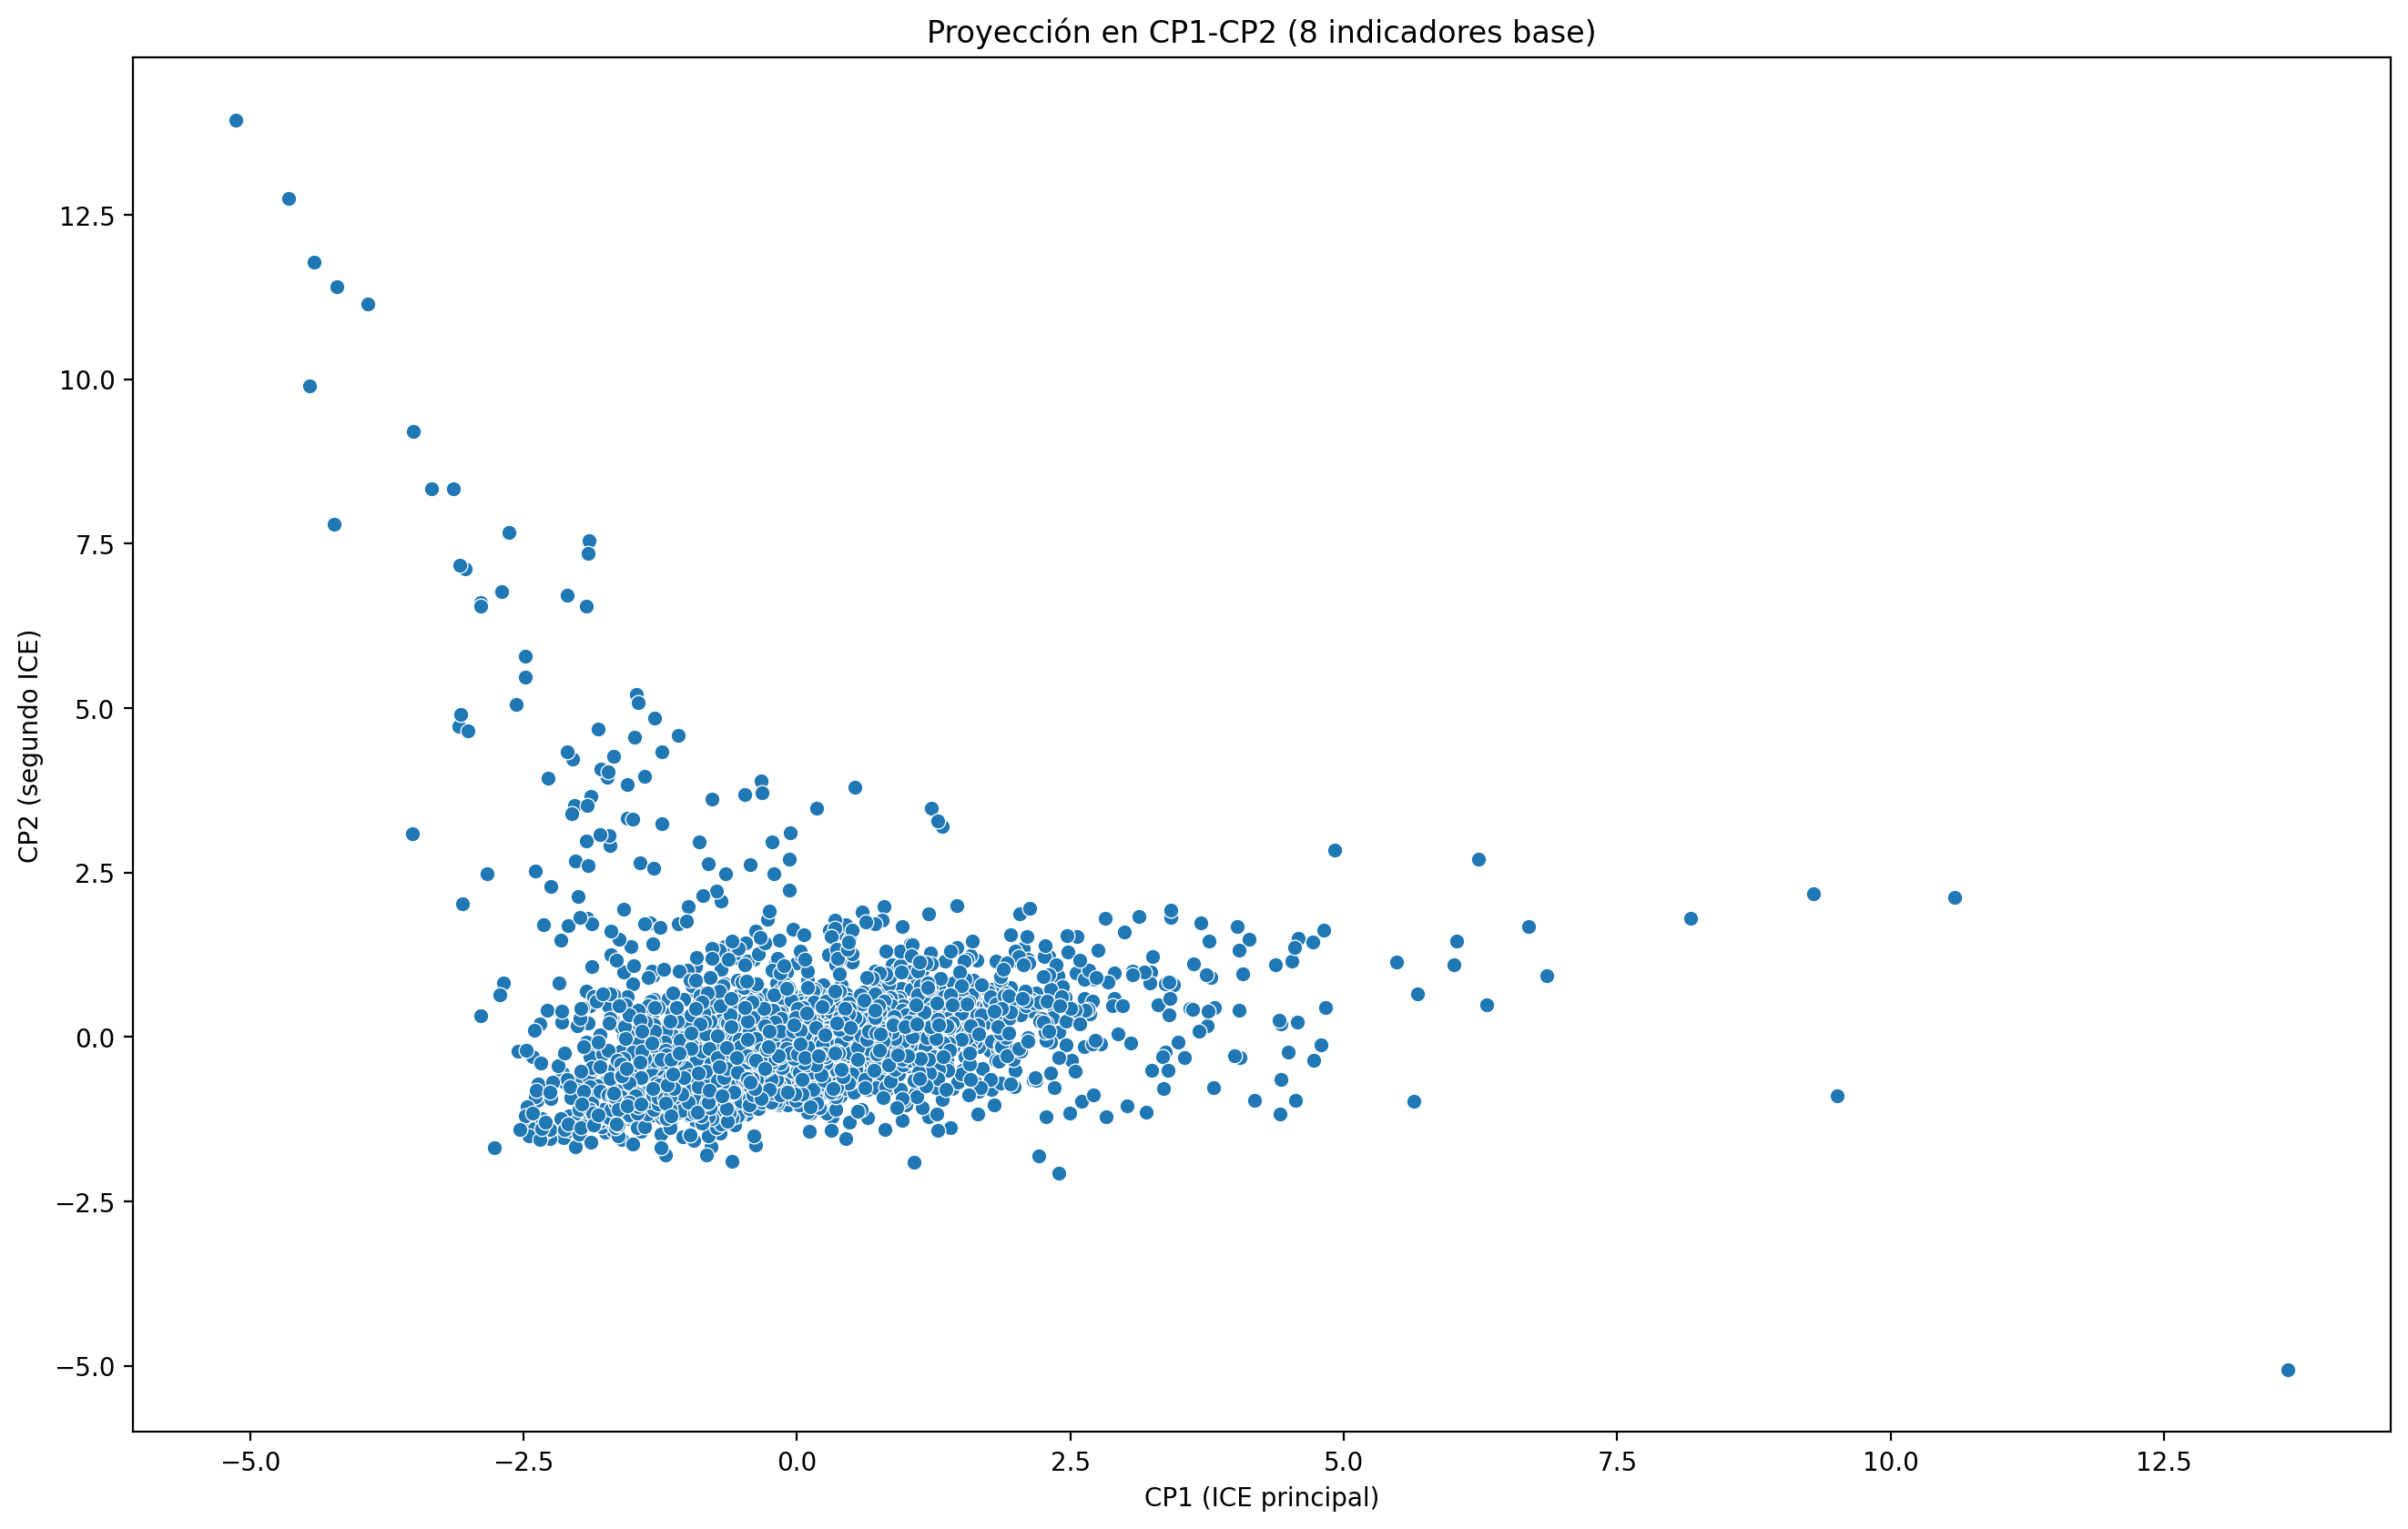

In [47]:
#Scatter plot (seaborn) PC1 vs PC2

plt.figure(figsize=(16, 10), dpi= 200, facecolor='w', edgecolor='k')
sns.scatterplot(x="CP1", y="CP2", 
                data=df_pca_results_ind8)
# Set x-axis label
plt.xlabel('CP1 (ICE principal)')
# Set y-axis label
plt.ylabel('CP2 (segundo ICE)')
plt.title('Proyección en CP1-CP2 (8 indicadores base)')

plt.savefig('Pyplot_PCA_projection_ind8.png',dpi=600)

Gráfica en el espacio CP1, CP2, CP3

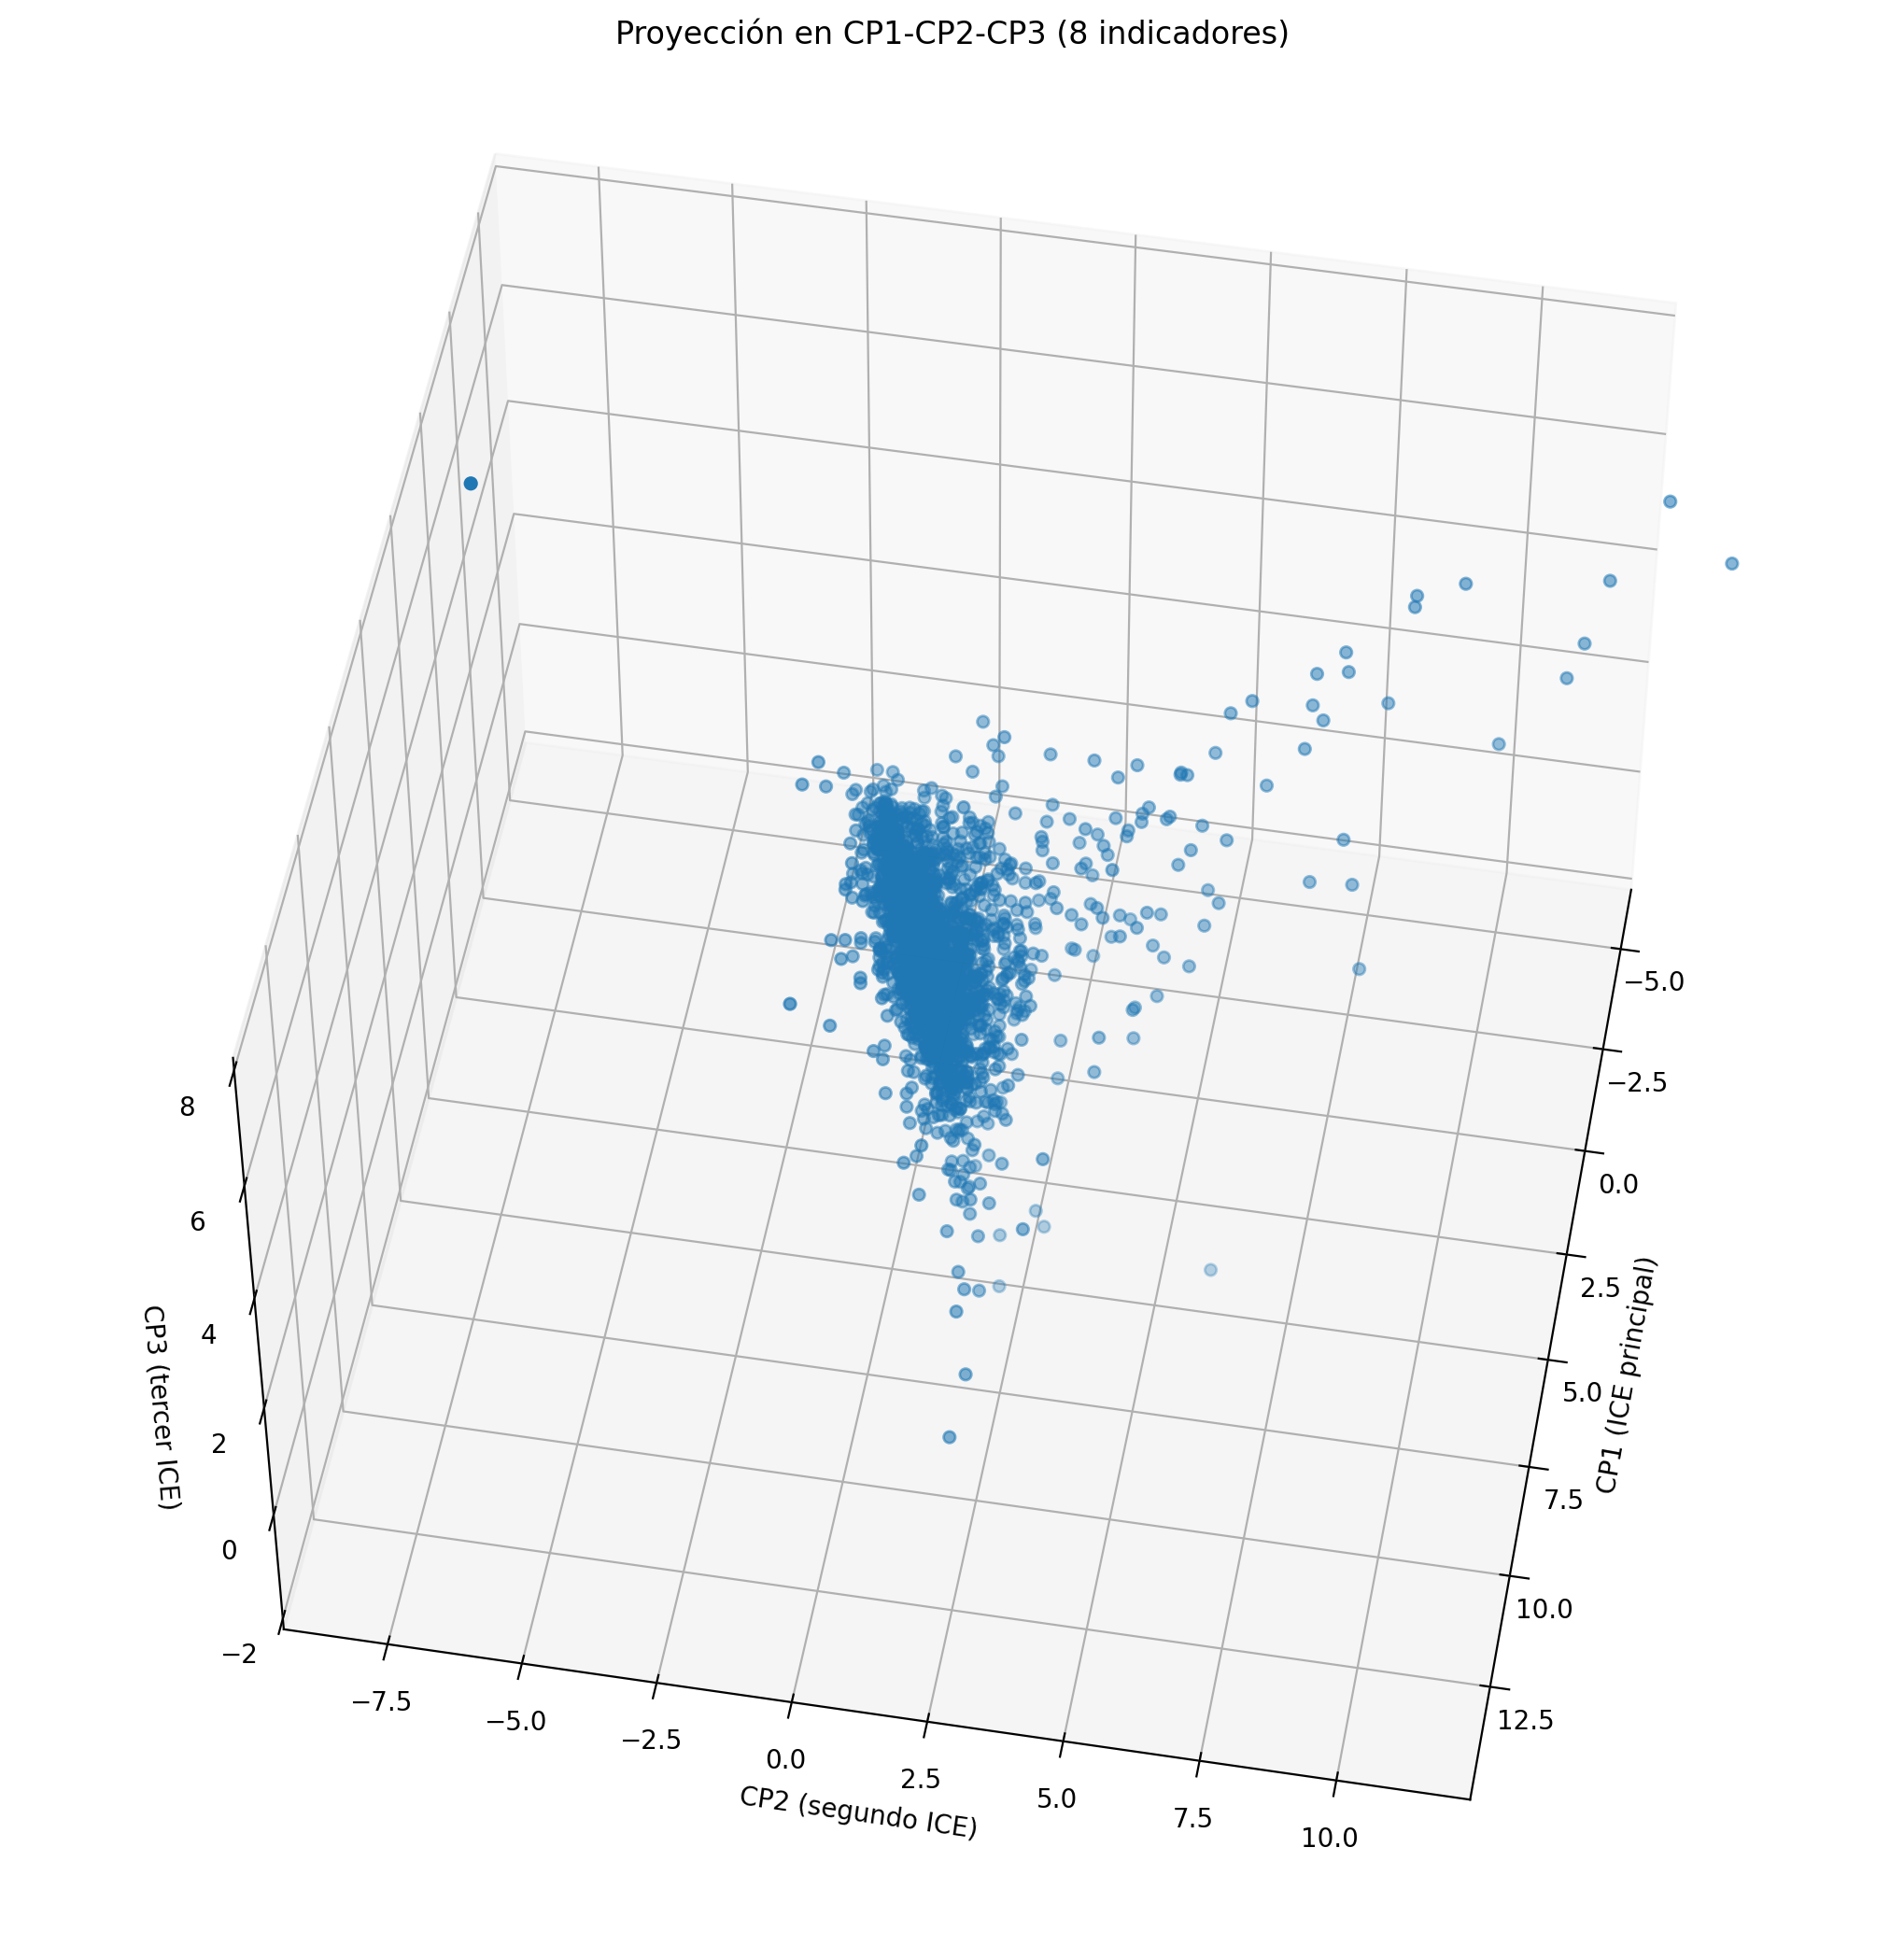

In [48]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

fig = pyplot.figure(figsize=(16, 10), dpi=200, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
ax.scatter(df_pca_results_ind8['CP1'], df_pca_results_ind8['CP2'], df_pca_results_ind8['CP3'],s=20)
# ax.set_xlim3d(-10, 40)
ax.set_ylim3d(-9,12)
ax.set_zlim3d(-2,8)
ax.set_xlabel('CP1 (ICE principal)')
ax.set_ylabel('CP2 (segundo ICE)')
ax.set_zlabel('CP3 (tercer ICE)')
ax.view_init(elev, azim)
ax.set_title('Proyección en CP1-CP2-CP3 (8 indicadores)')

plt.savefig('Pyplot_PCA_3dprojection_ind8.png',dpi=600)
pyplot.show()

Gráfica 3d animada

In [49]:
# import plotly.express as px

# fig = px.scatter_3d(df_pca_results_ind8, 
#                     x='CP1', 
#                     y='CP2', 
#                     z='CP3')
# fig.update_layout(scene = dict(
#                     xaxis_title='CP1 (ICE principal)',
#                     yaxis_title='CP2 (segundo ICE)',
#                     zaxis_title='CP3 (tercer ICE)'),
#                  legend_orientation="h")
# fig.show()

## PCA con 8 indicadores (transformación log en LNE y Densidad)

In [50]:
from sklearn.decomposition import PCA

#calculo de PCA con 8 componentes, y obtención de los valores de CP para cada municipio
pca_8cp_tf = PCA(n_components=8)
pca_ind8_tf = pca_8cp_tf.fit_transform(x_3)

#razones de varianza explicada por cada CP 
print('Razón de varianza explicada por cada CP (n_components=8): %s'
      % str(pca_8cp_tf.explained_variance_ratio_))

#dataframe con los valores de los CP por municipio
df_pca_ind8_tf = pd.DataFrame(data = pca_ind8_tf
             , columns = ['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7', 'CP8'])
df_pca_ind8_tf

Razón de varianza explicada por cada CP (n_components=8): [0.26822543 0.21052922 0.15096734 0.13561438 0.09568469 0.06276904
 0.04179822 0.03441167]


CP1       CP2       CP3       CP4       CP5       CP6       CP7  \
0    -0.415637 -0.349339 -1.761185  1.510055  0.068388  0.074817 -0.221071   
1    -1.627330  0.936335  0.193189  1.243897 -1.652675 -0.425370 -0.246902   
2    -1.475880  0.362061 -1.359785  1.336039 -0.186298 -0.340579  0.219717   
3    -1.409122  0.322207 -1.234453  1.547342 -0.466726 -0.349150  0.169135   
4    -1.413514 -0.163941 -0.923652  1.490953  0.095513 -0.466125  0.017019   
...        ...       ...       ...       ...       ...       ...       ...   
2451  0.116775 -0.271909  1.142092 -0.114641 -0.669162 -0.528063  0.119502   
2452 -0.058226 -1.839626  2.069752  0.665370 -0.738060  0.047949  0.636243   
2453  1.473538 -1.583709  0.860440  0.234834 -0.641853  0.104172  0.187990   
2454  0.561460 -0.674227 -0.271547  0.111785 -0.282840 -0.638525  0.513595   
2455  2.817084  0.045105  1.738236 -2.167727  0.440161 -0.415213 -0.426841   

           CP8  
0    -0.601798  
1    -0.046434  
2    -0.167702  
3     0.165213  
4     0.162591  
...        ...  
2451 -0.171248  
2452 -0.169023  
2453 -0.017411  
2454 -0.309112  
2455  0.455542  

[2456 rows x 8 columns]

In [51]:
#obtención de los pesos por cada variable
pca_pesos_ind8_tf = pca_8cp_tf.components_
print(pca_pesos_ind8_tf)

#transformación a un dataframe:
df_pca_pesos_ind8_tf = pd.DataFrame(pca_pesos_ind8_tf, columns=ind8_tf)
principal_components_pesos = pd.DataFrame(['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7', 'CP8'])
df_pca_pesos_ind8_tf.insert(0, 'Componentes Principales', principal_components_pesos)

#se guarda el último dataframe en un csv
df_pca_pesos_ind8_tf.to_csv(r'Resultados_Mun_PCA_pesos_ind8_tf.csv', index = None)

df_pca_pesos_ind8_tf=df_pca_pesos_ind8_tf.set_index('Componentes Principales')
df_pca_pesos_ind8_tf

[[-2.35547688e-01 -2.78049672e-01 -9.23588896e-02 -5.05644797e-01
   3.50371007e-01  3.95751932e-01  5.40200833e-01  1.78332464e-01]
 [-4.26498152e-01 -5.91128057e-01 -1.19406516e-01 -8.12768325e-02
  -4.49278591e-01  1.83936829e-01 -3.21070758e-01 -3.30200949e-01]
 [ 5.15858754e-01 -8.06497668e-02 -7.97716472e-01 -2.06537725e-01
   2.61799363e-02 -6.18196258e-02 -5.09113891e-02 -2.03167257e-01]
 [ 2.34740827e-01  1.33987069e-01 -6.62182930e-02  1.41068083e-02
  -4.87404746e-01  5.75267134e-01 -1.24162935e-01  5.81763052e-01]
 [ 3.23825900e-01  2.79250813e-01  4.02388273e-01 -3.93661992e-01
  -1.47983663e-01  3.44831755e-01  2.63430987e-02 -5.98972137e-01]
 [ 6.06116670e-02 -8.16517151e-02 -1.12509674e-01  7.30541869e-01
   1.72016171e-01  4.85553424e-01  2.84511565e-01 -3.11465654e-01]
 [ 5.76751985e-01 -6.81286283e-01  4.01138011e-01  5.51785018e-02
   6.68245858e-02 -1.17389043e-01  1.61605608e-02  1.44023958e-01]
 [ 1.49419870e-02 -2.48378720e-04 -3.14489069e-02  5.61669776e-02
  -

NUM_SECC_RUR  log(LNE)  log(Densidad_LNE)  \
Componentes Principales                                              
CP1                         -0.235548 -0.278050          -0.092359   
CP2                         -0.426498 -0.591128          -0.119407   
CP3                          0.515859 -0.080650          -0.797716   
CP4                          0.234741  0.133987          -0.066218   
CP5                          0.323826  0.279251           0.402388   
CP6                          0.060612 -0.081652          -0.112510   
CP7                          0.576752 -0.681286           0.401138   
CP8                          0.014942 -0.000248          -0.031449   

                         Razon_LNE_PE  TC_LNE_2019  Coef_Var_LNE  \
Componentes Principales                                            
CP1                         -0.505645     0.350371      0.395752   
CP2                         -0.081277    -0.449279      0.183937   
CP3                         -0.206538     0.026180     -0.061820   
CP4                          0.014107    -0.487405      0.575267   
CP5                         -0.393662    -0.147984      0.344832   
CP6                          0.730542     0.172016      0.485553   
CP7                          0.055179     0.066825     -0.117389   
CP8                          0.056167    -0.617403     -0.326102   

                         Var_Prop_LNE  Autocorr_LNE  
Componentes Principales                              
CP1                          0.540201      0.178332  
CP2                         -0.321071     -0.330201  
CP3                         -0.050911     -0.203167  
CP4                         -0.124163      0.581763  
CP5                          0.026343     -0.598972  
CP6                          0.284512     -0.311466  
CP7                          0.016161      0.144024  
CP8                          0.710765     -0.054021

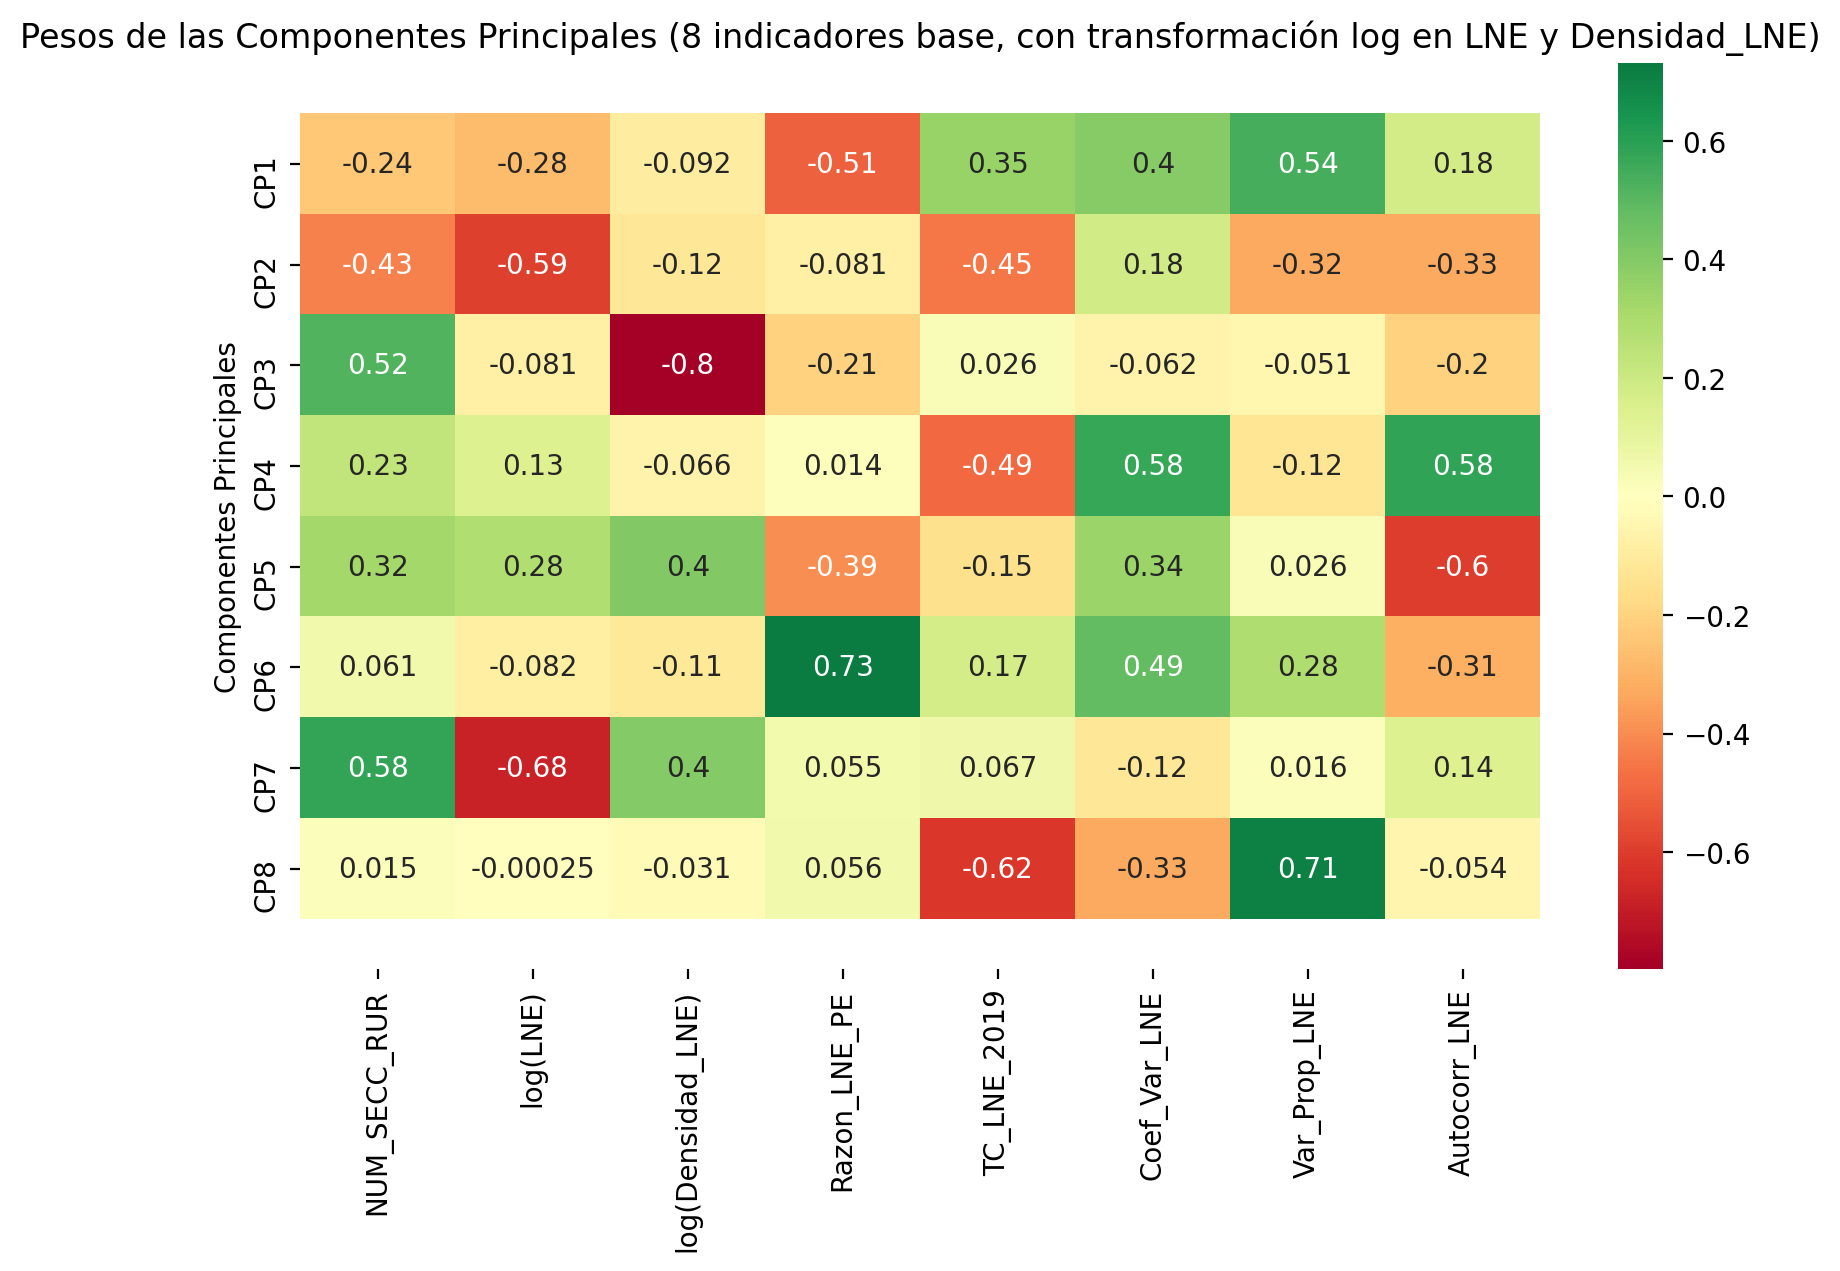

In [52]:
plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(df_pca_pesos_ind8_tf, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Pesos de las Componentes Principales (8 indicadores base, con transformación log en LNE y Densidad_LNE)')

plt.savefig('Pyplot_PCA_heatmap_ind8_tf.png',dpi=600,bbox_inches="tight")
plt.show() 

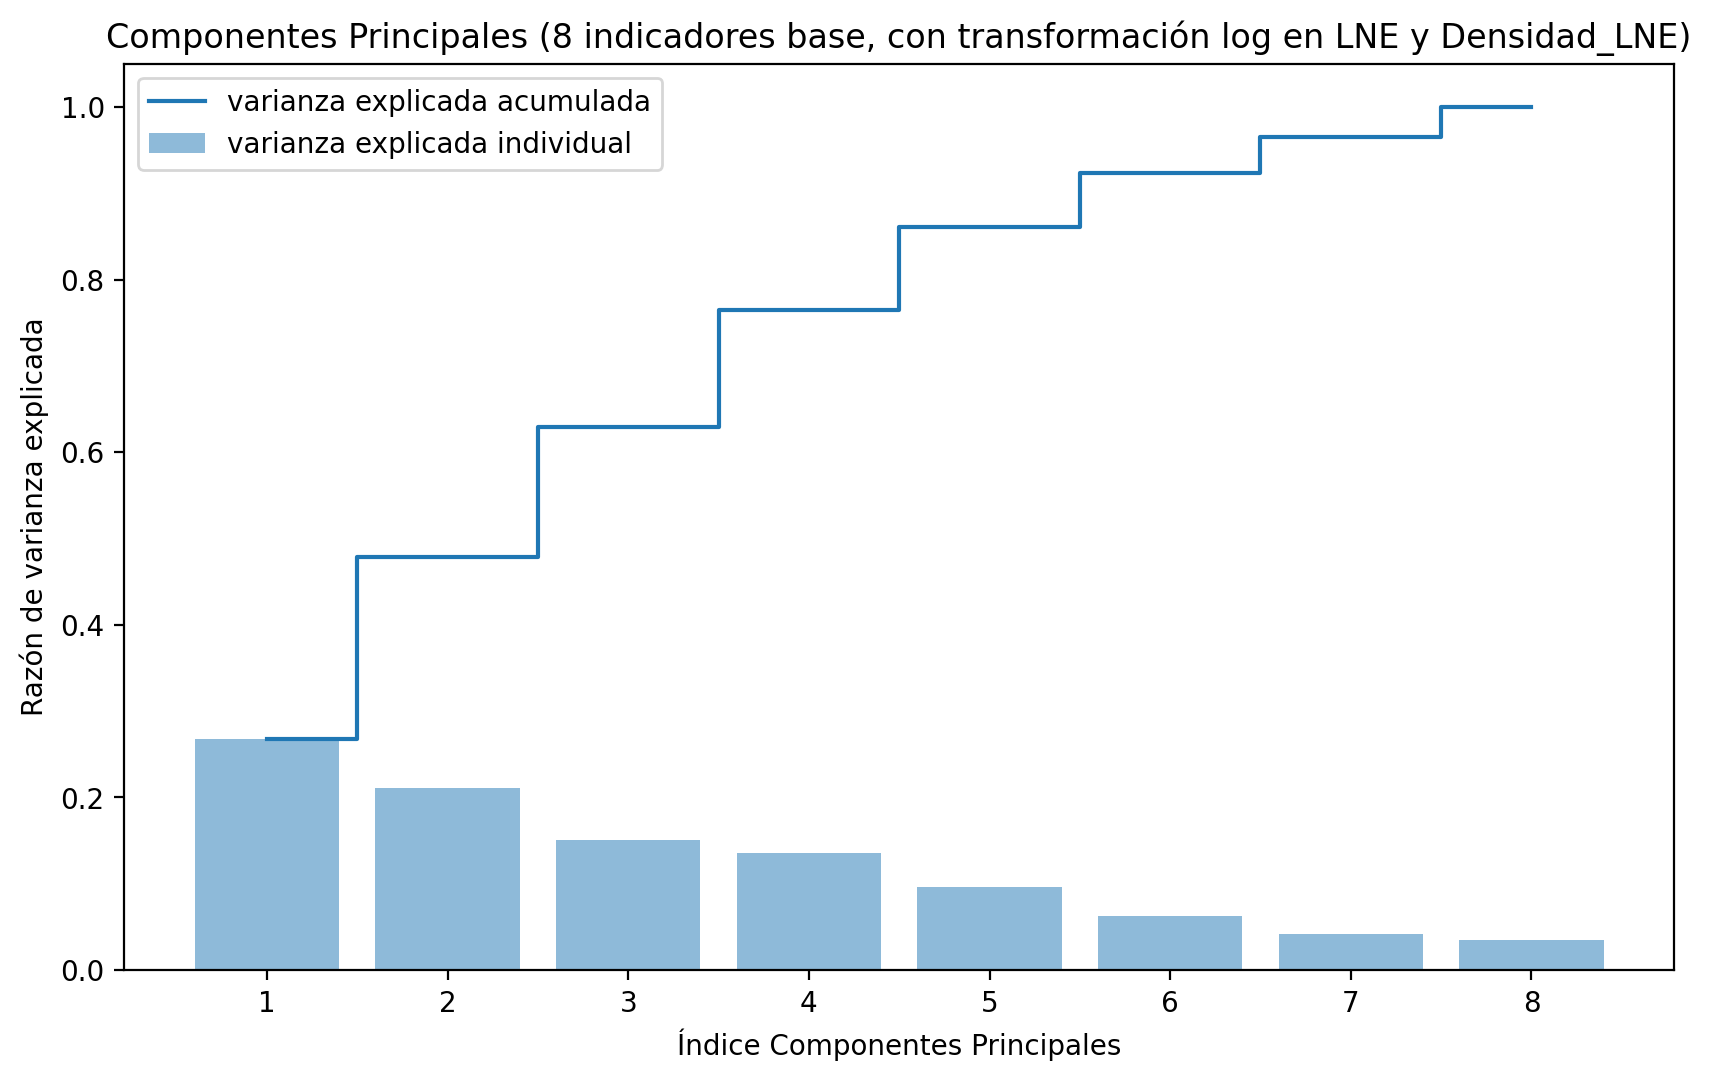

In [53]:

#calculo de la matriz de covarianza y sus correspondientes eigenvalores y eigenvectores
cov_mat = np.cov(x_3.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# calculate of individual and cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.figure(figsize=(10,6), dpi= 200)
plt.bar(range(1,9), var_exp, alpha=0.5,
        align='center', label='varianza explicada individual')
plt.step(range(1,9), cum_var_exp, where='mid',
         label='varianza explicada acumulada')
plt.ylabel('Razón de varianza explicada')
plt.xlabel('Índice Componentes Principales')
plt.legend(loc='best')
plt.title('Componentes Principales (8 indicadores base, con transformación log en LNE y Densidad_LNE)')

plt.savefig('Pyplot_PCA_variance_ind8_tf.png',dpi=600)
plt.show()

In [54]:
#concatenamos los resultados con los metadatos
df_pca_results_ind8_tf = pd.concat([metadatos[labels], df_pca_ind8_tf], axis = 1)
df_pca_results_ind8_tf.head()
#salvar resultados PCA
df_pca_results_ind8_tf.to_csv(r'Resultados_Mun_PCA_ind8_tf.csv', index = None)

### Proyección de los municipios en el espacio de Componentes Principales (8 indicadores con transformación log)
Gráfica en el espacio CP1, CP2

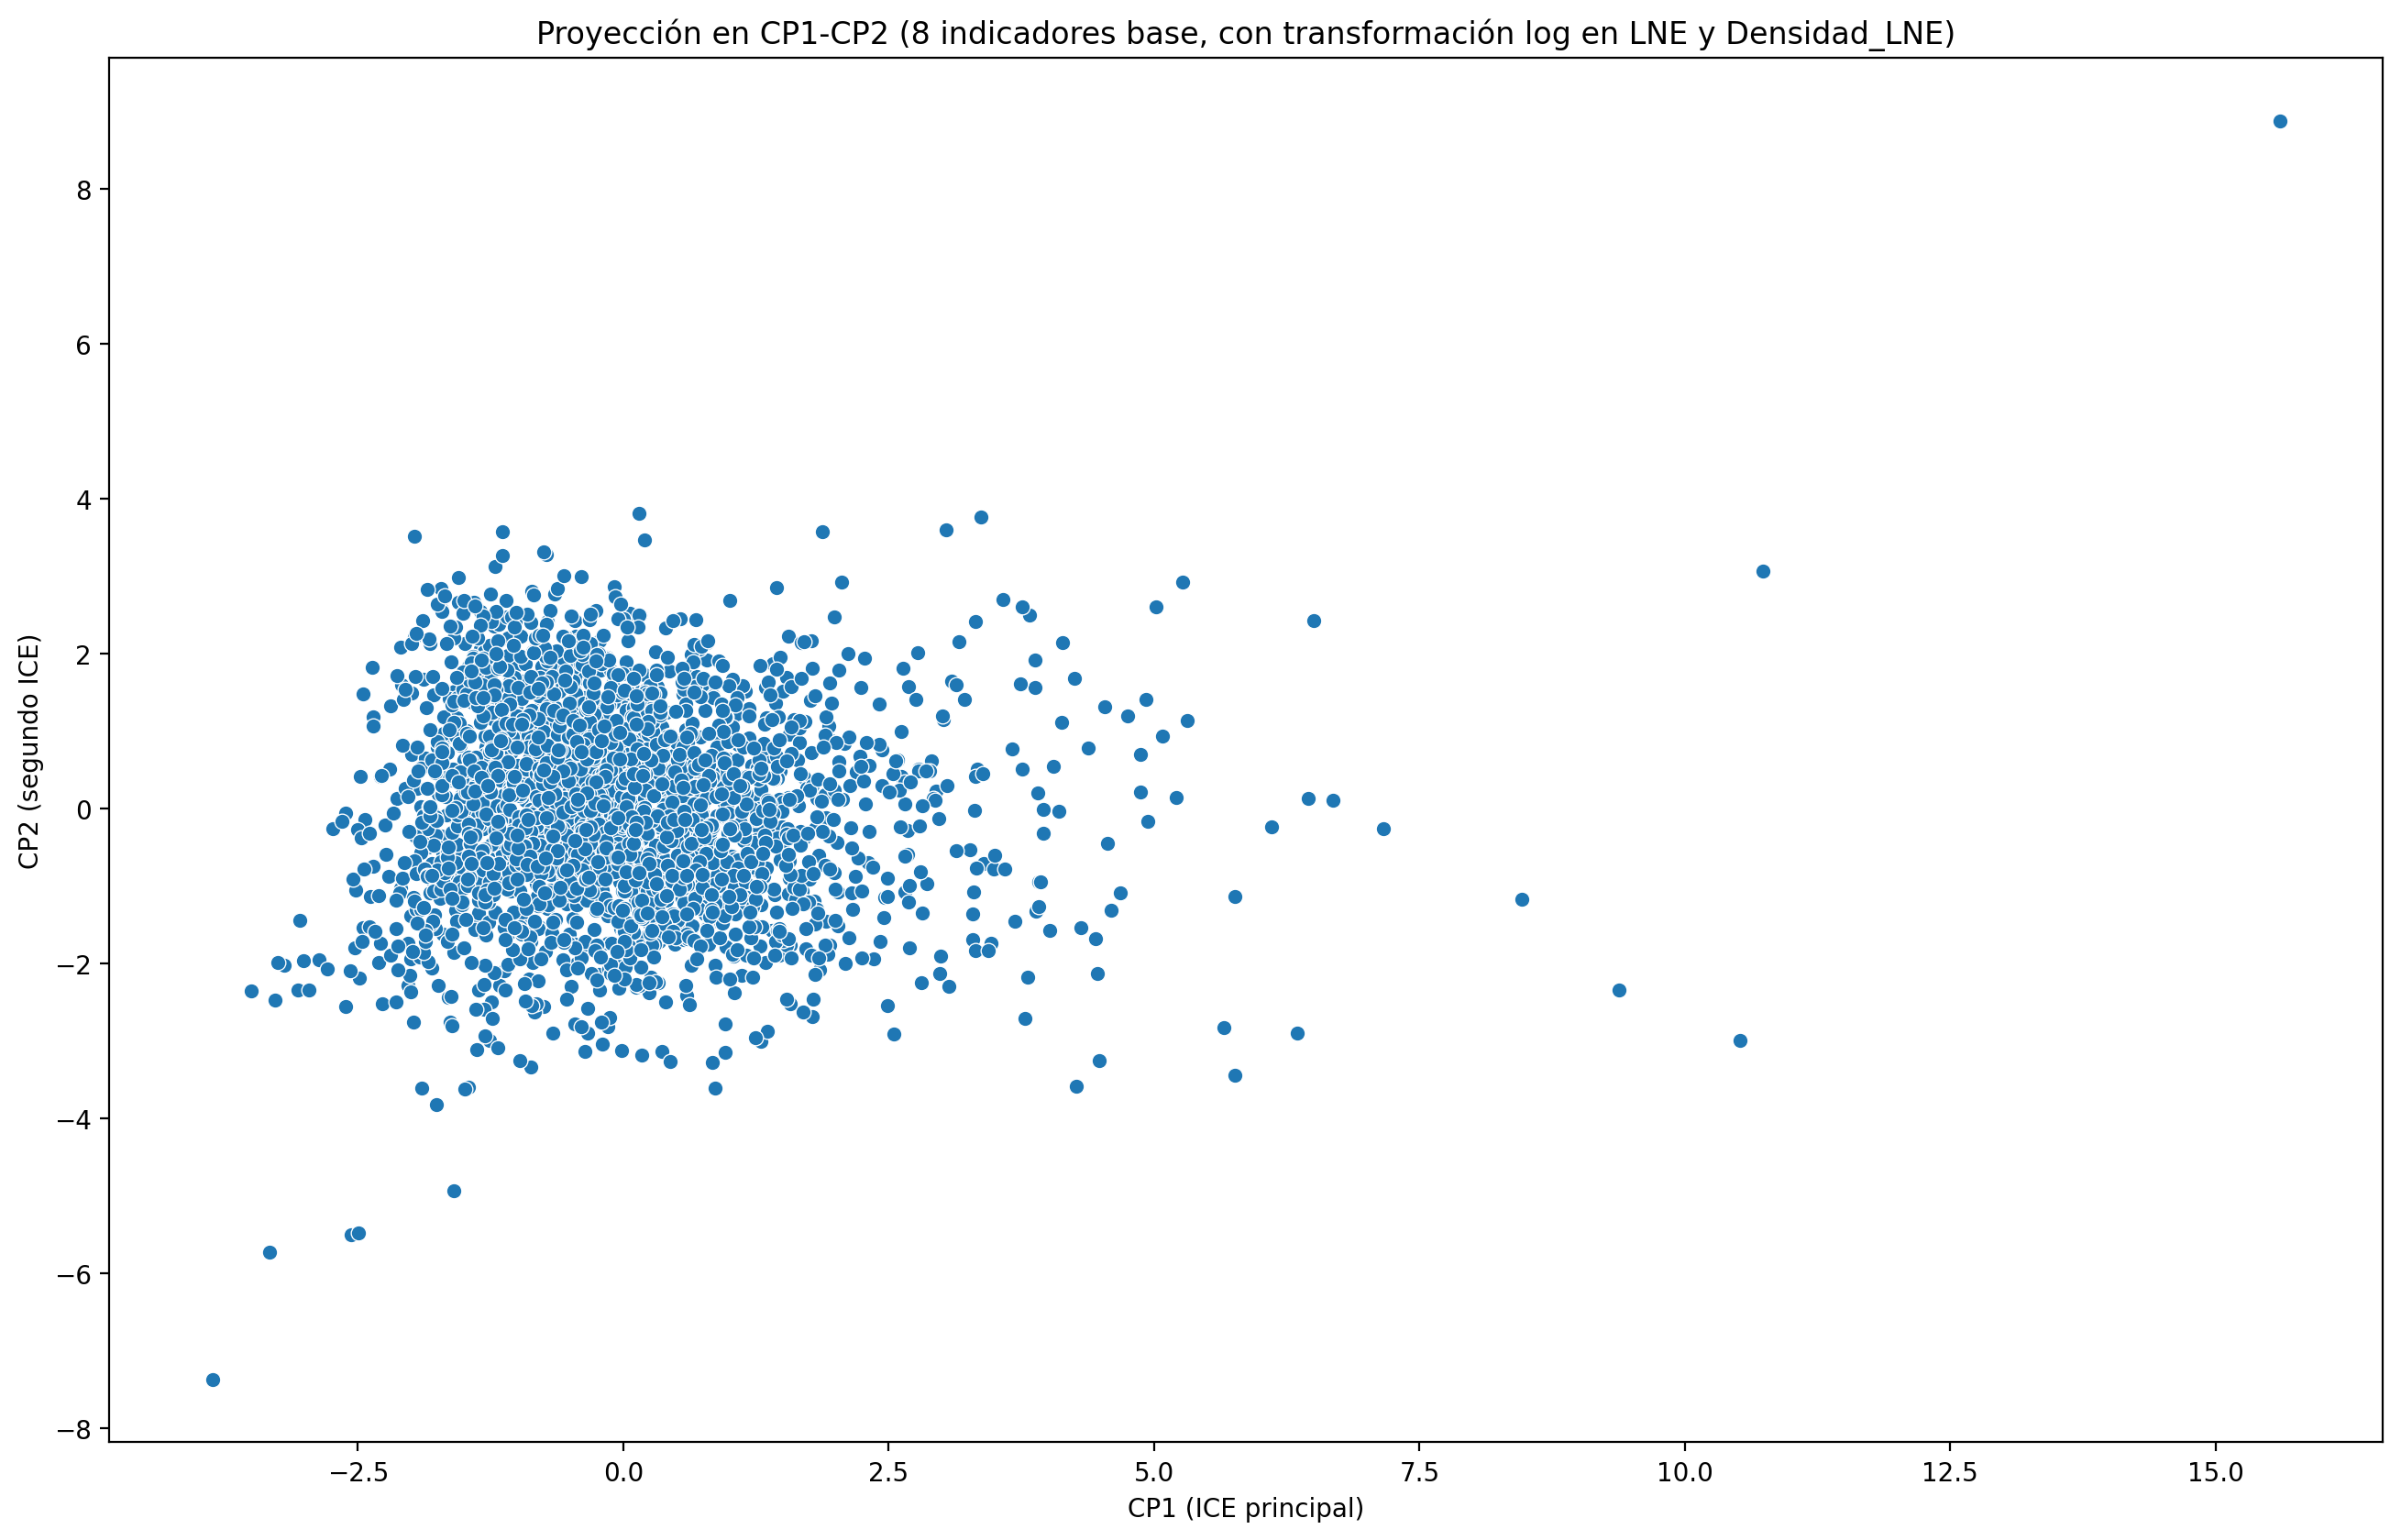

In [55]:
#Scatter plot (seaborn) PC1 vs PC2

plt.figure(figsize=(16, 10), dpi= 200, facecolor='w', edgecolor='k')
sns.scatterplot(x="CP1", y="CP2", 
                data=df_pca_results_ind8_tf)
# Set x-axis label
plt.xlabel('CP1 (ICE principal)')
# Set y-axis label
plt.ylabel('CP2 (segundo ICE)')
plt.title('Proyección en CP1-CP2 (8 indicadores base, con transformación log en LNE y Densidad_LNE)')

plt.savefig('Pyplot_PCA_projection_ind8_tf.png',dpi=600)

Gráfica en el espacio CP1, CP2, CP3

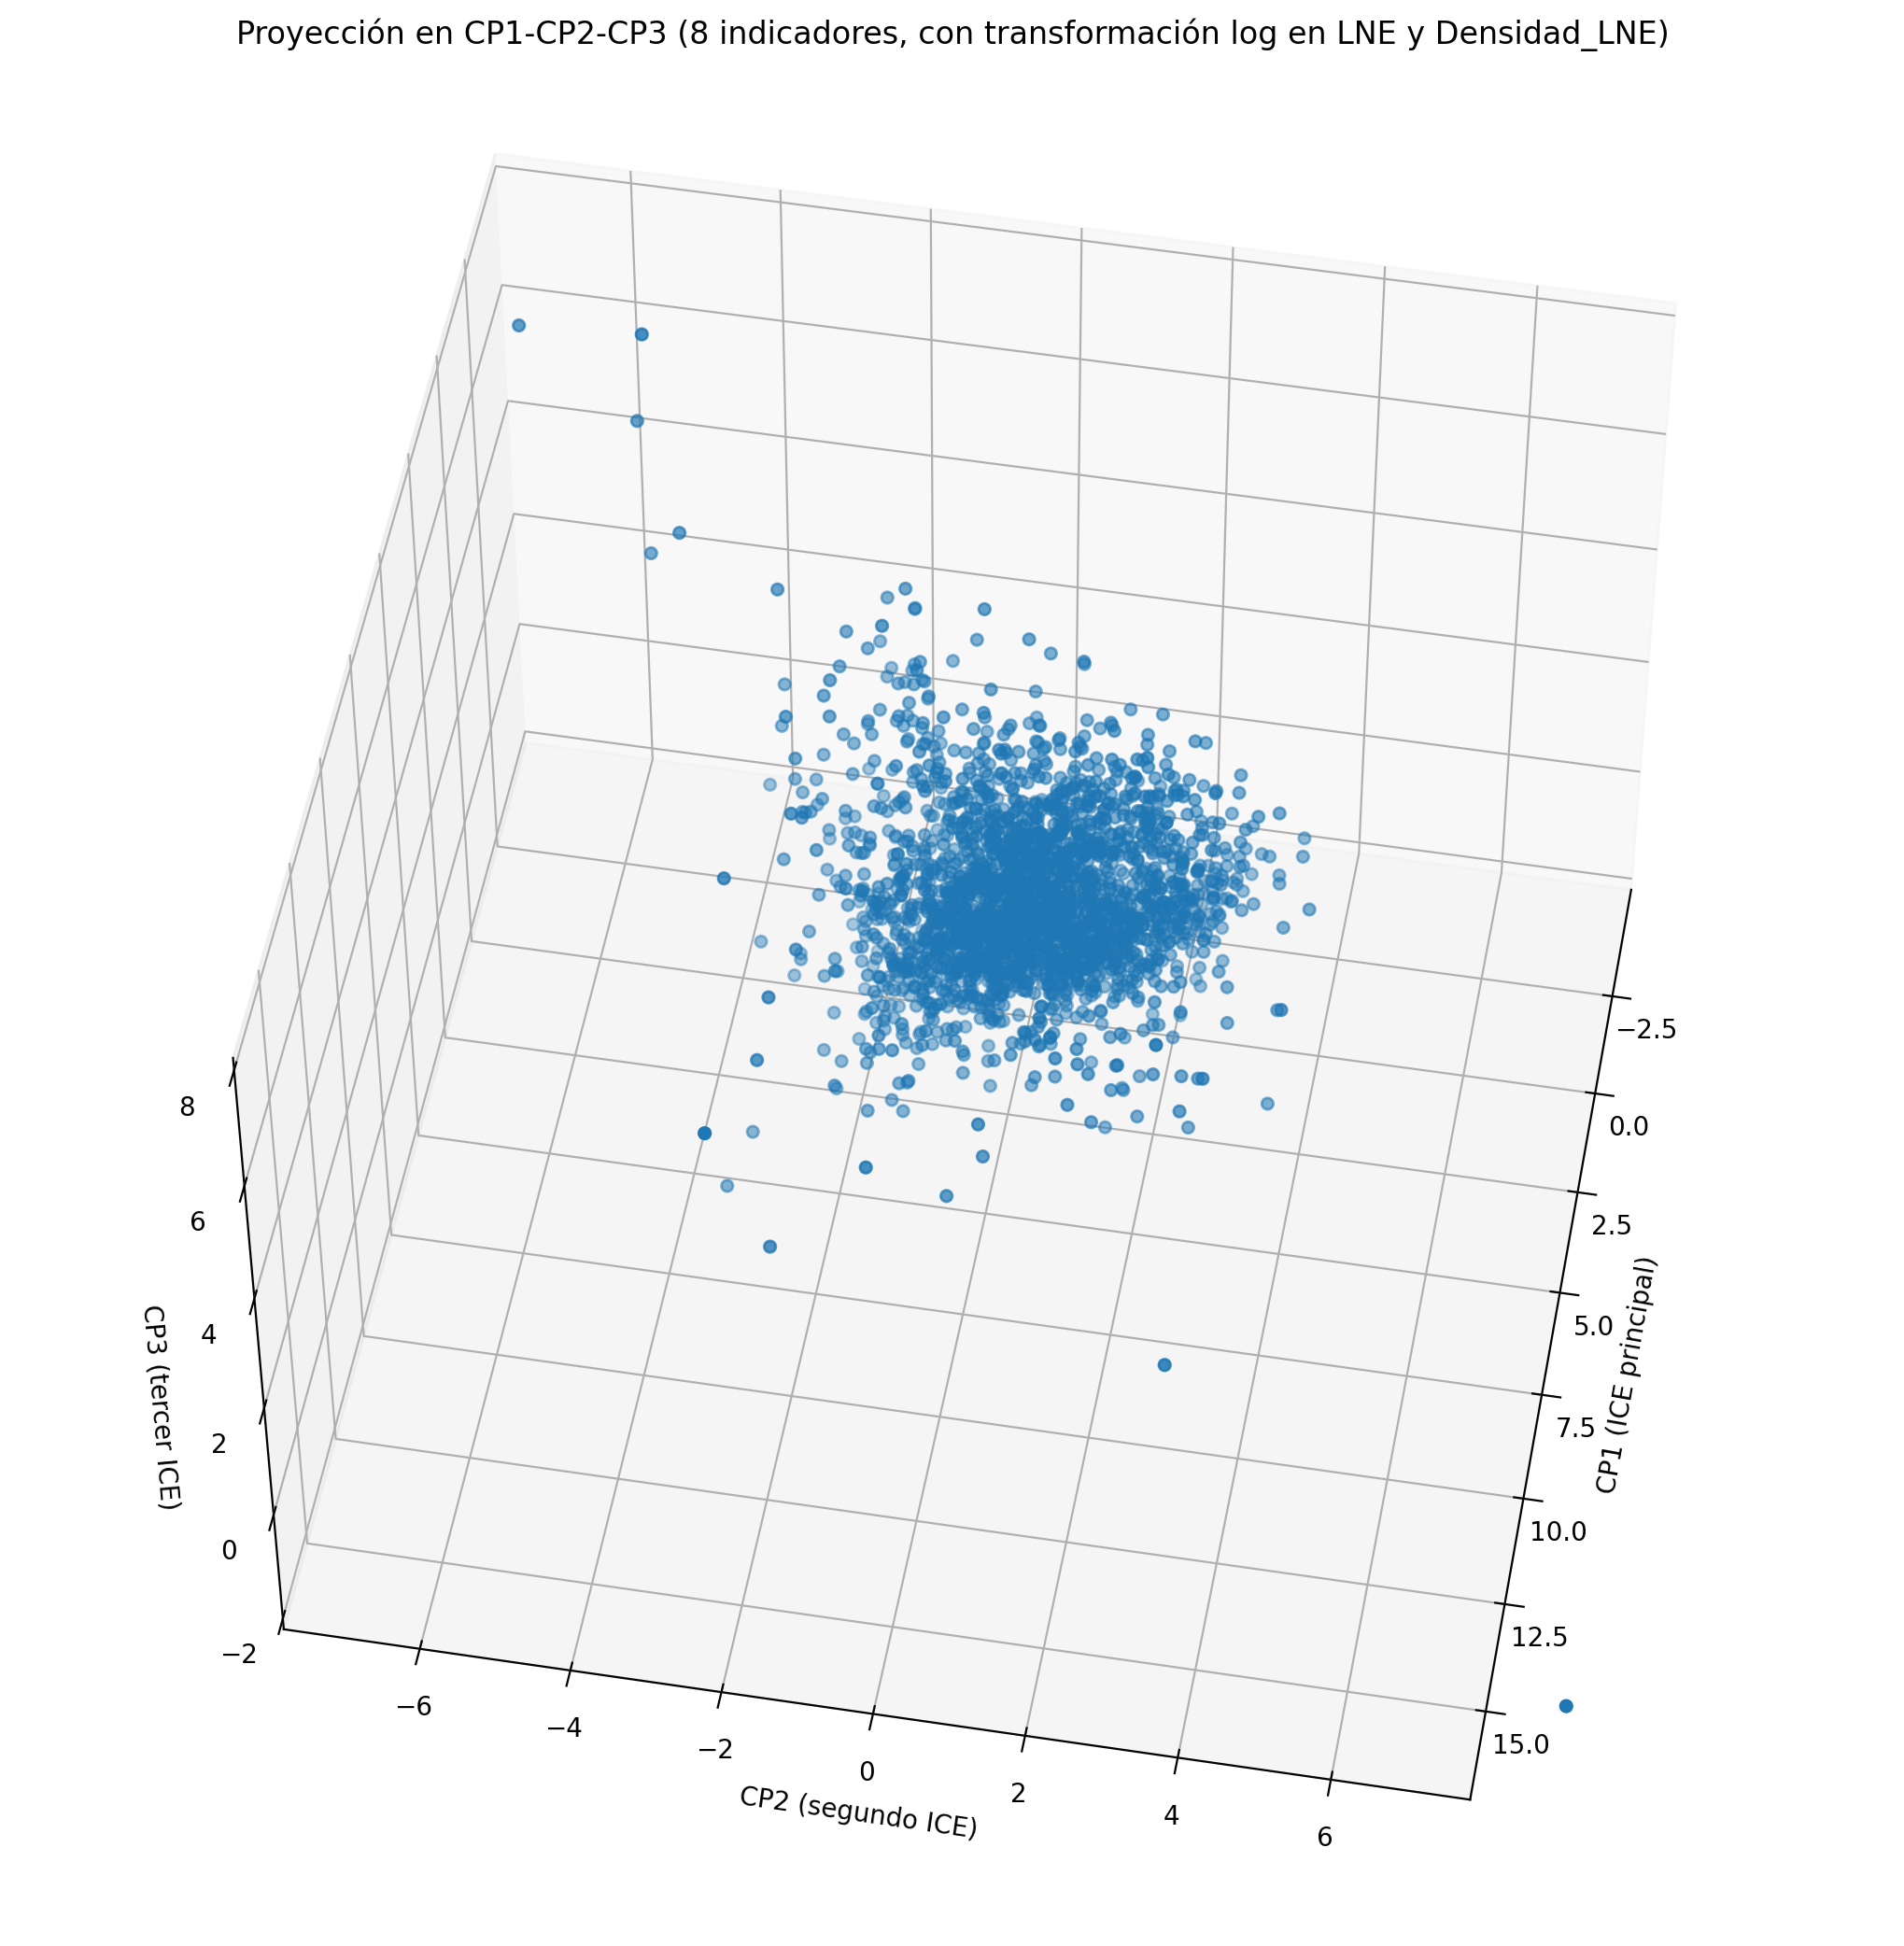

In [56]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

fig = pyplot.figure(figsize=(16, 10), dpi=200, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
ax.scatter(df_pca_results_ind8_tf['CP1'], df_pca_results_ind8_tf['CP2'], df_pca_results_ind8_tf['CP3'],s=20)
# ax.set_xlim3d(-10, 40)
ax.set_ylim3d(-7.5,7.5)
ax.set_zlim3d(-2,8)
ax.set_xlabel('CP1 (ICE principal)')
ax.set_ylabel('CP2 (segundo ICE)')
ax.set_zlabel('CP3 (tercer ICE)')
ax.view_init(elev, azim)
ax.set_title('Proyección en CP1-CP2-CP3 (8 indicadores, con transformación log en LNE y Densidad_LNE)')

plt.savefig('Pyplot_PCA_3dprojection_ind8_tf.png',dpi=600)
pyplot.show()

Gráfica 3d animada

In [57]:
# import plotly.express as px

# fig = px.scatter_3d(df_pca_results_ind8_tf, 
#                     x='CP1', 
#                     y='CP2', 
#                     z='CP3')
# fig.update_layout(scene = dict(
#                     xaxis_title='CP1 (ICE principal)',
#                     yaxis_title='CP2 (segundo ICE)',
#                     zaxis_title='CP3 (tercer ICE)'),
#                  legend_orientation="h")
# fig.show()

<br>

## Referencias
- https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
- https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/#pca-vs-lda
- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python
- https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
- https://alexanderfabisch.github.io/t-sne-in-scikit-learn.html
- https://medium.com/@indreshbhattacharyya/feature-selection-categorical-feature-selection-boruta-light-gbm-chi-square-bf47e94e2558
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
- https://stackoverflow.com/questions/52472757/creating-a-boxplot-facetgrid-in-seaborn-for-python
- https://www.kdnuggets.com/2019/07/10-simple-hacks-speed-data-analysis-python.html
- https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet